In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math
import random
import copy
import warnings
warnings.filterwarnings('ignore')

# FedAvg

In [2]:
acc0 = [[], [0.6069999933242798, 0.10000000149011612, 0.49309998750686646, 0.10000000149011612, 0.4122999906539917, 0.2159000039100647, 0.10000000149011612, 0.5012000203132629, 0.4456000030040741, 0.5006999969482422, 0.5174999833106995, 0.6248000264167786, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5418999791145325, 0.41290000081062317, 0.5834000110626221, 0.10000000149011612, 0.10000000149011612, 0.5059000253677368, 0.42809998989105225, 0.388700008392334, 0.2824999988079071, 0.5663999915122986, 0.6330000162124634, 0.10000000149011612, 0.10000000149011612, 0.5626000165939331], [0.10000000149011612, 0.5077999830245972, 0.5942999720573425, 0.6180999875068665, 0.44449999928474426, 0.3977000117301941, 0.10000000149011612, 0.6089000105857849, 0.5235000252723694, 0.10000000149011612, 0.6026999950408936, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5806999802589417, 0.38839998841285706, 0.4359000027179718, 0.4018999934196472, 0.6092000007629395, 0.10000000149011612, 0.37459999322891235, 0.10000000149011612, 0.5950999855995178, 0.10000000149011612, 0.6455000042915344, 0.45840001106262207, 0.10000000149011612, 0.10000000149011612, 0.5716999769210815, 0.10000000149011612], [0.5842999815940857, 0.6019999980926514, 0.6082000136375427, 0.46399998664855957, 0.10000000149011612, 0.5519000291824341, 0.49630001187324524, 0.10000000149011612, 0.5888000130653381, 0.10000000149011612, 0.6948000192642212, 0.6437000036239624, 0.5087000131607056, 0.38089999556541443, 0.10000000149011612, 0.49970000982284546, 0.10000000149011612, 0.5626999735832214, 0.6017000079154968, 0.10000000149011612, 0.10000000149011612, 0.6474000215530396, 0.40689998865127563, 0.6682999730110168, 0.6446999907493591, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.6122000217437744, 0.10000000149011612, 0.5317000150680542, 0.10000000149011612, 0.6272000074386597, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6607999801635742, 0.5781000256538391, 0.6628999710083008, 0.6726999878883362, 0.10000000149011612, 0.6312000155448914, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.7153000235557556, 0.7032999992370605, 0.6211000084877014, 0.6378999948501587, 0.6144999861717224, 0.10000000149011612, 0.6761999726295471, 0.5503000020980835, 0.10000000149011612, 0.6276999711990356, 0.10000000149011612, 0.10000000149011612], [0.6751999855041504, 0.10000000149011612, 0.10000000149011612, 0.6226999759674072, 0.6682999730110168, 0.6624000072479248, 0.6639000177383423, 0.10000000149011612, 0.6377000212669373, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6308000087738037, 0.6535999774932861, 0.5859000086784363, 0.6284999847412109, 0.7020999789237976, 0.6912999749183655, 0.10000000149011612, 0.6664000153541565, 0.10000000149011612, 0.45260000228881836, 0.10000000149011612, 0.10000000149011612, 0.6258000135421753, 0.10000000149011612, 0.6237999796867371, 0.10000000149011612, 0.6445000171661377, 0.10000000149011612], [0.10000000149011612, 0.6765999794006348, 0.16619999706745148, 0.10000000149011612, 0.651199996471405, 0.6680999994277954, 0.10000000149011612, 0.10000000149011612, 0.6988999843597412, 0.10000000149011612, 0.10000000149011612, 0.617900013923645, 0.5878999829292297, 0.44999998807907104, 0.6796000003814697, 0.10000000149011612, 0.5916000008583069, 0.10000000149011612, 0.6315000057220459, 0.6966000199317932, 0.6575000286102295, 0.10000000149011612, 0.5679000020027161, 0.6761000156402588, 0.5989999771118164, 0.6080999970436096, 0.10000000149011612, 0.66839998960495, 0.10000000149011612, 0.7195000052452087], [0.6859999895095825, 0.10000000149011612, 0.6837000250816345, 0.7077999711036682, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.675599992275238, 0.618399977684021, 0.6328999996185303, 0.10000000149011612, 0.5688999891281128, 0.10000000149011612, 0.6966000199317932, 0.7106000185012817, 0.6344000101089478, 0.5663999915122986, 0.6396999955177307, 0.10000000149011612, 0.7196000218391418, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6909999847412109, 0.6672999858856201, 0.5896999835968018, 0.5927000045776367, 0.6212999820709229, 0.7275999784469604, 0.10000000149011612], [0.6399000287055969, 0.6449000239372253, 0.6915000081062317, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6836000084877014, 0.10000000149011612, 0.6155999898910522, 0.10000000149011612, 0.14110000431537628, 0.10409999638795853, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1005999967455864, 0.7052000164985657, 0.71670001745224, 0.10000000149011612, 0.6757000088691711, 0.10000000149011612, 0.6373000144958496, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.7207000255584717, 0.6777999997138977, 0.6514000296592712, 0.7067999839782715, 0.6747000217437744], [0.10010000318288803, 0.6891999840736389, 0.10000000149011612, 0.7211999893188477, 0.6746000051498413, 0.10000000149011612, 0.6797999739646912, 0.10000000149011612, 0.6674000024795532, 0.10000000149011612, 0.10000000149011612, 0.5873000025749207, 0.10000000149011612, 0.10000000149011612, 0.5917999744415283, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.619700014591217, 0.6392999887466431, 0.6126999855041504, 0.6988000273704529, 0.10000000149011612, 0.10000000149011612, 0.7121000289916992, 0.7117999792098999, 0.6383000016212463, 0.6272000074386597, 0.6621000170707703, 0.6787999868392944], [0.10010000318288803, 0.6061999797821045, 0.6514999866485596, 0.6151999831199646, 0.10000000149011612, 0.7172999978065491, 0.10000000149011612, 0.10000000149011612, 0.6875, 0.6407999992370605, 0.10000000149011612, 0.10000000149011612, 0.6985999941825867, 0.7167999744415283, 0.5982999801635742, 0.6897000074386597, 0.7189000248908997, 0.5896999835968018, 0.7031000256538391, 0.6802999973297119, 0.7125999927520752, 0.6915000081062317, 0.10000000149011612, 0.3698999881744385, 0.10000000149011612, 0.6564000248908997, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10270000249147415, 0.6970000267028809, 0.5920000076293945, 0.7188000082969666, 0.7071999907493591, 0.5583999752998352, 0.5799000263214111, 0.10000000149011612, 0.6851999759674072, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6632000207901001, 0.6906999945640564, 0.5508000254631042, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6225000023841858, 0.682200014591217, 0.10000000149011612, 0.6391000151634216, 0.10000000149011612, 0.7005000114440918, 0.10010000318288803, 0.10000000149011612, 0.6744999885559082, 0.6097999811172485, 0.6603999733924866], [0.10000000149011612, 0.7279999852180481, 0.6891999840736389, 0.10000000149011612, 0.10040000081062317, 0.7175999879837036, 0.6348999738693237, 0.10000000149011612, 0.714900016784668, 0.7307000160217285, 0.6991999745368958, 0.10000000149011612, 0.6912999749183655, 0.10000000149011612, 0.7156999707221985, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.7211999893188477, 0.6176999807357788, 0.6837000250816345, 0.6707000136375427, 0.7174000144004822, 0.10000000149011612, 0.6776000261306763, 0.6927000284194946, 0.11339999735355377, 0.10000000149011612, 0.6064000129699707, 0.6647999882698059], [0.7106999754905701, 0.707099974155426, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6855000257492065, 0.7117999792098999, 0.6395000219345093, 0.10000000149011612, 0.10000000149011612, 0.6988999843597412, 0.5945000052452087, 0.6589999794960022, 0.7145000100135803, 0.6401000022888184, 0.7080000042915344, 0.6744999885559082, 0.10010000318288803, 0.7253000140190125, 0.7196999788284302, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.704200029373169, 0.10000000149011612, 0.10000000149011612, 0.7184000015258789, 0.44350001215934753, 0.10000000149011612], [0.10000000149011612, 0.7063999772071838, 0.10000000149011612, 0.10010000318288803, 0.7166000008583069, 0.6909000277519226, 0.5081999897956848, 0.6973999738693237, 0.10019999742507935, 0.6833999752998352, 0.6995000243186951, 0.2849000096321106, 0.7124999761581421, 0.6323999762535095, 0.24570000171661377, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10109999775886536, 0.6801999807357788, 0.6664999723434448, 0.10000000149011612, 0.7447999715805054, 0.6771000027656555, 0.7045999765396118, 0.6820999979972839, 0.6751000285148621, 0.7336000204086304, 0.10000000149011612, 0.7003999948501587], [0.10000000149011612, 0.737500011920929, 0.7491999864578247, 0.7358999848365784, 0.6371999979019165, 0.10040000081062317, 0.10000000149011612, 0.27140000462532043, 0.25209999084472656, 0.7339000105857849, 0.7103999853134155, 0.6844000220298767, 0.5842999815940857, 0.7148000001907349, 0.10000000149011612, 0.7063999772071838, 0.6866999864578247, 0.10130000114440918, 0.10029999911785126, 0.6262000203132629, 0.39160001277923584, 0.64410001039505, 0.10000000149011612, 0.10000000149011612, 0.7099999785423279, 0.6721000075340271, 0.10029999911785126, 0.6640999913215637, 0.6938999891281128, 0.5680000185966492], [0.7282999753952026, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.7483999729156494, 0.6895999908447266, 0.10000000149011612, 0.574999988079071, 0.7114999890327454, 0.694599986076355, 0.10000000149011612, 0.7376000285148621, 0.10040000081062317, 0.6509000062942505, 0.7032999992370605, 0.66839998960495, 0.10000000149011612, 0.5935999751091003, 0.10000000149011612, 0.6255999803543091, 0.6873000264167786, 0.715499997138977, 0.6205999851226807, 0.7199000120162964, 0.10000000149011612, 0.10000000149011612, 0.6419000029563904, 0.7329000234603882, 0.7206000089645386, 0.5060999989509583], [0.7565000057220459, 0.10000000149011612, 0.10000000149011612, 0.6942999958992004, 0.10010000318288803, 0.754800021648407, 0.6855999827384949, 0.10000000149011612, 0.6571999788284302, 0.734000027179718, 0.10000000149011612, 0.10000000149011612, 0.6359000205993652, 0.10000000149011612, 0.11710000038146973, 0.7628999948501587, 0.6920999884605408, 0.10000000149011612, 0.7423999905586243, 0.7041000127792358, 0.7120000123977661, 0.6766999959945679, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6998000144958496, 0.7143999934196472, 0.733299970626831, 0.7098000049591064], [0.707099974155426, 0.17299999296665192, 0.1421000063419342, 0.7587000131607056, 0.7310000061988831, 0.510200023651123, 0.6865000128746033, 0.10010000318288803, 0.529699981212616, 0.6748999953269958, 0.5802000164985657, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.7583000063896179, 0.10000000149011612, 0.10000000149011612, 0.720300018787384, 0.7439000010490417, 0.1088000014424324, 0.16269999742507935, 0.10000000149011612, 0.6779000163078308, 0.7379000186920166, 0.31139999628067017, 0.7049000263214111, 0.6920999884605408, 0.10010000318288803, 0.4357999861240387, 0.695900022983551], [0.10000000149011612, 0.10000000149011612, 0.14059999585151672, 0.10000000149011612, 0.7540000081062317, 0.6349999904632568, 0.7325000166893005, 0.7387999892234802, 0.10000000149011612, 0.10000000149011612, 0.746399998664856, 0.737500011920929, 0.10000000149011612, 0.7498000264167786, 0.10000000149011612, 0.10000000149011612, 0.1703999936580658, 0.18050000071525574, 0.6575999855995178, 0.7335000038146973, 0.6751000285148621, 0.10000000149011612, 0.746399998664856, 0.10509999841451645, 0.6486999988555908, 0.6927000284194946, 0.6790000200271606, 0.7074999809265137, 0.6409000158309937, 0.1370999962091446], [0.7099000215530396, 0.10000000149011612, 0.10000000149011612, 0.7107999920845032, 0.7103000283241272, 0.6937999725341797, 0.10000000149011612, 0.13600000739097595, 0.7286999821662903, 0.7286999821662903, 0.10000000149011612, 0.4772999882698059, 0.10000000149011612, 0.737500011920929, 0.6220999956130981, 0.7368000149726868, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.7382000088691711, 0.754800021648407, 0.491100013256073, 0.7114999890327454, 0.6894000172615051, 0.6428999900817871, 0.1006999984383583, 0.2948000133037567, 0.695900022983551, 0.10000000149011612, 0.7325000166893005], [0.7411999702453613, 0.7372000217437744, 0.7240999937057495, 0.7121999859809875, 0.1665000021457672, 0.10000000149011612, 0.6560999751091003, 0.7175999879837036, 0.10000000149011612, 0.10000000149011612, 0.6484000086784363, 0.741100013256073, 0.7578999996185303, 0.7574999928474426, 0.675599992275238, 0.6945000290870667, 0.732200026512146, 0.09989999979734421, 0.7062000036239624, 0.711899995803833, 0.10899999737739563, 0.10000000149011612, 0.7440999746322632, 0.10000000149011612, 0.7148000001907349, 0.7231000065803528, 0.10000000149011612, 0.7074000239372253, 0.7264000177383423, 0.10000000149011612], [0.723800003528595, 0.7491999864578247, 0.7459999918937683, 0.6876000165939331, 0.7260000109672546, 0.6492000222206116, 0.7056999802589417, 0.7591999769210815, 0.10010000318288803, 0.11389999836683273, 0.18150000274181366, 0.7712000012397766, 0.7373999953269958, 0.10000000149011612, 0.7253999710083008, 0.7210999727249146, 0.6567999720573425, 0.1720999926328659, 0.7473000288009644, 0.7712000012397766, 0.10000000149011612, 0.10000000149011612, 0.1088000014424324, 0.3206000030040741, 0.6413000226020813, 0.10000000149011612, 0.40459999442100525, 0.10140000283718109, 0.7092000246047974, 0.7300000190734863], [0.10010000318288803, 0.7738999724388123, 0.10000000149011612, 0.7487000226974487, 0.7731000185012817, 0.6865000128746033, 0.7487999796867371, 0.7681000232696533, 0.15209999680519104, 0.10000000149011612, 0.7644000053405762, 0.6869999766349792, 0.16850000619888306, 0.6786999702453613, 0.7311000227928162, 0.6830999851226807, 0.762499988079071, 0.10000000149011612, 0.7127000093460083, 0.708899974822998, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.7412999868392944, 0.10000000149011612, 0.6991000175476074, 0.6789000034332275, 0.7702000141143799, 0.10000000149011612], [0.7440000176429749, 0.7093999981880188, 0.7488999962806702, 0.10080000013113022, 0.682200014591217, 0.7558000087738037, 0.10000000149011612, 0.30880001187324524, 0.722100019454956, 0.49549999833106995, 0.24300000071525574, 0.7433000206947327, 0.6324999928474426, 0.10000000149011612, 0.1005999967455864, 0.10000000149011612, 0.753600001335144, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.7067000269889832, 0.7540000081062317, 0.7544999718666077, 0.6798999905586243, 0.10000000149011612, 0.6452000141143799, 0.7179999947547913, 0.2700999975204468, 0.7555999755859375, 0.7121999859809875], [0.6949999928474426, 0.10000000149011612, 0.6662999987602234, 0.13920000195503235, 0.10000000149011612, 0.6815000176429749, 0.7570000290870667, 0.1777999997138977, 0.7060999870300293, 0.4253000020980835, 0.10000000149011612, 0.7361999750137329, 0.10000000149011612, 0.765999972820282, 0.7343000173568726, 0.10000000149011612, 0.10000000149011612, 0.6460999846458435, 0.7318999767303467, 0.7091000080108643, 0.6122000217437744, 0.10000000149011612, 0.10000000149011612, 0.7483000159263611, 0.7008000016212463, 0.7419999837875366, 0.7465999722480774, 0.10000000149011612, 0.7243000268936157, 0.7299000024795532], [0.10000000149011612, 0.10000000149011612, 0.49140000343322754, 0.5950000286102295, 0.730400025844574, 0.7462000250816345, 0.7487999796867371, 0.7623000144958496, 0.10000000149011612, 0.708299994468689, 0.7888000011444092, 0.7522000074386597, 0.7709000110626221, 0.10000000149011612, 0.7386999726295471, 0.10000000149011612, 0.7651000022888184, 0.10239999741315842, 0.7253000140190125, 0.7107999920845032, 0.10419999808073044, 0.10050000250339508, 0.10000000149011612, 0.7506999969482422, 0.7371000051498413, 0.10000000149011612, 0.7200000286102295, 0.11410000175237656, 0.10000000149011612, 0.10000000149011612], [0.7674000263214111, 0.7504000067710876, 0.7275999784469604, 0.6940000057220459, 0.5209000110626221, 0.7031999826431274, 0.7603999972343445, 0.2759999930858612, 0.10010000318288803, 0.7264000177383423, 0.3797000050544739, 0.7484999895095825, 0.10360000282526016, 0.7404000163078308, 0.10000000149011612, 0.7236999869346619, 0.10000000149011612, 0.10000000149011612, 0.7663999795913696, 0.10000000149011612, 0.7609999775886536, 0.7348999977111816, 0.7330999970436096, 0.10010000318288803, 0.7541000247001648, 0.10000000149011612, 0.10000000149011612, 0.10260000079870224, 0.7389000058174133, 0.7366999983787537], [0.7566999793052673, 0.7057999968528748, 0.734499990940094, 0.6901999711990356, 0.7457000017166138, 0.7405999898910522, 0.7390000224113464, 0.6991999745368958, 0.7422999739646912, 0.7631999850273132, 0.554099977016449, 0.7014999985694885, 0.10000000149011612, 0.7376000285148621, 0.5303999781608582, 0.1949000060558319, 0.10000000149011612, 0.6139000058174133, 0.7512999773025513, 0.10000000149011612, 0.7628999948501587, 0.14669999480247498, 0.7645999789237976, 0.19499999284744263, 0.6866000294685364, 0.7454000115394592, 0.7810999751091003, 0.7423999905586243, 0.7447999715805054, 0.7287999987602234], [0.7542999982833862, 0.7752000093460083, 0.7134000062942505, 0.10000000149011612, 0.24459999799728394, 0.10000000149011612, 0.2797999978065491, 0.7907999753952026, 0.1388999968767166, 0.10019999742507935, 0.708899974822998, 0.10000000149011612, 0.24320000410079956, 0.720300018787384, 0.7746000289916992, 0.10760000348091125, 0.2345999926328659, 0.7476999759674072, 0.7631999850273132, 0.739799976348877, 0.78329998254776, 0.7620999813079834, 0.754800021648407, 0.16050000488758087, 0.7577999830245972, 0.7085999846458435, 0.7713000178337097, 0.765999972820282, 0.7753999829292297, 0.14970000088214874], [0.35420000553131104, 0.10000000149011612, 0.27730000019073486, 0.6840000152587891, 0.7695000171661377, 0.679099977016449, 0.10000000149011612, 0.7502999901771545, 0.7652000188827515, 0.7242000102996826, 0.7523000240325928, 0.7634000182151794, 0.7457000017166138, 0.7828999757766724, 0.7674999833106995, 0.10000000149011612, 0.7479000091552734, 0.10000000149011612, 0.10010000318288803, 0.251800000667572, 0.6414999961853027, 0.33739998936653137, 0.10300000011920929, 0.10010000318288803, 0.7422999739646912, 0.7466999888420105, 0.728600025177002, 0.7807000279426575, 0.6952000260353088, 0.10019999742507935]]
loss0 = [[], [1.0724244117736816, 331.1666259765625, 1.4718519449234009, 52.44834518432617, 2.0200088024139404, 3.242771863937378, 247.91567993164062, 1.673643946647644, 1.548794150352478, 1.4052252769470215, 1.1102068424224854, 1.1711087226867676, 84.4542465209961, 27.720766067504883, 234.845703125, 34.30924987792969, 1.6086636781692505, 1.7920154333114624, 1.8972467184066772, 165.67620849609375, 124.78175354003906, 1.286800742149353, 1.7723808288574219, 1.7398605346679688, 2.272548198699951, 1.3207480907440186, 1.0692706108093262, 73.53421020507812, 72.01188659667969, 1.3277987241744995], [203.15032958984375, 1.6194392442703247, 1.2522974014282227, 1.1460529565811157, 2.5419509410858154, 1.9549520015716553, 198.1774444580078, 1.3223795890808105, 1.4214990139007568, 87.74938201904297, 1.4136446714401245, 112.4848861694336, 262.766357421875, 30.317724227905273, 1.3055200576782227, 2.52425479888916, 1.5914385318756104, 1.604987382888794, 1.1695176362991333, 52.134063720703125, 2.6274807453155518, 92.85389709472656, 1.1120684146881104, 220.06007385253906, 1.1639995574951172, 1.4628651142120361, 86.64862823486328, 85.0863265991211, 1.456878662109375, 116.62139892578125], [1.4949467182159424, 1.198177695274353, 1.1240085363388062, 2.330662250518799, 228.25035095214844, 1.2885183095932007, 1.3694509267807007, 166.26821899414062, 1.5712279081344604, 132.98440551757812, 0.9499735236167908, 1.0878924131393433, 1.2708380222320557, 1.7083415985107422, 57.24318313598633, 1.9145630598068237, 37.725502014160156, 1.656862497329712, 1.1707135438919067, 164.23561096191406, 49.2540397644043, 1.255219578742981, 1.519736886024475, 1.0998399257659912, 1.4327715635299683, 221.6322784423828, 9.222784996032715, 57.27016067504883, 23.262807846069336, 185.69052124023438], [1.590584397315979, 19.91889762878418, 1.3163683414459229, 80.0890121459961, 1.1372184753417969, 70.63687133789062, 36.8194580078125, 5.619260311126709, 1.0837478637695312, 1.3724565505981445, 1.0624420642852783, 0.9706233143806458, 29.754947662353516, 1.0443893671035767, 249.1471710205078, 102.34815979003906, 192.0292510986328, 68.6137924194336, 0.8688799738883972, 1.2038506269454956, 2.0171611309051514, 1.0359355211257935, 1.2798876762390137, 55.766048431396484, 1.0912725925445557, 1.5412065982818604, 34.73188781738281, 1.1962015628814697, 64.61759185791016, 34.02050018310547], [1.0335355997085571, 140.53501892089844, 71.11431884765625, 1.142936110496521, 1.0774179697036743, 1.1468093395233154, 1.1710386276245117, 238.20614624023438, 1.1405115127563477, 138.09898376464844, 184.76332092285156, 105.26705932617188, 0.9345988035202026, 1.1434558629989624, 2.8159897327423096, 1.240005612373352, 1.0321587324142456, 1.171329140663147, 124.56522369384766, 1.2369425296783447, 187.1610870361328, 2.3736844062805176, 173.0065460205078, 109.41153717041016, 1.159235954284668, 32.84270477294922, 1.2635561227798462, 172.6551055908203, 1.198662519454956, 159.70919799804688], [30.163721084594727, 0.9662047028541565, 4.02613639831543, 159.9920196533203, 1.0607167482376099, 1.0618075132369995, 23.92467498779297, 422.1088562011719, 1.0029710531234741, 49.71794509887695, 67.98651885986328, 0.9713994264602661, 1.3221428394317627, 1.5187515020370483, 1.1897716522216797, 288.8807678222656, 1.300588846206665, 255.61192321777344, 1.0203725099563599, 2.015338182449341, 0.9925470948219299, 56.48726272583008, 1.3283016681671143, 1.066312551498413, 1.0532732009887695, 2.6414830684661865, 43.2798957824707, 1.064564824104309, 24.943477630615234, 0.8750662207603455], [1.3262913227081299, 64.7300033569336, 1.393252968788147, 1.0386478900909424, 43.75216293334961, 112.93378448486328, 166.53712463378906, 1.3040517568588257, 1.9980438947677612, 1.5081181526184082, 47.63801574707031, 1.8581265211105347, 162.91444396972656, 1.2655800580978394, 1.04426908493042, 1.3341898918151855, 1.4933485984802246, 1.2255702018737793, 250.88429260253906, 0.9576252102851868, 85.42939758300781, 47.239723205566406, 123.2281265258789, 1.0985288619995117, 0.9473020434379578, 1.7984343767166138, 1.2667158842086792, 1.3067166805267334, 0.9672942161560059, 152.64781188964844], [1.0885149240493774, 2.2061562538146973, 1.0827007293701172, 33.83888626098633, 23.348058700561523, 57.93000030517578, 1.0135416984558105, 44.68803787231445, 1.4366405010223389, 28.22519302368164, 15.94796085357666, 26.30194091796875, 57.49616241455078, 252.13172912597656, 29.535842895507812, 8.777315139770508, 0.9622233510017395, 1.2008752822875977, 8.301907539367676, 1.5258351564407349, 36.513221740722656, 1.3802388906478882, 26.845956802368164, 233.37820434570312, 41.80281448364258, 1.2190206050872803, 1.42130708694458, 1.9386837482452393, 1.1272441148757935, 1.2559105157852173], [26.037893295288086, 1.425256609916687, 53.47161102294922, 0.8323516845703125, 1.165483832359314, 64.35888671875, 1.2072515487670898, 114.30564880371094, 0.946517288684845, 35.3105583190918, 171.28363037109375, 1.4716100692749023, 117.58466339111328, 264.9506530761719, 1.367210865020752, 68.39170837402344, 40.54228210449219, 116.84073638916016, 1.3905631303787231, 1.0126252174377441, 1.4669971466064453, 1.4024600982666016, 90.64606475830078, 62.55291748046875, 0.9731438755989075, 1.1128897666931152, 1.1834419965744019, 1.7127282619476318, 1.018249750137329, 1.1646180152893066], [6.611000061035156, 1.2166471481323242, 1.6413317918777466, 1.438484787940979, 134.09617614746094, 1.289252758026123, 37.959434509277344, 29.442663192749023, 0.9781607389450073, 1.1698616743087769, 27.177841186523438, 143.9950714111328, 1.3633030652999878, 1.119933843612671, 1.491432547569275, 0.9204050898551941, 1.2286919355392456, 1.4982355833053589, 1.1446155309677124, 1.1759225130081177, 1.0952106714248657, 1.7330361604690552, 274.075439453125, 2.8744354248046875, 219.79672241210938, 1.3564015626907349, 20.626861572265625, 21.61330795288086, 83.56478118896484, 18.368288040161133], [13.554560661315918, 1.503326654434204, 2.1246206760406494, 1.0187454223632812, 1.204793095588684, 1.8442952632904053, 1.4862595796585083, 50.623050689697266, 1.2029081583023071, 29.0665225982666, 73.36486053466797, 86.12110900878906, 1.1878125667572021, 2.1246542930603027, 1.3773314952850342, 123.72581481933594, 99.73812866210938, 88.8199462890625, 67.48157501220703, 3.72265362739563, 1.415593147277832, 18.694211959838867, 1.2763912677764893, 136.4752960205078, 1.089554786682129, 20.097047805786133, 125.99083709716797, 1.2337883710861206, 1.3511474132537842, 1.6298983097076416], [153.574462890625, 1.0281469821929932, 1.005252480506897, 57.802886962890625, 13.505945205688477, 0.9579282999038696, 1.2713297605514526, 23.571256637573242, 1.5850486755371094, 1.0919344425201416, 0.987722635269165, 46.73491287231445, 1.4175447225570679, 43.4293327331543, 1.2483124732971191, 97.63928985595703, 72.80835723876953, 83.91411590576172, 0.9241227507591248, 1.337217926979065, 1.286415696144104, 1.1772085428237915, 1.248456597328186, 35.99247360229492, 1.3617238998413086, 0.9669125080108643, 7.11613130569458, 315.57666015625, 2.0671579837799072, 1.6803988218307495], [1.1749693155288696, 1.1982955932617188, 70.13811492919922, 138.04685974121094, 131.07601928710938, 0.9880865216255188, 1.1543161869049072, 4.0042619705200195, 74.95613098144531, 107.86791229248047, 1.174309253692627, 2.362548828125, 1.1911312341690063, 1.0249220132827759, 1.7075068950653076, 0.9497977495193481, 2.053652286529541, 25.68317222595215, 1.1828281879425049, 1.235156536102295, 84.78469848632812, 49.143917083740234, 65.03016662597656, 159.46424865722656, 1.106630802154541, 9.71291446685791, 9.279014587402344, 0.9888933300971985, 10.703290939331055, 19.713171005249023], [70.97613525390625, 1.1305642127990723, 49.559688568115234, 11.844924926757812, 1.5241693258285522, 0.9657306671142578, 2.7052996158599854, 1.8209033012390137, 56.18956756591797, 1.2153849601745605, 1.5729329586029053, 12.073019981384277, 1.1413646936416626, 1.4593497514724731, 21.605632781982422, 91.84589385986328, 87.06465911865234, 196.83038330078125, 26.88124656677246, 1.5635020732879639, 1.8931989669799805, 26.155424118041992, 1.1312425136566162, 1.0436939001083374, 1.2103689908981323, 2.4093973636627197, 1.0019465684890747, 1.2647136449813843, 207.9331512451172, 1.8451670408248901], [62.82004928588867, 1.2738350629806519, 0.9239128828048706, 1.10029935836792, 1.3533231019973755, 16.52256965637207, 74.35863494873047, 7.2115397453308105, 12.628589630126953, 1.1920667886734009, 1.4089537858963013, 1.0783522129058838, 1.477798581123352, 1.194165825843811, 39.305267333984375, 0.9575755000114441, 0.9307304620742798, 13.312865257263184, 33.652801513671875, 1.740024209022522, 3.621594190597534, 2.0363168716430664, 141.25779724121094, 12.13247299194336, 0.9260806441307068, 1.5353374481201172, 35.16484832763672, 1.326952576637268, 1.7449966669082642, 1.6183860301971436], [1.7485990524291992, 31.862056732177734, 133.90281677246094, 120.77365112304688, 0.8534478545188904, 1.5901540517807007, 18.842939376831055, 2.1327924728393555, 0.7842561602592468, 2.0842034816741943, 51.265079498291016, 0.877815306186676, 14.425529479980469, 1.5342683792114258, 1.8665581941604614, 1.550807237625122, 103.53130340576172, 2.6250317096710205, 47.66522979736328, 2.0449109077453613, 1.2017545700073242, 1.2320688962936401, 2.168463945388794, 0.8797369003295898, 90.18516540527344, 27.51559066772461, 1.9563339948654175, 1.4799168109893799, 0.8894743323326111, 4.002610206604004], [1.0088717937469482, 42.28364562988281, 21.0736141204834, 1.2088350057601929, 51.7914924621582, 1.6520729064941406, 1.774702548980713, 105.13827514648438, 2.2094333171844482, 1.2105305194854736, 15.977571487426758, 58.7664794921875, 1.599643349647522, 130.84979248046875, 10.408598899841309, 1.0355534553527832, 0.9275304675102234, 71.59712982177734, 0.9001358151435852, 1.3092290163040161, 1.2248221635818481, 1.2296466827392578, 67.77093505859375, 27.858783721923828, 84.74617004394531, 24.76009178161621, 1.5726696252822876, 1.24974524974823, 0.9706807732582092, 1.1102553606033325], [2.0860607624053955, 10.249848365783691, 9.211003303527832, 1.1542277336120605, 0.8903229236602783, 2.2148561477661133, 1.351794719696045, 42.95384216308594, 2.1852402687072754, 1.5187791585922241, 1.6801568269729614, 36.243473052978516, 55.926124572753906, 299.0806884765625, 1.0194005966186523, 134.30857849121094, 28.551515579223633, 1.12323796749115, 1.0460926294326782, 10.154278755187988, 7.99638032913208, 105.96632385253906, 1.7033954858779907, 1.6053712368011475, 9.025522232055664, 1.4955565929412842, 1.400770664215088, 21.800670623779297, 2.3541946411132812, 2.3330883979797363], [93.77344512939453, 176.24801635742188, 30.678922653198242, 52.29866409301758, 1.3916881084442139, 1.5435458421707153, 1.031488299369812, 1.079054832458496, 47.92153549194336, 119.17870330810547, 1.2214292287826538, 1.0363131761550903, 118.33840942382812, 0.9123678803443909, 25.102128982543945, 67.10347747802734, 10.54149055480957, 10.99905776977539, 1.3488972187042236, 1.2558661699295044, 1.5818519592285156, 75.54200744628906, 1.0469491481781006, 54.70895004272461, 1.1847410202026367, 1.3511244058609009, 1.2719639539718628, 1.1560313701629639, 2.471494197845459, 29.515718460083008], [2.746662139892578, 130.23773193359375, 165.8065643310547, 1.3249621391296387, 0.881838858127594, 1.6427216529846191, 225.25482177734375, 32.44563293457031, 1.0256246328353882, 1.1616671085357666, 92.43042755126953, 3.0021135807037354, 44.29572677612305, 0.9248926639556885, 1.719240665435791, 1.9889824390411377, 113.1583251953125, 16.123620986938477, 86.32572174072266, 1.1855908632278442, 0.9640058875083923, 3.9772679805755615, 1.3819055557250977, 1.703782558441162, 1.4661649465560913, 15.203801155090332, 6.356172561645508, 1.0161374807357788, 16.075164794921875, 1.1738461256027222], [0.8630478382110596, 1.1236990690231323, 1.0197681188583374, 1.4583351612091064, 23.33793830871582, 41.37300109863281, 1.3109110593795776, 1.3431538343429565, 39.54338836669922, 84.42962646484375, 2.3003900051116943, 0.9628612995147705, 0.8868004679679871, 1.0677688121795654, 2.7218642234802246, 1.08892023563385, 1.1920838356018066, 40.06818771362305, 0.999809741973877, 1.301164984703064, 17.712013244628906, 108.84188842773438, 0.9865771532058716, 108.02200317382812, 1.0426632165908813, 1.5063892602920532, 152.83119201660156, 1.2079737186431885, 1.3923817873001099, 106.91304779052734], [1.8044527769088745, 0.9494776129722595, 1.0460344552993774, 1.1381659507751465, 1.0181066989898682, 2.031599760055542, 1.061642050743103, 1.2263383865356445, 12.554342269897461, 17.16118812561035, 13.848978042602539, 0.9894233345985413, 1.119666576385498, 16.30510711669922, 2.0055465698242188, 1.3050897121429443, 1.7985502481460571, 19.5292911529541, 1.541275978088379, 1.003359079360962, 12.807085037231445, 31.42668342590332, 19.647748947143555, 5.629611492156982, 1.2572441101074219, 102.73165893554688, 4.5103325843811035, 23.839317321777344, 1.2136054039001465, 0.9071193337440491], [31.600906372070312, 1.171872615814209, 88.5703353881836, 1.5990443229675293, 1.4534337520599365, 1.6003469228744507, 1.122045874595642, 1.280150294303894, 30.766868591308594, 146.35455322265625, 0.7625150680541992, 1.7590947151184082, 10.904938697814941, 1.1824524402618408, 1.8012968301773071, 1.1727203130722046, 1.24685800075531, 32.79338455200195, 0.988038182258606, 1.950575828552246, 72.52526092529297, 37.932762145996094, 21.453153610229492, 71.54115295410156, 1.055016040802002, 50.23580551147461, 1.6491488218307495, 1.9318835735321045, 0.9577054977416992, 30.346458435058594], [0.8572691679000854, 1.015417456626892, 1.0417147874832153, 10.02775764465332, 2.1432225704193115, 0.9365209937095642, 31.7205753326416, 7.3653178215026855, 1.0558911561965942, 6.882260799407959, 8.705744743347168, 0.9141215085983276, 1.8657724857330322, 30.7569522857666, 7.760465621948242, 31.099443435668945, 1.1829153299331665, 23.84158706665039, 43.92335891723633, 52.52407455444336, 1.1808114051818848, 1.3609827756881714, 1.1930454969406128, 1.3740209341049194, 19.677200317382812, 1.8405137062072754, 0.9898866415023804, 18.770814895629883, 1.0131946802139282, 1.3485153913497925], [0.95623779296875, 64.65634155273438, 2.728209972381592, 61.72283172607422, 66.0547103881836, 2.2182302474975586, 1.0210449695587158, 15.557247161865234, 2.0179567337036133, 2.4977285861968994, 59.379188537597656, 0.9595087170600891, 12.952171325683594, 0.8626111149787903, 1.293213129043579, 54.43278121948242, 53.67082595825195, 2.366610288619995, 0.9107099771499634, 2.097076416015625, 1.7146687507629395, 64.1014404296875, 94.7668685913086, 1.2526874542236328, 1.6280194520950317, 1.126419186592102, 1.2825919389724731, 82.35206604003906, 1.4588901996612549, 1.331041693687439], [71.36762237548828, 37.497318267822266, 5.853782653808594, 2.0901260375976562, 1.2597953081130981, 1.030714988708496, 1.0714519023895264, 0.9782194495201111, 58.30091857910156, 1.661410927772522, 0.8499646186828613, 0.8783480525016785, 0.8956173062324524, 24.4527530670166, 0.9716076850891113, 78.49436950683594, 0.9455392360687256, 27.412046432495117, 1.455426573753357, 1.335559368133545, 15.584190368652344, 15.422056198120117, 42.40907669067383, 0.8688473701477051, 1.3266639709472656, 39.41706848144531, 1.5042973756790161, 25.874563217163086, 67.27870178222656, 28.0390625], [1.1355148553848267, 1.0065062046051025, 1.0584810972213745, 1.367280125617981, 3.7588067054748535, 1.6521064043045044, 1.2231816053390503, 15.386099815368652, 51.60258865356445, 1.019474983215332, 5.3755717277526855, 1.0272984504699707, 34.60110092163086, 1.4305180311203003, 30.594505310058594, 1.084786295890808, 31.99306297302246, 37.693241119384766, 0.8978479504585266, 53.63410186767578, 1.1073085069656372, 0.9643841981887817, 1.0944523811340332, 31.597211837768555, 1.295262336730957, 103.8641586303711, 51.150421142578125, 26.412364959716797, 1.3323993682861328, 1.1768903732299805], [1.2227140665054321, 1.309322714805603, 1.1538505554199219, 1.594338059425354, 1.0967388153076172, 1.3242138624191284, 1.360432744026184, 1.155413031578064, 1.0815269947052002, 1.1294639110565186, 2.543203115463257, 1.4152542352676392, 65.89690399169922, 1.086106777191162, 2.8362812995910645, 9.463126182556152, 74.03270721435547, 2.775582790374756, 1.1226928234100342, 246.83184814453125, 1.007664680480957, 20.018430709838867, 1.1556951999664307, 22.430524826049805, 1.2199006080627441, 1.2883373498916626, 0.9445756077766418, 1.5737334489822388, 1.16213858127594, 1.1822010278701782], [1.0088016986846924, 0.9800690412521362, 1.8000928163528442, 28.829368591308594, 23.80307960510254, 48.140472412109375, 6.764594554901123, 1.0624582767486572, 19.697866439819336, 39.9187126159668, 1.1135579347610474, 56.179893493652344, 9.331453323364258, 1.194151759147644, 1.43394935131073, 54.53444290161133, 14.215203285217285, 1.5009304285049438, 1.3054267168045044, 1.1126770973205566, 0.8015255928039551, 0.9535191655158997, 1.071502685546875, 10.127532005310059, 1.0522921085357666, 1.327447533607483, 1.1525919437408447, 1.045729637145996, 1.0559208393096924, 8.313811302185059], [7.890876770019531, 55.14373016357422, 12.319856643676758, 1.7845712900161743, 1.0809084177017212, 1.920415997505188, 26.050384521484375, 1.2199125289916992, 1.191206693649292, 1.2193080186843872, 0.7739886045455933, 0.9966378211975098, 1.0183058977127075, 0.8915980458259583, 1.0063636302947998, 105.01478576660156, 1.1773089170455933, 89.78167724609375, 33.14804458618164, 6.549708843231201, 1.7341645956039429, 8.95963191986084, 27.571121215820312, 78.83538818359375, 1.119140863418579, 1.0851643085479736, 1.3763489723205566, 0.82821124792099, 2.3580594062805176, 30.946258544921875]] 

acc1 = [[], [0.10000000149011612, 0.5354999899864197, 0.10000000149011612, 0.35280001163482666, 0.10000000149011612, 0.48500001430511475, 0.10000000149011612, 0.4221999943256378, 0.10000000149011612, 0.43869999051094055, 0.5415999889373779, 0.10000000149011612, 0.10000000149011612, 0.5712000131607056, 0.3176000118255615, 0.10000000149011612, 0.4519999921321869, 0.6395000219345093, 0.5726000070571899, 0.5583000183105469, 0.5773000121116638, 0.6122999787330627, 0.10000000149011612, 0.5792999863624573, 0.5235000252723694, 0.5041999816894531, 0.4645000100135803, 0.4629000127315521, 0.10000000149011612, 0.5501000285148621], [0.6413000226020813, 0.6825000047683716, 0.49939998984336853, 0.10000000149011612, 0.10000000149011612, 0.4862000048160553, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5906999707221985, 0.3953999876976013, 0.41200000047683716, 0.10000000149011612, 0.560699999332428, 0.10000000149011612, 0.5253000259399414, 0.5454999804496765, 0.10000000149011612, 0.10000000149011612, 0.5389999747276306, 0.10000000149011612, 0.5453000068664551, 0.10000000149011612, 0.6425999999046326, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5580999851226807, 0.65420001745224], [0.6140000224113464, 0.4645000100135803, 0.10000000149011612, 0.10000000149011612, 0.6694999933242798, 0.522599995136261, 0.10000000149011612, 0.10000000149011612, 0.5494999885559082, 0.10000000149011612, 0.43380001187324524, 0.6707000136375427, 0.10000000149011612, 0.37470000982284546, 0.10000000149011612, 0.6459000110626221, 0.4032000005245209, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.605400025844574, 0.10000000149011612, 0.5974000096321106, 0.10000000149011612, 0.633899986743927, 0.46639999747276306, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5817000269889832, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6399000287055969, 0.6581000089645386, 0.5665000081062317, 0.6518999934196472, 0.5288000106811523, 0.6552000045776367, 0.6789000034332275, 0.6349999904632568, 0.6237999796867371, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6247000098228455, 0.6653000116348267, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6186000108718872, 0.6468999981880188, 0.10000000149011612, 0.659600019454956], [0.6516000032424927, 0.10000000149011612, 0.5371000170707703, 0.6269999742507935, 0.10000000149011612, 0.10000000149011612, 0.6607000231742859, 0.10000000149011612, 0.5843999981880188, 0.10000000149011612, 0.10000000149011612, 0.6205999851226807, 0.6974999904632568, 0.6444000005722046, 0.10000000149011612, 0.5001999735832214, 0.614300012588501, 0.10000000149011612, 0.10000000149011612, 0.5799999833106995, 0.10000000149011612, 0.6466000080108643, 0.636900007724762, 0.5777999758720398, 0.6585999727249146, 0.10000000149011612, 0.10000000149011612, 0.608299970626831, 0.5975000262260437, 0.617900013923645], [0.6897000074386597, 0.6288999915122986, 0.6990000009536743, 0.620199978351593, 0.6801000237464905, 0.10000000149011612, 0.10000000149011612, 0.10010000318288803, 0.6740000247955322, 0.16060000658035278, 0.656000018119812, 0.10000000149011612, 0.7049999833106995, 0.6378999948501587, 0.10000000149011612, 0.6712999939918518, 0.10000000149011612, 0.10000000149011612, 0.6111000180244446, 0.6434999704360962, 0.10000000149011612, 0.6776999831199646, 0.10000000149011612, 0.644599974155426, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5983999967575073, 0.10220000147819519, 0.6848000288009644], [0.5738000273704529, 0.6847000122070312, 0.10000000149011612, 0.675000011920929, 0.10000000149011612, 0.6931999921798706, 0.10000000149011612, 0.10000000149011612, 0.6841999888420105, 0.6819000244140625, 0.10000000149011612, 0.6800000071525574, 0.10000000149011612, 0.6330999732017517, 0.10010000318288803, 0.10000000149011612, 0.10000000149011612, 0.6355999708175659, 0.10000000149011612, 0.6527000069618225, 0.6654999852180481, 0.7218000292778015, 0.6800000071525574, 0.10000000149011612, 0.10000000149011612, 0.7305999994277954, 0.10000000149011612, 0.10000000149011612, 0.7199000120162964, 0.10010000318288803], [0.10010000318288803, 0.6401000022888184, 0.10000000149011612, 0.4893999993801117, 0.10010000318288803, 0.7023000121116638, 0.7077000141143799, 0.7163000106811523, 0.7077999711036682, 0.6777999997138977, 0.10000000149011612, 0.6678000092506409, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6851000189781189, 0.6797000169754028, 0.6485999822616577, 0.6384999752044678, 0.6930999755859375, 0.6060000061988831, 0.6485000252723694, 0.10019999742507935, 0.6883000135421753, 0.6570000052452087, 0.7127000093460083, 0.5210000276565552, 0.5954999923706055, 0.10000000149011612, 0.10000000149011612], [0.6696000099182129, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.737500011920929, 0.7103999853134155, 0.5001999735832214, 0.6822999715805054, 0.6347000002861023, 0.1006999984383583, 0.6740999817848206, 0.17839999496936798, 0.6744999885559082, 0.652899980545044, 0.6811000108718872, 0.10000000149011612, 0.10000000149011612, 0.692300021648407, 0.7099999785423279, 0.6158999800682068, 0.6931999921798706, 0.10000000149011612, 0.6678000092506409, 0.707099974155426, 0.6863999962806702, 0.10000000149011612, 0.10040000081062317, 0.10000000149011612, 0.10000000149011612], [0.6790000200271606, 0.7250999808311462, 0.675000011920929, 0.7045999765396118, 0.6362000107765198, 0.1907999962568283, 0.6417999863624573, 0.19110000133514404, 0.670799970626831, 0.6717000007629395, 0.5726000070571899, 0.6478000283241272, 0.10000000149011612, 0.6614000201225281, 0.10000000149011612, 0.6962000131607056, 0.6881999969482422, 0.6912000179290771, 0.7027999758720398, 0.7305999994277954, 0.6585999727249146, 0.7325999736785889, 0.10000000149011612, 0.7052000164985657, 0.6967999935150146, 0.6938999891281128, 0.10000000149011612, 0.7139999866485596, 0.10000000149011612, 0.10000000149011612], [0.7253999710083008, 0.10000000149011612, 0.7080000042915344, 0.7462000250816345, 0.10000000149011612, 0.5892000198364258, 0.6796000003814697, 0.7394999861717224, 0.7217000126838684, 0.10000000149011612, 0.10000000149011612, 0.6869000196456909, 0.10000000149011612, 0.10000000149011612, 0.70169997215271, 0.6866000294685364, 0.10000000149011612, 0.6980999708175659, 0.6725999712944031, 0.12120000272989273, 0.10000000149011612, 0.7300999760627747, 0.7109000086784363, 0.7132999897003174, 0.711899995803833, 0.7156999707221985, 0.6643000245094299, 0.10000000149011612, 0.6718000173568726, 0.713699996471405], [0.10000000149011612, 0.6032999753952026, 0.7161999940872192, 0.5917999744415283, 0.6636000275611877, 0.10019999742507935, 0.7412999868392944, 0.6712999939918518, 0.6830000281333923, 0.10000000149011612, 0.20329999923706055, 0.6797000169754028, 0.10000000149011612, 0.10000000149011612, 0.7328000068664551, 0.10000000149011612, 0.3215000033378601, 0.10000000149011612, 0.679099977016449, 0.10000000149011612, 0.1379999965429306, 0.10000000149011612, 0.713100016117096, 0.720300018787384, 0.7037000060081482, 0.7046999931335449, 0.6859999895095825, 0.715499997138977, 0.7268000245094299, 0.10000000149011612], [0.10000000149011612, 0.7218000292778015, 0.6886000037193298, 0.10000000149011612, 0.7272999882698059, 0.7178000211715698, 0.7182999849319458, 0.7214999794960022, 0.7279999852180481, 0.6917999982833862, 0.7178999781608582, 0.10000000149011612, 0.7064999938011169, 0.6643999814987183, 0.10000000149011612, 0.10000000149011612, 0.2906000018119812, 0.10000000149011612, 0.10000000149011612, 0.6704999804496765, 0.7167999744415283, 0.14920000731945038, 0.6554999947547913, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6353999972343445, 0.7267000079154968, 0.10080000013113022, 0.7267000079154968], [0.6996999979019165, 0.5476999878883362, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6895999908447266, 0.711899995803833, 0.6844000220298767, 0.7231000065803528, 0.10000000149011612, 0.7195000052452087, 0.10000000149011612, 0.7340999841690063, 0.10000000149011612, 0.2102999985218048, 0.7304999828338623, 0.10000000149011612, 0.10000000149011612, 0.19480000436306, 0.7617999911308289, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.741599977016449, 0.10000000149011612, 0.7319999933242798, 0.7020999789237976, 0.6848000288009644, 0.713100016117096], [0.7075999975204468, 0.10000000149011612, 0.10000000149011612, 0.737500011920929, 0.1006999984383583, 0.7240999937057495, 0.6955000162124634, 0.10000000149011612, 0.10000000149011612, 0.725600004196167, 0.66839998960495, 0.10000000149011612, 0.6399000287055969, 0.10000000149011612, 0.1754000037908554, 0.7573000192642212, 0.10000000149011612, 0.11129999905824661, 0.7026000022888184, 0.10000000149011612, 0.7368000149726868, 0.10000000149011612, 0.7135999798774719, 0.10000000149011612, 0.6653000116348267, 0.7329000234603882, 0.727400004863739, 0.10000000149011612, 0.10000000149011612, 0.7211999893188477], [0.10000000149011612, 0.6534000039100647, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.678600013256073, 0.7416999936103821, 0.10000000149011612, 0.10000000149011612, 0.7070000171661377, 0.711899995803833, 0.7426000237464905, 0.10000000149011612, 0.7287999987602234, 0.7031000256538391, 0.6531000137329102, 0.6459000110626221, 0.7396000027656555, 0.744700014591217, 0.7365999817848206, 0.7569000124931335, 0.6776999831199646, 0.743399977684021, 0.6376000046730042, 0.10000000149011612, 0.5827999711036682, 0.7587000131607056, 0.7034000158309937, 0.7422999739646912, 0.7337999939918518], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.7391999959945679, 0.7451000213623047, 0.10000000149011612, 0.722599983215332, 0.6898999810218811, 0.7365000247955322, 0.1005999967455864, 0.5835999846458435, 0.7071999907493591, 0.5925999879837036, 0.10000000149011612, 0.7426999807357788, 0.15860000252723694, 0.10000000149011612, 0.10000000149011612, 0.7084000110626221, 0.10010000318288803, 0.6973000168800354, 0.7376999855041504, 0.7114999890327454, 0.10000000149011612, 0.7235000133514404, 0.10000000149011612, 0.7329999804496765, 0.7296000123023987, 0.73089998960495, 0.7337999939918518], [0.7409999966621399, 0.7275000214576721, 0.10000000149011612, 0.7544999718666077, 0.7476000189781189, 0.7631999850273132, 0.738099992275238, 0.10000000149011612, 0.7315999865531921, 0.15360000729560852, 0.7006999850273132, 0.7009999752044678, 0.10000000149011612, 0.10000000149011612, 0.7419999837875366, 0.31610000133514404, 0.6833000183105469, 0.10000000149011612, 0.7554000020027161, 0.7357000112533569, 0.7584999799728394, 0.7440000176429749, 0.7042999863624573, 0.10019999742507935, 0.742900013923645, 0.7601000070571899, 0.18359999358654022, 0.7526000142097473, 0.10000000149011612, 0.7253999710083008], [0.6942999958992004, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.3783999979496002, 0.7039999961853027, 0.7512000203132629, 0.2526000142097473, 0.7325999736785889, 0.7432000041007996, 0.7235999703407288, 0.7638999819755554, 0.751800000667572, 0.10000000149011612, 0.7669000029563904, 0.10010000318288803, 0.7300999760627747, 0.10000000149011612, 0.7226999998092651, 0.476500004529953, 0.10000000149011612, 0.757099986076355, 0.7731999754905701, 0.10029999911785126, 0.7202000021934509, 0.7056999802589417, 0.5182999968528748, 0.10000000149011612, 0.6450999975204468, 0.10000000149011612], [0.10000000149011612, 0.7312999963760376, 0.7577999830245972, 0.10000000149011612, 0.10000000149011612, 0.6972000002861023, 0.7767000198364258, 0.7448999881744385, 0.6942999958992004, 0.753000020980835, 0.7376000285148621, 0.311599999666214, 0.7425000071525574, 0.7533000111579895, 0.7224000096321106, 0.7127000093460083, 0.7269999980926514, 0.7598000168800354, 0.718999981880188, 0.7268000245094299, 0.10000000149011612, 0.7214000225067139, 0.10000000149011612, 0.7592999935150146, 0.10000000149011612, 0.7336000204086304, 0.10000000149011612, 0.10000000149011612, 0.6395999789237976, 0.10019999742507935], [0.10220000147819519, 0.10000000149011612, 0.7513999938964844, 0.7480999827384949, 0.5777999758720398, 0.765500009059906, 0.7547000050544739, 0.10779999941587448, 0.10010000318288803, 0.10000000149011612, 0.7451000213623047, 0.7419000267982483, 0.1891999989748001, 0.10000000149011612, 0.7336000204086304, 0.7563999891281128, 0.7527999877929688, 0.697700023651123, 0.6972000002861023, 0.6626999974250793, 0.5889999866485596, 0.7350999712944031, 0.6777999997138977, 0.7332000136375427, 0.6450999975204468, 0.7434999942779541, 0.746999979019165, 0.10000000149011612, 0.7408000230789185, 0.7502999901771545], [0.2770000100135803, 0.5019999742507935, 0.6643000245094299, 0.10000000149011612, 0.7476999759674072, 0.7200999855995178, 0.10000000149011612, 0.675000011920929, 0.10000000149011612, 0.7716000080108643, 0.7254999876022339, 0.19249999523162842, 0.7397000193595886, 0.756600022315979, 0.7560999989509583, 0.7081999778747559, 0.7645999789237976, 0.10000000149011612, 0.38499999046325684, 0.10000000149011612, 0.7197999954223633, 0.10000000149011612, 0.7386000156402588, 0.751800000667572, 0.21529999375343323, 0.7128000259399414, 0.7430999875068665, 0.4399999976158142, 0.4106999933719635, 0.10000000149011612], [0.713699996471405, 0.10419999808073044, 0.7483999729156494, 0.10000000149011612, 0.772599995136261, 0.7678999900817871, 0.7416999936103821, 0.10000000149011612, 0.7616000175476074, 0.7059000134468079, 0.18029999732971191, 0.7185999751091003, 0.7421000003814697, 0.10000000149011612, 0.1665000021457672, 0.7818999886512756, 0.7502999901771545, 0.7554000020027161, 0.65829998254776, 0.1932000070810318, 0.676800012588501, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.722100019454956, 0.10000000149011612, 0.7430999875068665, 0.6789000034332275], [0.7764999866485596, 0.728600025177002, 0.7214999794960022, 0.7372000217437744, 0.34790000319480896, 0.10000000149011612, 0.772599995136261, 0.10000000149011612, 0.7376999855041504, 0.10010000318288803, 0.1298999935388565, 0.6840999722480774, 0.12250000238418579, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.7225000262260437, 0.7121000289916992, 0.7522000074386597, 0.7559999823570251, 0.10000000149011612, 0.2215999960899353, 0.7720000147819519, 0.6847000122070312, 0.7475000023841858, 0.7457000017166138, 0.17000000178813934, 0.10000000149011612, 0.10589999705553055, 0.7549999952316284], [0.10019999742507935, 0.7544999718666077, 0.10000000149011612, 0.7206000089645386, 0.10000000149011612, 0.10090000182390213, 0.7444000244140625, 0.7548999786376953, 0.7017999887466431, 0.15539999306201935, 0.7441999912261963, 0.10010000318288803, 0.7731000185012817, 0.39559999108314514, 0.10000000149011612, 0.7854999899864197, 0.10010000318288803, 0.7202000021934509, 0.6656000018119812, 0.6531999707221985, 0.7605999708175659, 0.7469000220298767, 0.7545999884605408, 0.7670000195503235, 0.7573000192642212, 0.10000000149011612, 0.7662000060081482, 0.7075999975204468, 0.7452999949455261, 0.7612000107765198], [0.7283999919891357, 0.7397000193595886, 0.7391999959945679, 0.7116000056266785, 0.7723000049591064, 0.10000000149011612, 0.10000000149011612, 0.10019999742507935, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.21050000190734863, 0.7577999830245972, 0.10000000149011612, 0.429500013589859, 0.7657999992370605, 0.7350999712944031, 0.6861000061035156, 0.767300009727478, 0.10000000149011612, 0.7167999744415283, 0.10000000149011612, 0.10480000078678131, 0.7242000102996826, 0.7498999834060669, 0.650600016117096, 0.10000000149011612, 0.7577000260353088, 0.7554000020027161, 0.10000000149011612], [0.734000027179718, 0.5976999998092651, 0.7493000030517578, 0.7483000159263611, 0.7620999813079834, 0.28760001063346863, 0.7692000269889832, 0.10000000149011612, 0.7519999742507935, 0.10000000149011612, 0.10000000149011612, 0.7768999934196472, 0.7172999978065491, 0.10939999669790268, 0.7145000100135803, 0.1354999989271164, 0.10029999911785126, 0.7357000112533569, 0.10000000149011612, 0.10010000318288803, 0.7142999768257141, 0.7527999877929688, 0.24140000343322754, 0.3061000108718872, 0.10000000149011612, 0.10000000149011612, 0.7045999765396118, 0.7576000094413757, 0.13950000703334808, 0.7519000172615051], [0.7493000030517578, 0.696399986743927, 0.7422000169754028, 0.7634999752044678, 0.7364000082015991, 0.10000000149011612, 0.10000000149011612, 0.7652000188827515, 0.7182000279426575, 0.7738999724388123, 0.10019999742507935, 0.7437999844551086, 0.7049999833106995, 0.10000000149011612, 0.7522000074386597, 0.10869999974966049, 0.10000000149011612, 0.13439999520778656, 0.7232999801635742, 0.10010000318288803, 0.7773000001907349, 0.7713000178337097, 0.7268999814987183, 0.6974999904632568, 0.5489000082015991, 0.7562999725341797, 0.7282999753952026, 0.10010000318288803, 0.10199999809265137, 0.7365000247955322], [0.6960999965667725, 0.7702000141143799, 0.6811000108718872, 0.10000000149011612, 0.10000000149011612, 0.7502999901771545, 0.10000000149011612, 0.12710000574588776, 0.7678999900817871, 0.6758999824523926, 0.7806000113487244, 0.7062000036239624, 0.7667999863624573, 0.7214999794960022, 0.10010000318288803, 0.11410000175237656, 0.10000000149011612, 0.10920000076293945, 0.7613999843597412, 0.10000000149011612, 0.7802000045776367, 0.10000000149011612, 0.10000000149011612, 0.1023000031709671, 0.7735999822616577, 0.7368999719619751, 0.7567999958992004, 0.7315999865531921, 0.782800018787384, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.7523999810218811, 0.12409999966621399, 0.767300009727478, 0.7599999904632568, 0.692799985408783, 0.7430999875068665, 0.7195000052452087, 0.7663999795913696, 0.5530999898910522, 0.7760999798774719, 0.6865000128746033, 0.7350999712944031, 0.10010000318288803, 0.10000000149011612, 0.7656999826431274, 0.6895999908447266, 0.19439999759197235, 0.17520000040531158, 0.7562999725341797, 0.6049000024795532, 0.18490000069141388, 0.7753999829292297, 0.10000000149011612, 0.14720000326633453, 0.7084000110626221, 0.7671999931335449, 0.10000000149011612]]
loss1 = [[], [107.90229797363281, 1.359382152557373, 90.60082244873047, 2.477313756942749, 140.91310119628906, 2.123516082763672, 87.4780044555664, 3.50593900680542, 206.36416625976562, 1.8470892906188965, 1.3909406661987305, 206.20309448242188, 273.93817138671875, 1.2262805700302124, 3.9923641681671143, 28.921585083007812, 1.7376576662063599, 1.0203977823257446, 1.1260093450546265, 1.6114155054092407, 1.4705853462219238, 1.1072524785995483, 89.68512725830078, 1.2291247844696045, 1.5413495302200317, 1.3080224990844727, 1.5016356706619263, 1.473809838294983, 155.62667846679688, 1.2074042558670044], [1.1358058452606201, 1.0842689275741577, 1.794209361076355, 87.80171966552734, 20.1530704498291, 1.635178804397583, 48.498939514160156, 110.45256042480469, 66.94003295898438, 1.539026141166687, 1.6271765232086182, 1.6904507875442505, 37.13309860229492, 1.208303451538086, 110.21691131591797, 1.805925726890564, 1.1398234367370605, 79.47885131835938, 165.2598114013672, 1.6017392873764038, 34.06969451904297, 1.6239789724349976, 107.63528442382812, 1.1225075721740723, 30.800128936767578, 32.9317741394043, 58.52149200439453, 183.17263793945312, 1.2540494203567505, 1.122001051902771], [1.290284514427185, 1.7533601522445679, 50.12715148925781, 6.097546100616455, 1.1281830072402954, 3.143035650253296, 24.84046745300293, 135.20005798339844, 1.2490968704223633, 203.0806427001953, 1.5796291828155518, 0.9769552946090698, 84.35224151611328, 2.3249971866607666, 222.75404357910156, 1.1724202632904053, 1.8273507356643677, 13.38442325592041, 109.12957763671875, 39.87120056152344, 77.14351654052734, 53.77838134765625, 37.7167854309082, 1.1116200685501099, 39.26356506347656, 1.543167233467102, 65.73086547851562, 1.1524007320404053, 2.6039507389068604, 11.552355766296387], [53.31093215942383, 12.203537940979004, 148.94009399414062, 197.43197631835938, 1.2946072816848755, 63.412567138671875, 52.176414489746094, 145.51271057128906, 50.19694519042969, 1.0336557626724243, 1.0474920272827148, 1.3050955533981323, 1.0436275005340576, 1.2298952341079712, 1.1389788389205933, 0.9606112241744995, 1.1276720762252808, 1.3662748336791992, 48.55263900756836, 34.81175994873047, 60.60789489746094, 1.0869851112365723, 0.9957501888275146, 79.08086395263672, 113.78951263427734, 117.92638397216797, 1.3024160861968994, 1.1485652923583984, 30.17822265625, 0.9955092072486877], [1.0876067876815796, 10.956008911132812, 1.5295515060424805, 1.1311068534851074, 26.311384201049805, 39.79165267944336, 1.120201587677002, 60.40511703491211, 1.3171896934509277, 35.896270751953125, 15.915288925170898, 1.061327576637268, 1.2008297443389893, 1.312834620475769, 22.578022003173828, 1.4056625366210938, 1.5679657459259033, 57.3213996887207, 11.664892196655273, 1.1771976947784424, 34.957542419433594, 1.120521903038025, 1.2947477102279663, 1.2040748596191406, 0.9937975406646729, 36.37959289550781, 28.014249801635742, 1.3813532590866089, 1.7824355363845825, 1.0887622833251953], [1.0524827241897583, 1.2764033079147339, 1.1393120288848877, 1.069627285003662, 1.056251049041748, 49.266151428222656, 60.49646759033203, 7.570537567138672, 1.3244221210479736, 11.424188613891602, 0.9708383083343506, 8.031155586242676, 1.242908000946045, 1.4356728792190552, 38.56205368041992, 1.2818856239318848, 118.4837646484375, 113.04352569580078, 1.4603087902069092, 1.2735867500305176, 15.358068466186523, 0.9631061553955078, 25.19914436340332, 0.9845755100250244, 36.001014709472656, 162.7439422607422, 55.345314025878906, 1.445840835571289, 9.294539451599121, 0.9811326265335083], [1.4817187786102295, 1.5031867027282715, 174.65646362304688, 1.3965181112289429, 47.726871490478516, 1.0820170640945435, 129.4695587158203, 64.2244873046875, 1.0859652757644653, 1.706639051437378, 27.854890823364258, 1.4606690406799316, 37.54949188232422, 1.3145151138305664, 11.429397583007812, 78.04784393310547, 21.22945785522461, 1.1604619026184082, 47.611778259277344, 1.8475265502929688, 1.4174336194992065, 0.9438978433609009, 1.1792081594467163, 54.55194854736328, 16.370256423950195, 1.5299813747406006, 101.80076599121094, 40.993526458740234, 1.1104636192321777, 26.60103988647461], [41.892818450927734, 1.1345124244689941, 139.69265747070312, 2.153326988220215, 24.05756187438965, 1.0227863788604736, 1.035794973373413, 1.0066399574279785, 1.1622717380523682, 1.279539704322815, 151.94493103027344, 1.1435177326202393, 170.3435516357422, 31.302274703979492, 42.32908630371094, 1.028563141822815, 1.5071786642074585, 1.6283550262451172, 1.5817363262176514, 0.8985753655433655, 1.61476469039917, 1.101172924041748, 18.59862518310547, 1.0058153867721558, 1.5661811828613281, 0.9532392621040344, 2.705429792404175, 1.5546659231185913, 33.74368667602539, 172.7110137939453], [1.670069694519043, 7.447632789611816, 20.011751174926758, 95.45597839355469, 11.773358345031738, 0.8659647703170776, 0.9493436813354492, 2.2838850021362305, 1.0628612041473389, 1.3950437307357788, 36.04573440551758, 1.0718497037887573, 10.576873779296875, 1.3898258209228516, 1.1679646968841553, 1.3757597208023071, 40.43091583251953, 133.26441955566406, 1.3757028579711914, 1.245497703552246, 1.7658517360687256, 0.9100661277770996, 35.01347351074219, 1.099959373474121, 1.2344300746917725, 1.332680106163025, 31.734031677246094, 14.804278373718262, 46.512786865234375, 75.53424072265625], [1.162255048751831, 1.2383004426956177, 1.371497392654419, 1.219478964805603, 2.277865409851074, 4.648378372192383, 1.888840675354004, 8.442869186401367, 2.6106574535369873, 1.113975167274475, 1.7418228387832642, 1.7097009420394897, 44.0966796875, 1.954537272453308, 42.083858489990234, 1.020316481590271, 1.2318161725997925, 1.200571894645691, 1.0517327785491943, 1.1017074584960938, 1.4043699502944946, 0.9073163866996765, 163.50125122070312, 1.3078601360321045, 1.4080883264541626, 0.8050310611724854, 53.72041702270508, 1.1825536489486694, 34.3086051940918, 88.86726379394531], [1.2504068613052368, 22.443641662597656, 1.449646234512329, 0.8190485835075378, 49.00126647949219, 1.461788535118103, 1.4710297584533691, 0.9645069241523743, 1.0330164432525635, 53.55443572998047, 59.52096176147461, 1.2485450506210327, 69.1851577758789, 55.86778259277344, 1.0013612508773804, 1.2200514078140259, 85.97201538085938, 0.8218793869018555, 2.5692176818847656, 15.01335620880127, 30.48219108581543, 1.4721717834472656, 0.8969109654426575, 1.0463552474975586, 1.7052185535430908, 1.053078055381775, 2.9189813137054443, 114.11710357666016, 1.3634768724441528, 1.0242193937301636], [22.618505477905273, 1.9309406280517578, 1.2674039602279663, 1.3116989135742188, 1.7532546520233154, 33.30585479736328, 1.0401030778884888, 1.1573234796524048, 1.5825845003128052, 69.04841613769531, 4.300258636474609, 1.0185163021087646, 64.48112487792969, 17.324209213256836, 1.117957592010498, 68.11571502685547, 5.094827175140381, 40.63041687011719, 1.2298191785812378, 13.778398513793945, 8.617552757263184, 56.044105529785156, 1.262926697731018, 1.4129269123077393, 0.959377646446228, 1.387634038925171, 1.753085970878601, 1.1934351921081543, 1.1063132286071777, 89.98308563232422], [68.85084533691406, 1.192948579788208, 1.6455001831054688, 46.4509391784668, 1.1213451623916626, 1.6860482692718506, 1.056677222251892, 1.1666327714920044, 1.0808786153793335, 1.0686017274856567, 0.9764336943626404, 45.81484603881836, 0.9658216834068298, 2.4229795932769775, 51.52524948120117, 76.4795150756836, 4.90316915512085, 40.671268463134766, 67.54989624023438, 1.460973858833313, 1.0596046447753906, 11.593202590942383, 1.8171160221099854, 64.03750610351562, 25.711740493774414, 62.471099853515625, 1.2141764163970947, 1.060725450515747, 25.162952423095703, 1.1460374593734741], [1.26497483253479, 1.6279293298721313, 24.332508087158203, 25.454544067382812, 25.352764129638672, 22.15476417541504, 1.2802188396453857, 1.2610549926757812, 1.1641184091567993, 1.1293883323669434, 89.75979614257812, 1.415744423866272, 24.222564697265625, 1.148261547088623, 24.16238021850586, 3.2433018684387207, 1.0992456674575806, 69.16984558105469, 26.91029930114746, 11.812098503112793, 0.7272461652755737, 30.502981185913086, 98.97728729248047, 28.444730758666992, 0.9337214827537537, 63.2172737121582, 1.3850581645965576, 0.9360278248786926, 1.166934847831726, 1.1105167865753174], [1.0041751861572266, 125.92357635498047, 41.98744201660156, 1.102111577987671, 14.813138961791992, 1.1364307403564453, 1.4374219179153442, 79.23600006103516, 43.01640701293945, 1.3956408500671387, 1.693118929862976, 47.33150100708008, 1.5788636207580566, 49.91654586791992, 6.32749080657959, 1.2283103466033936, 162.47642517089844, 16.07464599609375, 1.3773983716964722, 24.906124114990234, 1.2851951122283936, 68.58065795898438, 1.1306538581848145, 142.52029418945312, 1.5482486486434937, 1.1907086372375488, 1.2939658164978027, 100.23470306396484, 52.03215789794922, 0.992763102054596], [23.369699478149414, 1.8505685329437256, 25.664499282836914, 21.672277450561523, 42.295021057128906, 1.27618408203125, 1.0766143798828125, 27.082700729370117, 23.33030128479004, 1.0042632818222046, 1.1328622102737427, 0.840111494064331, 36.2025260925293, 1.0059146881103516, 1.322895884513855, 1.684533953666687, 1.4434748888015747, 0.9193542003631592, 0.8346825242042542, 1.3409054279327393, 0.9878185391426086, 1.7466496229171753, 1.120895266532898, 1.084567666053772, 42.619117736816406, 1.2764407396316528, 0.8619970679283142, 1.0951632261276245, 0.837151050567627, 1.193752646446228], [92.42412567138672, 17.509843826293945, 36.048946380615234, 1.2652111053466797, 1.8107273578643799, 31.9702091217041, 1.0801912546157837, 1.51179838180542, 0.9268451929092407, 26.48937225341797, 2.0109286308288574, 1.0462157726287842, 1.8066720962524414, 46.67954635620117, 0.9447920918464661, 10.932727813720703, 37.89585876464844, 26.112409591674805, 1.328803539276123, 25.374879837036133, 1.64866304397583, 1.29728364944458, 1.6436220407485962, 30.50714683532715, 1.161379337310791, 23.324939727783203, 1.0916308164596558, 1.121713638305664, 1.0925079584121704, 1.2556073665618896], [1.4672859907150269, 1.3955302238464355, 30.155052185058594, 0.8072735071182251, 1.323316216468811, 0.8516193628311157, 1.3813608884811401, 87.638671875, 0.9471770524978638, 10.579480171203613, 1.2148072719573975, 1.0495489835739136, 136.48451232910156, 36.24576187133789, 0.9922268390655518, 5.850213050842285, 1.2110803127288818, 40.133689880371094, 1.076542615890503, 1.5862023830413818, 1.2525966167449951, 1.4679288864135742, 1.138806700706482, 27.26766586303711, 1.1190404891967773, 0.8527871370315552, 6.537733554840088, 0.9514599442481995, 90.35419464111328, 1.1865354776382446], [1.197913408279419, 88.04029846191406, 118.34729766845703, 40.37971496582031, 3.2659595012664795, 1.9682047367095947, 1.1166677474975586, 4.665831089019775, 1.2380590438842773, 1.0210964679718018, 0.9826407432556152, 1.247743844985962, 0.964903712272644, 44.26540756225586, 0.8297922015190125, 14.899345397949219, 1.0451312065124512, 47.81942367553711, 1.234492301940918, 2.9606549739837646, 23.520912170410156, 1.0433499813079834, 0.8813667893409729, 17.714399337768555, 1.2739466428756714, 0.9393226504325867, 2.740922451019287, 51.316139221191406, 1.4821834564208984, 57.347076416015625], [37.77761459350586, 0.9758029580116272, 0.8307106494903564, 62.730594635009766, 36.27652359008789, 1.2430790662765503, 1.147657871246338, 0.9072262644767761, 1.078664779663086, 1.1726347208023071, 1.7636263370513916, 4.966438293457031, 1.3480334281921387, 1.351319670677185, 1.1517720222473145, 1.3608736991882324, 1.3006389141082764, 0.900857150554657, 1.0982186794281006, 0.9337277412414551, 79.28135681152344, 1.0084962844848633, 32.42802429199219, 1.001437783241272, 25.093435287475586, 0.9000937342643738, 13.543506622314453, 36.337921142578125, 2.607264995574951, 38.65212631225586], [17.19440269470215, 53.2834358215332, 0.8506234288215637, 1.2026011943817139, 2.1933369636535645, 1.0119960308074951, 1.2173656225204468, 13.68591594696045, 28.25109100341797, 101.89262390136719, 0.9370585083961487, 1.4157793521881104, 10.732099533081055, 26.868608474731445, 1.168531060218811, 1.0837950706481934, 1.460614800453186, 1.2896703481674194, 1.5014052391052246, 2.1305835247039795, 1.6439582109451294, 0.8087923526763916, 1.6941572427749634, 1.1971797943115234, 1.717926025390625, 1.1088112592697144, 0.9179471731185913, 20.138227462768555, 0.9098218679428101, 1.2783206701278687], [4.202768325805664, 1.9145455360412598, 1.7012988328933716, 22.366483688354492, 0.9287892580032349, 1.251133680343628, 66.98888397216797, 1.7318259477615356, 31.624235153198242, 1.1696544885635376, 1.3653812408447266, 14.236680030822754, 1.0121564865112305, 1.020093560218811, 0.8987533450126648, 2.2149016857147217, 0.9780982136726379, 88.72774505615234, 3.4243452548980713, 116.580322265625, 1.2606546878814697, 28.911643981933594, 0.9650899171829224, 1.2964417934417725, 12.343302726745605, 1.275080919265747, 0.8683760762214661, 9.973955154418945, 6.360432147979736, 40.021522521972656], [1.36240553855896, 17.32697105407715, 1.2042840719223022, 62.201744079589844, 1.0655090808868408, 1.204793095588684, 1.5814595222473145, 38.174564361572266, 1.0177264213562012, 1.2994338274002075, 4.739734649658203, 1.9958232641220093, 1.1769187450408936, 46.643802642822266, 20.16860008239746, 0.9531129002571106, 0.9188171625137329, 1.4518131017684937, 1.8642462491989136, 11.931035041809082, 1.1877210140228271, 28.958955764770508, 27.391128540039062, 32.78940200805664, 76.34933471679688, 48.51835632324219, 1.1664048433303833, 71.36964416503906, 0.9703947305679321, 2.6668283939361572], [0.9235215783119202, 1.2679195404052734, 1.1512837409973145, 2.3127002716064453, 6.659610748291016, 15.738265991210938, 0.7464143633842468, 130.1327362060547, 1.410049319267273, 20.66286277770996, 18.04239273071289, 1.195449709892273, 8.066036224365234, 21.656991958618164, 43.14980697631836, 48.01448059082031, 0.8749606609344482, 1.9860796928405762, 1.4645696878433228, 0.8324128985404968, 40.19132995605469, 11.277579307556152, 1.029463768005371, 1.4314426183700562, 1.167933702468872, 1.1363790035247803, 10.019827842712402, 47.241336822509766, 23.646791458129883, 1.1438015699386597], [23.1377010345459, 0.9251907467842102, 20.52383041381836, 1.5809210538864136, 35.92143249511719, 33.160789489746094, 0.8529078364372253, 1.1341798305511475, 1.2773311138153076, 16.301992416381836, 0.7873318791389465, 54.18809509277344, 1.155773639678955, 5.75307035446167, 27.066978454589844, 0.915957510471344, 43.018287658691406, 1.1749521493911743, 1.808927297592163, 1.4467214345932007, 0.9242591857910156, 1.1245665550231934, 1.1640857458114624, 1.0535658597946167, 1.0599186420440674, 81.85595703125, 1.0674846172332764, 1.0887999534606934, 0.8240216970443726, 0.8285608291625977], [1.3108793497085571, 1.0789635181427002, 1.0387437343597412, 1.069298267364502, 0.7713029980659485, 36.60197830200195, 26.038721084594727, 14.101099967956543, 84.81929779052734, 33.0185546875, 43.160919189453125, 11.805009841918945, 1.3467010259628296, 37.43471145629883, 3.5056958198547363, 1.0836546421051025, 0.9528768658638, 1.8094679117202759, 0.7824783325195312, 83.9974594116211, 1.3150739669799805, 63.20500183105469, 21.616535186767578, 1.700639009475708, 1.0364068746566772, 1.8731836080551147, 49.66212844848633, 1.5624642372131348, 1.2322455644607544, 12.996955871582031], [1.1221507787704468, 2.0413177013397217, 0.8757715821266174, 1.3156802654266357, 1.6161608695983887, 8.833091735839844, 1.3416757583618164, 44.19102478027344, 1.1545946598052979, 37.80982208251953, 58.93308639526367, 0.7293368577957153, 1.3786051273345947, 12.418065071105957, 2.0159733295440674, 20.306411743164062, 18.123214721679688, 0.8168582916259766, 19.901283264160156, 32.09502029418945, 2.2279884815216064, 1.223752498626709, 4.267308712005615, 9.556224822998047, 90.42655181884766, 84.0074462890625, 0.924039363861084, 1.0249130725860596, 14.062355995178223, 1.1034833192825317], [0.8900706768035889, 1.4791187047958374, 1.3272632360458374, 1.0300328731536865, 1.084892749786377, 69.65035247802734, 43.825809478759766, 1.1325119733810425, 1.379965901374817, 1.0916868448257446, 34.54350662231445, 1.0675121545791626, 2.1926655769348145, 37.02753448486328, 2.1294965744018555, 23.345375061035156, 126.2406234741211, 22.005361557006836, 1.2718888521194458, 32.53447341918945, 1.3008419275283813, 1.1389410495758057, 0.8930782079696655, 1.613723874092102, 2.6217198371887207, 1.1430763006210327, 1.1358979940414429, 42.0389289855957, 14.913328170776367, 0.8662858605384827], [1.2517470121383667, 1.1884939670562744, 1.9361542463302612, 31.034080505371094, 63.119449615478516, 1.3788104057312012, 27.224960327148438, 15.377239227294922, 0.8510065674781799, 1.5983176231384277, 0.8573966026306152, 2.0374603271484375, 1.1072460412979126, 1.2354636192321777, 12.384844779968262, 11.609282493591309, 32.92667007446289, 7.2307353019714355, 0.7811156511306763, 20.637502670288086, 0.8459067344665527, 65.74213409423828, 45.09382629394531, 29.35189437866211, 1.0054196119308472, 1.1628464460372925, 1.6269104480743408, 1.035943627357483, 0.835473358631134, 148.93667602539062], [56.913360595703125, 73.49728393554688, 34.08290481567383, 1.067182183265686, 15.772355079650879, 0.846676766872406, 1.1400856971740723, 0.9644969701766968, 1.1097506284713745, 1.9720412492752075, 0.9520313739776611, 2.324387788772583, 0.982429027557373, 2.7124454975128174, 0.9408303499221802, 29.276187896728516, 62.66794967651367, 1.013952374458313, 2.8216378688812256, 8.607539176940918, 6.955141544342041, 1.0229202508926392, 1.6807142496109009, 8.00370979309082, 1.0807898044586182, 11.788386344909668, 11.913861274719238, 1.4820142984390259, 0.8695288896560669, 32.73716735839844]] 

acc2 = [[], [0.47870001196861267, 0.5523999929428101, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5332000255584717, 0.5957000255584717, 0.5839999914169312, 0.6305999755859375, 0.10000000149011612, 0.10000000149011612, 0.5565000176429749, 0.10000000149011612, 0.6118999719619751, 0.5016000270843506, 0.4542999863624573, 0.3709000051021576, 0.10000000149011612, 0.6166999936103821, 0.3912000060081482, 0.10000000149011612, 0.520799994468689, 0.10000000149011612, 0.3352999985218048, 0.5185999870300293, 0.4074999988079071, 0.43650001287460327, 0.4546000063419342], [0.10000000149011612, 0.10000000149011612, 0.5799000263214111, 0.3237000107765198, 0.10000000149011612, 0.5685999989509583, 0.10000000149011612, 0.10000000149011612, 0.6294999718666077, 0.10000000149011612, 0.5013999938964844, 0.656499981880188, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5285999774932861, 0.10000000149011612, 0.48500001430511475, 0.10000000149011612, 0.6347000002861023, 0.49480000138282776, 0.6413999795913696, 0.5152999758720398, 0.660099983215332, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.46149998903274536, 0.10000000149011612], [0.7032999992370605, 0.5128999948501587, 0.6184999942779541, 0.10000000149011612, 0.6449000239372253, 0.10000000149011612, 0.6342999935150146, 0.5557000041007996, 0.4284000098705292, 0.5759000182151794, 0.536899983882904, 0.10000000149011612, 0.6370000243186951, 0.46369999647140503, 0.10000000149011612, 0.42160001397132874, 0.5702000260353088, 0.5335999727249146, 0.6366000175476074, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.46540001034736633, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.47620001435279846], [0.6617000102996826, 0.10000000149011612, 0.10000000149011612, 0.5838000178337097, 0.4320000112056732, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6344000101089478, 0.10000000149011612, 0.10000000149011612, 0.6284000277519226, 0.5149000287055969, 0.5651000142097473, 0.6657000184059143, 0.6611999869346619, 0.5717999935150146, 0.10000000149011612, 0.6434000134468079, 0.5730000138282776, 0.10000000149011612, 0.6080999970436096, 0.10000000149011612, 0.6830000281333923, 0.10000000149011612, 0.5856999754905701, 0.10000000149011612, 0.5741999745368958, 0.5706999897956848, 0.6021000146865845], [0.6675000190734863, 0.7063999772071838, 0.10000000149011612, 0.4047999978065491, 0.10000000149011612, 0.10000000149011612, 0.6424000263214111, 0.10000000149011612, 0.6381999850273132, 0.10000000149011612, 0.6628999710083008, 0.6503000259399414, 0.10000000149011612, 0.684499979019165, 0.6930999755859375, 0.6244000196456909, 0.10000000149011612, 0.6718999743461609, 0.6229000091552734, 0.10000000149011612, 0.10000000149011612, 0.6536999940872192, 0.6628999710083008, 0.6823999881744385, 0.5009999871253967, 0.10000000149011612, 0.650600016117096, 0.6973999738693237, 0.10000000149011612, 0.7056999802589417], [0.6929000020027161, 0.5490000247955322, 0.6420999765396118, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6840000152587891, 0.6694999933242798, 0.5781000256538391, 0.7009000182151794, 0.6924999952316284, 0.6366999745368958, 0.10000000149011612, 0.7059000134468079, 0.10000000149011612, 0.6998000144958496, 0.6624000072479248, 0.12919999659061432, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5440999865531921, 0.10000000149011612, 0.651199996471405, 0.659600019454956, 0.6952999830245972, 0.5547999739646912, 0.10000000149011612, 0.6686999797821045], [0.10000000149011612, 0.6930000185966492, 0.7091000080108643, 0.10000000149011612, 0.6876000165939331, 0.7182999849319458, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10159999877214432, 0.5461000204086304, 0.10000000149011612, 0.7160000205039978, 0.10000000149011612, 0.7128999829292297, 0.10000000149011612, 0.6820999979972839, 0.10000000149011612, 0.7131999731063843, 0.6103000044822693, 0.6531000137329102, 0.6480000019073486, 0.6877999901771545, 0.10000000149011612, 0.5098999738693237, 0.6884999871253967, 0.20309999585151672, 0.6646000146865845, 0.10000000149011612, 0.10000000149011612], [0.6754999756813049, 0.10000000149011612, 0.6001999974250793, 0.10000000149011612, 0.6891000270843506, 0.10000000149011612, 0.6721000075340271, 0.10000000149011612, 0.10000000149011612, 0.6988999843597412, 0.6980000138282776, 0.6880999803543091, 0.7103000283241272, 0.5659999847412109, 0.10000000149011612, 0.5411999821662903, 0.5789999961853027, 0.7182000279426575, 0.10000000149011612, 0.6686999797821045, 0.10000000149011612, 0.10000000149011612, 0.7231000065803528, 0.10000000149011612, 0.701200008392334, 0.6995000243186951, 0.5734000205993652, 0.7081000208854675, 0.6917999982833862, 0.6376000046730042], [0.10000000149011612, 0.7087000012397766, 0.621999979019165, 0.6938999891281128, 0.10000000149011612, 0.6721000075340271, 0.10000000149011612, 0.6380000114440918, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6883999705314636, 0.10000000149011612, 0.6287000179290771, 0.10000000149011612, 0.10000000149011612, 0.6894999742507935, 0.5995000004768372, 0.6809999942779541, 0.10000000149011612, 0.6877999901771545, 0.7297000288963318, 0.10000000149011612, 0.10000000149011612, 0.6919000148773193, 0.7121999859809875, 0.10000000149011612, 0.6384000182151794, 0.10000000149011612], [0.7062000036239624, 0.10000000149011612, 0.6984000205993652, 0.10000000149011612, 0.6722000241279602, 0.10000000149011612, 0.683899998664856, 0.10000000149011612, 0.7148000001907349, 0.10000000149011612, 0.10000000149011612, 0.707099974155426, 0.10000000149011612, 0.6815000176429749, 0.10000000149011612, 0.10000000149011612, 0.6898999810218811, 0.7348999977111816, 0.7340999841690063, 0.10000000149011612, 0.10000000149011612, 0.7109000086784363, 0.6956999897956848, 0.5917999744415283, 0.6351000070571899, 0.694100022315979, 0.6972000002861023, 0.6800000071525574, 0.7196999788284302, 0.10000000149011612], [0.7178000211715698, 0.10000000149011612, 0.10000000149011612, 0.7423999905586243, 0.10000000149011612, 0.10000000149011612, 0.6777999997138977, 0.10000000149011612, 0.7319999933242798, 0.5766000151634216, 0.10000000149011612, 0.6621000170707703, 0.10000000149011612, 0.10010000318288803, 0.6561999917030334, 0.7416999936103821, 0.6700999736785889, 0.7186999917030334, 0.10000000149011612, 0.6334999799728394, 0.7317000031471252, 0.7206000089645386, 0.6470999717712402, 0.7264999747276306, 0.6682000160217285, 0.7103000283241272, 0.7300000190734863, 0.6564000248908997, 0.7257000207901001, 0.6858999729156494], [0.7228999733924866, 0.6733999848365784, 0.6776999831199646, 0.6970999836921692, 0.6018999814987183, 0.10000000149011612, 0.7142000198364258, 0.728600025177002, 0.10050000250339508, 0.736299991607666, 0.7311000227928162, 0.10000000149011612, 0.10000000149011612, 0.718999981880188, 0.6137999892234802, 0.7348999977111816, 0.6899999976158142, 0.7299000024795532, 0.661899983882904, 0.7620999813079834, 0.10000000149011612, 0.7157999873161316, 0.70169997215271, 0.10000000149011612, 0.6523000001907349, 0.10000000149011612, 0.633400022983551, 0.7401999831199646, 0.10000000149011612, 0.71670001745224], [0.10000000149011612, 0.10360000282526016, 0.723800003528595, 0.7063000202178955, 0.6029000282287598, 0.10000000149011612, 0.7123000025749207, 0.10000000149011612, 0.7099000215530396, 0.6995999813079834, 0.10000000149011612, 0.10019999742507935, 0.10000000149011612, 0.6413999795913696, 0.7152000069618225, 0.10000000149011612, 0.10000000149011612, 0.22859999537467957, 0.7275000214576721, 0.10000000149011612, 0.10000000149011612, 0.6830999851226807, 0.10000000149011612, 0.6741999983787537, 0.6474000215530396, 0.7409999966621399, 0.6873000264167786, 0.7260000109672546, 0.6974999904632568, 0.10000000149011612], [0.7019000053405762, 0.767300009727478, 0.7202000021934509, 0.10000000149011612, 0.66839998960495, 0.737500011920929, 0.7164000272750854, 0.6793000102043152, 0.41429999470710754, 0.6561999917030334, 0.722100019454956, 0.10000000149011612, 0.6632999777793884, 0.6894000172615051, 0.6873000264167786, 0.11240000277757645, 0.10000000149011612, 0.6847000122070312, 0.7243000268936157, 0.10000000149011612, 0.7383000254631042, 0.7163000106811523, 0.7429999709129333, 0.10000000149011612, 0.6531000137329102, 0.7069000005722046, 0.6708999872207642, 0.6116999983787537, 0.7365000247955322, 0.10000000149011612], [0.15070000290870667, 0.6744999885559082, 0.7166000008583069, 0.7039999961853027, 0.6898000240325928, 0.7077000141143799, 0.7330999970436096, 0.10000000149011612, 0.7305999994277954, 0.6588000059127808, 0.7519999742507935, 0.10000000149011612, 0.7512000203132629, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.746999979019165, 0.7508999705314636, 0.7235000133514404, 0.10000000149011612, 0.6717000007629395, 0.6974999904632568, 0.10000000149011612, 0.10000000149011612, 0.6284000277519226, 0.10840000212192535, 0.6714000105857849, 0.7387999892234802, 0.6721000075340271, 0.10000000149011612], [0.10000000149011612, 0.7286999821662903, 0.10000000149011612, 0.7278000116348267, 0.6988000273704529, 0.7003999948501587, 0.10019999742507935, 0.7325999736785889, 0.7074999809265137, 0.7479000091552734, 0.10000000149011612, 0.7372000217437744, 0.7332000136375427, 0.7710999846458435, 0.10000000149011612, 0.705299973487854, 0.10000000149011612, 0.7078999876976013, 0.7089999914169312, 0.10000000149011612, 0.10000000149011612, 0.7092999815940857, 0.6802999973297119, 0.7592999935150146, 0.10029999911785126, 0.10000000149011612, 0.7563999891281128, 0.7318999767303467, 0.7384999990463257, 0.7339000105857849], [0.13609999418258667, 0.10000000149011612, 0.6761999726295471, 0.6496000289916992, 0.7053999900817871, 0.10000000149011612, 0.13989999890327454, 0.10000000149011612, 0.7156000137329102, 0.6100999712944031, 0.7452999949455261, 0.10000000149011612, 0.7476999759674072, 0.7312999963760376, 0.7193999886512756, 0.7379000186920166, 0.10000000149011612, 0.7483000159263611, 0.6717000007629395, 0.10000000149011612, 0.10000000149011612, 0.7483999729156494, 0.7445999979972839, 0.10000000149011612, 0.10000000149011612, 0.6995000243186951, 0.7401999831199646, 0.7422000169754028, 0.7577000260353088, 0.195700004696846], [0.10000000149011612, 0.7551000118255615, 0.6700999736785889, 0.6328999996185303, 0.7565000057220459, 0.704800009727478, 0.45410001277923584, 0.6721000075340271, 0.6913999915122986, 0.10679999738931656, 0.10000000149011612, 0.10000000149011612, 0.7508000135421753, 0.7509999871253967, 0.730400025844574, 0.715499997138977, 0.7095999717712402, 0.7080000042915344, 0.7638999819755554, 0.10000000149011612, 0.7156999707221985, 0.10000000149011612, 0.6754000186920166, 0.7149999737739563, 0.10000000149011612, 0.7157999873161316, 0.10000000149011612, 0.10000000149011612, 0.6880000233650208, 0.10000000149011612], [0.7591000199317932, 0.7121000289916992, 0.10000000149011612, 0.6409000158309937, 0.7476000189781189, 0.7426000237464905, 0.7656000256538391, 0.7710000276565552, 0.6446999907493591, 0.10000000149011612, 0.7217000126838684, 0.7644000053405762, 0.7235000133514404, 0.10000000149011612, 0.10000000149011612, 0.7577999830245972, 0.7174999713897705, 0.7623999714851379, 0.10000000149011612, 0.7716000080108643, 0.6632999777793884, 0.10000000149011612, 0.6488999724388123, 0.10649999976158142, 0.7505999803543091, 0.15690000355243683, 0.720300018787384, 0.7249000072479248, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.758400022983551, 0.10000000149011612, 0.1468999981880188, 0.7379000186920166, 0.7774999737739563, 0.7627000212669373, 0.11299999803304672, 0.7626000046730042, 0.7501999735832214, 0.10000000149011612, 0.10010000318288803, 0.734499990940094, 0.7563999891281128, 0.7371000051498413, 0.10019999742507935, 0.10000000149011612, 0.6949999928474426, 0.1843000054359436, 0.7300000190734863, 0.6381000280380249, 0.7350999712944031, 0.10000000149011612, 0.7290999889373779, 0.7200000286102295, 0.400299996137619, 0.6603000164031982, 0.7355999946594238, 0.7710000276565552, 0.7027000188827515], [0.10000000149011612, 0.7260000109672546, 0.10000000149011612, 0.6384999752044678, 0.7200999855995178, 0.7547000050544739, 0.10010000318288803, 0.7200000286102295, 0.7024000287055969, 0.745199978351593, 0.7317000031471252, 0.10010000318288803, 0.7303000092506409, 0.10000000149011612, 0.7250999808311462, 0.7125999927520752, 0.10000000149011612, 0.7282000184059143, 0.10000000149011612, 0.7803999781608582, 0.7185999751091003, 0.10010000318288803, 0.7174999713897705, 0.10010000318288803, 0.745199978351593, 0.7319999933242798, 0.7548999786376953, 0.10000000149011612, 0.7433000206947327, 0.7681999802589417], [0.7520999908447266, 0.10000000149011612, 0.7215999960899353, 0.7544999718666077, 0.1264999955892563, 0.7271000146865845, 0.7365999817848206, 0.10000000149011612, 0.10000000149011612, 0.2142000049352646, 0.7473999857902527, 0.10000000149011612, 0.10450000315904617, 0.625, 0.7526000142097473, 0.7494000196456909, 0.7748000025749207, 0.10000000149011612, 0.7257999777793884, 0.724399983882904, 0.7045999765396118, 0.7329000234603882, 0.10000000149011612, 0.10000000149011612, 0.7454000115394592, 0.7329000234603882, 0.7335000038146973, 0.6323000192642212, 0.6869999766349792, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.7106000185012817, 0.7143999934196472, 0.7513999938964844, 0.5292999744415283, 0.6970000267028809, 0.10000000149011612, 0.7540000081062317, 0.7746999859809875, 0.7716000080108643, 0.10000000149011612, 0.7573999762535095, 0.1597999930381775, 0.715399980545044, 0.10080000013113022, 0.10000000149011612, 0.7210000157356262, 0.10000000149011612, 0.10029999911785126, 0.745199978351593, 0.7717000246047974, 0.7700999975204468, 0.7885000109672546, 0.715399980545044, 0.7276999950408936, 0.7523999810218811, 0.7730000019073486, 0.10260000079870224, 0.779699981212616], [0.14890000224113464, 0.10130000114440918, 0.10000000149011612, 0.10010000318288803, 0.10029999911785126, 0.7287999987602234, 0.10000000149011612, 0.7516000270843506, 0.6837999820709229, 0.7788000106811523, 0.7477999925613403, 0.14100000262260437, 0.10859999805688858, 0.6805999875068665, 0.7376999855041504, 0.765500009059906, 0.8027999997138977, 0.10760000348091125, 0.6335999965667725, 0.7609000205993652, 0.10000000149011612, 0.6222000122070312, 0.7368999719619751, 0.6877999901771545, 0.7753000259399414, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.7501000165939331, 0.10000000149011612], [0.10000000149011612, 0.7753999829292297, 0.6743000149726868, 0.7674999833106995, 0.6905999779701233, 0.6628999710083008, 0.7889000177383423, 0.3677999973297119, 0.7577999830245972, 0.7757999897003174, 0.7257999777793884, 0.10000000149011612, 0.10000000149011612, 0.7480999827384949, 0.7235000133514404, 0.18410000205039978, 0.6492999792098999, 0.7627000212669373, 0.753600001335144, 0.19660000503063202, 0.4902999997138977, 0.7807999849319458, 0.10000000149011612, 0.7710000276565552, 0.10000000149011612, 0.28200000524520874, 0.10000000149011612, 0.1428000032901764, 0.758400022983551, 0.6723999977111816], [0.3312999904155731, 0.10000000149011612, 0.7652999758720398, 0.10140000283718109, 0.6559000015258789, 0.7473999857902527, 0.8046000003814697, 0.7516999840736389, 0.18529999256134033, 0.7511000037193298, 0.7613999843597412, 0.12950000166893005, 0.10010000318288803, 0.7555999755859375, 0.7653999924659729, 0.7645999789237976, 0.19709999859333038, 0.10019999742507935, 0.10000000149011612, 0.628600001335144, 0.10100000351667404, 0.7017999887466431, 0.6650000214576721, 0.38679999113082886, 0.7573999762535095, 0.7411999702453613, 0.3564999997615814, 0.10000000149011612, 0.7242000102996826, 0.6904000043869019], [0.13940000534057617, 0.7282000184059143, 0.7512999773025513, 0.10119999945163727, 0.7605000138282776, 0.5935999751091003, 0.10000000149011612, 0.7493000030517578, 0.7123000025749207, 0.10000000149011612, 0.6711999773979187, 0.7394999861717224, 0.7488999962806702, 0.7304999828338623, 0.7717999815940857, 0.7892000079154968, 0.7799999713897705, 0.10000000149011612, 0.35499998927116394, 0.10000000149011612, 0.6980000138282776, 0.10000000149011612, 0.7315000295639038, 0.7930999994277954, 0.10000000149011612, 0.7633000016212463, 0.10000000149011612, 0.7235999703407288, 0.785099983215332, 0.10610000044107437], [0.7429999709129333, 0.7796000242233276, 0.10000000149011612, 0.10000000149011612, 0.7073000073432922, 0.10000000149011612, 0.10000000149011612, 0.7297000288963318, 0.7688999772071838, 0.7875000238418579, 0.8008999824523926, 0.7800999879837036, 0.1006999984383583, 0.7477999925613403, 0.7461000084877014, 0.7211999893188477, 0.10000000149011612, 0.10000000149011612, 0.2020999938249588, 0.7455999851226807, 0.12110000103712082, 0.7728999853134155, 0.7371000051498413, 0.10010000318288803, 0.7189000248908997, 0.7128000259399414, 0.10019999742507935, 0.7042999863624573, 0.786300003528595, 0.6974999904632568], [0.7997000217437744, 0.7818999886512756, 0.7213000059127808, 0.10379999876022339, 0.794700026512146, 0.7721999883651733, 0.10000000149011612, 0.5541999936103821, 0.7519000172615051, 0.7854999899864197, 0.6759999990463257, 0.10000000149011612, 0.7738999724388123, 0.10000000149011612, 0.10119999945163727, 0.7766000032424927, 0.1315000057220459, 0.7664999961853027, 0.10409999638795853, 0.7206000089645386, 0.7195000052452087, 0.10000000149011612, 0.7724000215530396, 0.7200000286102295, 0.10010000318288803, 0.7840999960899353, 0.7807999849319458, 0.7692000269889832, 0.7646999955177307, 0.73089998960495], [0.7648000121116638, 0.10000000149011612, 0.7329999804496765, 0.7479000091552734, 0.7730000019073486, 0.7724999785423279, 0.47749999165534973, 0.5722000002861023, 0.7508000135421753, 0.7605000138282776, 0.10159999877214432, 0.8019999861717224, 0.13920000195503235, 0.30799999833106995, 0.16940000653266907, 0.7664999961853027, 0.7997999787330627, 0.2207999974489212, 0.7598000168800354, 0.772599995136261, 0.6269000172615051, 0.11140000075101852, 0.7861999869346619, 0.10000000149011612, 0.15049999952316284, 0.10000000149011612, 0.11410000175237656, 0.10000000149011612, 0.48890000581741333, 0.1712999939918518]]
loss2 = [[], [1.4962902069091797, 1.181685447692871, 83.41033935546875, 296.2909851074219, 159.27008056640625, 203.588623046875, 83.75502014160156, 1.2449496984481812, 1.16444730758667, 1.1247893571853638, 1.069514513015747, 357.2392883300781, 179.8051300048828, 1.2107748985290527, 211.70974731445312, 1.2962150573730469, 1.448198676109314, 1.6842405796051025, 2.429624319076538, 141.9935302734375, 1.0277775526046753, 2.615962028503418, 78.03665161132812, 1.7020703554153442, 180.62193298339844, 1.6871980428695679, 1.5378390550613403, 1.6417962312698364, 1.5061750411987305, 2.2827463150024414], [96.525634765625, 147.85760498046875, 1.291517734527588, 2.53436541557312, 204.98240661621094, 1.3103110790252686, 53.170291900634766, 129.4099884033203, 1.4186702966690063, 50.02460479736328, 1.5159311294555664, 1.2440869808197021, 350.3175048828125, 62.1086311340332, 124.4808120727539, 97.2733383178711, 2.049367904663086, 62.88817596435547, 1.9106366634368896, 107.8860092163086, 1.0621131658554077, 2.3401379585266113, 1.1759155988693237, 1.5307129621505737, 1.0182147026062012, 49.817344665527344, 415.4438171386719, 45.966957092285156, 2.0227510929107666, 79.32176971435547], [1.3485081195831299, 1.4423859119415283, 1.082191824913025, 28.759374618530273, 1.127802848815918, 112.49816131591797, 1.0239686965942383, 1.6932791471481323, 1.677432656288147, 1.678611159324646, 1.473960280418396, 222.7096710205078, 1.3465605974197388, 1.7403978109359741, 31.258281707763672, 1.8339511156082153, 1.4113349914550781, 1.4683008193969727, 1.2643810510635376, 55.8045768737793, 66.6485595703125, 20.864744186401367, 1.6843702793121338, 23.173019409179688, 73.92960357666016, 4.851107120513916, 15.41692066192627, 191.8558807373047, 91.1119613647461, 1.9790945053100586], [1.2455335855484009, 186.9441375732422, 61.12697982788086, 2.408600091934204, 1.6957625150680542, 275.202392578125, 80.96070098876953, 48.57756042480469, 1.2838513851165771, 28.463159561157227, 46.93672561645508, 1.6485904455184937, 1.6551614999771118, 1.5777521133422852, 1.1319500207901, 1.5863178968429565, 1.94189453125, 237.8158721923828, 1.1334484815597534, 1.783543586730957, 103.27473449707031, 1.7381408214569092, 162.22628784179688, 1.011478304862976, 126.8485107421875, 1.384752631187439, 96.61475372314453, 2.3724606037139893, 1.9137355089187622, 1.310234546661377], [1.2423977851867676, 1.2147841453552246, 36.56914520263672, 1.5259144306182861, 40.432552337646484, 64.70203399658203, 1.0444989204406738, 30.733793258666992, 1.0283924341201782, 28.760740280151367, 1.0198346376419067, 1.1248509883880615, 81.89151763916016, 1.5606378316879272, 0.9010907411575317, 1.0053203105926514, 67.1518325805664, 1.0025994777679443, 1.135969877243042, 14.032380104064941, 37.191917419433594, 1.2721151113510132, 1.1879184246063232, 0.9811484217643738, 1.5313153266906738, 34.7495002746582, 1.3754976987838745, 0.8885411024093628, 20.988737106323242, 0.8909924626350403], [0.9831399321556091, 1.889233946800232, 1.291244387626648, 49.24575424194336, 72.51264953613281, 46.579383850097656, 81.35443878173828, 1.3630590438842773, 1.2951592206954956, 2.8548851013183594, 1.2238396406173706, 1.2686362266540527, 1.3768852949142456, 72.11125946044922, 1.082884430885315, 44.831382751464844, 1.104570984840393, 1.4896876811981201, 12.177923202514648, 94.12774658203125, 178.44012451171875, 47.44452667236328, 1.9829480648040771, 21.496780395507812, 1.1102912425994873, 1.1298072338104248, 1.152654767036438, 3.8373374938964844, 128.73263549804688, 1.3593332767486572], [243.664794921875, 1.7582900524139404, 0.9033726453781128, 49.56629180908203, 1.022188425064087, 1.2903586626052856, 18.190446853637695, 37.75580978393555, 38.03520202636719, 6.697213172912598, 1.7751775979995728, 28.25950050354004, 1.1583359241485596, 71.04014587402344, 1.1020996570587158, 116.82683563232422, 1.1472129821777344, 61.460479736328125, 1.0393468141555786, 1.9906644821166992, 1.2065534591674805, 1.18348228931427, 1.5779794454574585, 22.288558959960938, 1.5020878314971924, 1.5231852531433105, 6.663242816925049, 1.4042764902114868, 192.45993041992188, 28.39649772644043], [1.1434167623519897, 108.75595092773438, 1.0845125913619995, 162.51776123046875, 1.4498076438903809, 77.19612121582031, 1.3975800275802612, 28.306732177734375, 71.49588012695312, 1.4065419435501099, 1.6970560550689697, 1.4479705095291138, 1.3488190174102783, 1.5901298522949219, 71.56106567382812, 2.370894432067871, 2.358307123184204, 1.020293116569519, 18.717533111572266, 1.1142520904541016, 56.79615783691406, 39.263954162597656, 1.007251262664795, 91.57669067382812, 1.0146325826644897, 0.9466891884803772, 1.1627323627471924, 1.1612999439239502, 1.2597523927688599, 1.424113154411316], [65.36175537109375, 1.144447684288025, 2.1783201694488525, 1.4978516101837158, 21.640914916992188, 1.5363764762878418, 34.41984558105469, 1.8706700801849365, 36.08821105957031, 81.80772399902344, 46.615081787109375, 29.19620704650879, 1.429640293121338, 117.6441650390625, 1.5696152448654175, 89.0177001953125, 100.72789001464844, 2.7244856357574463, 1.0567532777786255, 0.9209538102149963, 85.56343078613281, 1.5899850130081177, 1.2016048431396484, 63.300262451171875, 62.4931755065918, 1.4282835721969604, 1.198254942893982, 65.44564819335938, 1.5631777048110962, 45.15373229980469], [1.2517672777175903, 80.46765899658203, 1.8387237787246704, 37.94647979736328, 1.5170025825500488, 15.360418319702148, 1.1654167175292969, 41.73830795288086, 1.160390853881836, 59.91261291503906, 146.2606201171875, 0.9599024653434753, 48.66242599487305, 1.2597324848175049, 136.94882202148438, 54.610382080078125, 1.3303214311599731, 1.0220566987991333, 1.0648140907287598, 70.076416015625, 78.8451156616211, 1.0819364786148071, 1.669155240058899, 1.2360029220581055, 1.5683108568191528, 1.2942185401916504, 1.272835373878479, 1.5578149557113647, 1.224839687347412, 56.123695373535156], [1.2919657230377197, 137.3333282470703, 80.92186737060547, 1.2753063440322876, 38.283939361572266, 47.395347595214844, 1.31978178024292, 73.41645050048828, 1.2387131452560425, 3.935828924179077, 73.35758209228516, 2.4783239364624023, 139.008056640625, 10.031359672546387, 1.6324552297592163, 0.9775573015213013, 1.4387255907058716, 1.0401262044906616, 22.235157012939453, 1.4223462343215942, 1.2159943580627441, 0.9805082082748413, 1.5652258396148682, 1.1083587408065796, 1.455318808555603, 1.4495514631271362, 1.4163397550582886, 1.8908027410507202, 1.1942017078399658, 1.4295098781585693], [1.0973128080368042, 1.5276604890823364, 1.359512209892273, 2.1345596313476562, 1.8150441646575928, 226.67092895507812, 1.3349552154541016, 1.0366946458816528, 9.19956111907959, 1.0918306112289429, 0.8994868397712708, 176.8035125732422, 26.264862060546875, 1.4351962804794312, 1.6372357606887817, 0.9517178535461426, 1.1781959533691406, 1.1286553144454956, 1.3353829383850098, 0.9781270623207092, 109.59320068359375, 1.115640640258789, 1.3517394065856934, 135.8599853515625, 1.235517144203186, 27.402236938476562, 2.0843112468719482, 1.1506105661392212, 14.02022933959961, 0.8502838611602783], [64.79154205322266, 18.432231903076172, 1.1053030490875244, 1.2417407035827637, 1.8925395011901855, 49.448184967041016, 1.0657614469528198, 122.79264068603516, 1.1780004501342773, 2.0041489601135254, 44.483978271484375, 8.609359741210938, 34.394203186035156, 1.815435767173767, 1.2434881925582886, 72.63456726074219, 55.566436767578125, 3.7102303504943848, 1.3970314264297485, 31.40580940246582, 51.36408615112305, 1.2707970142364502, 24.294315338134766, 1.2314248085021973, 1.700477123260498, 0.9948947429656982, 1.2242326736450195, 1.321146845817566, 1.4346996545791626, 57.37500762939453], [1.2762199640274048, 1.0580062866210938, 1.1856346130371094, 56.86330032348633, 1.8019107580184937, 1.1489211320877075, 0.951388955116272, 2.017484188079834, 4.982456207275391, 1.2109785079956055, 1.2930537462234497, 149.8578643798828, 1.6580427885055542, 1.5665102005004883, 1.6528054475784302, 12.720199584960938, 22.09520149230957, 1.298506259918213, 1.0946465730667114, 66.48307800292969, 1.1796218156814575, 1.2349493503570557, 0.7681140899658203, 98.63678741455078, 1.5972665548324585, 1.1647282838821411, 1.325033187866211, 2.042302131652832, 1.320433259010315, 35.45003890991211], [3.963243246078491, 1.4300637245178223, 1.4091013669967651, 2.5955610275268555, 1.4715285301208496, 1.2022877931594849, 0.9126444458961487, 9.9867582321167, 1.0809364318847656, 1.6538997888565063, 0.8229594826698303, 30.968931198120117, 1.385409951210022, 34.6812858581543, 72.4758529663086, 120.59846496582031, 1.0282922983169556, 1.0530707836151123, 1.3606560230255127, 91.29399871826172, 1.064380168914795, 0.8843688368797302, 11.113184928894043, 41.06791687011719, 1.8232859373092651, 18.777902603149414, 1.4422789812088013, 1.141128420829773, 1.5847700834274292, 39.89471435546875], [93.28843688964844, 0.9615461826324463, 28.38512420654297, 1.2218881845474243, 1.2179149389266968, 1.4088243246078491, 22.40755271911621, 1.0995278358459473, 0.9744629859924316, 0.9843347668647766, 35.9774169921875, 1.061479926109314, 1.3066678047180176, 0.9703762531280518, 31.929824829101562, 1.5323721170425415, 138.55914306640625, 1.180387020111084, 1.479710340499878, 16.571958541870117, 42.02215576171875, 1.7270183563232422, 2.1584243774414062, 0.8287269473075867, 28.406885147094727, 70.23580932617188, 0.9039077162742615, 1.1755547523498535, 1.261123776435852, 1.3665391206741333], [20.291353225708008, 83.19390869140625, 1.1058685779571533, 1.6141321659088135, 1.432267427444458, 49.07243347167969, 18.69412612915039, 35.40780258178711, 1.5466912984848022, 2.7147395610809326, 0.9436473846435547, 60.85893249511719, 0.870898425579071, 1.844383955001831, 1.1010408401489258, 1.030817985534668, 49.52923583984375, 1.273807168006897, 1.8683139085769653, 95.94264221191406, 45.5983772277832, 1.4102439880371094, 1.064383864402771, 82.54139709472656, 56.762306213378906, 1.2593474388122559, 0.995615541934967, 1.2648324966430664, 1.1013904809951782, 11.48663330078125], [39.229095458984375, 1.0782392024993896, 2.15054988861084, 1.3308333158493042, 0.9552295207977295, 1.3825874328613281, 5.879270553588867, 1.4493181705474854, 1.3722445964813232, 25.491500854492188, 34.34743881225586, 33.49602508544922, 1.1827495098114014, 1.075020670890808, 1.233277678489685, 1.1706959009170532, 1.221230149269104, 1.185880184173584, 1.0807650089263916, 19.24721336364746, 1.5314513444900513, 37.64212417602539, 1.3863182067871094, 1.6372137069702148, 38.72745895385742, 0.9284999966621399, 23.36733627319336, 74.90050506591797, 2.3540449142456055, 33.215980529785156], [0.9704346656799316, 1.1442025899887085, 91.90592956542969, 2.3243515491485596, 1.0425745248794556, 1.3419380187988281, 0.7925590872764587, 0.8178157806396484, 2.3088109493255615, 30.38385009765625, 0.9160845875740051, 0.8201215863227844, 1.4814766645431519, 21.56291389465332, 27.412519454956055, 0.7840589880943298, 0.9678919911384583, 1.3528109788894653, 19.160654067993164, 0.7955831289291382, 1.4421944618225098, 42.62321472167969, 1.445598840713501, 18.877397537231445, 1.240734577178955, 11.880985260009766, 1.4818135499954224, 1.3476942777633667, 25.135278701782227, 80.8066635131836], [32.32387924194336, 0.8677186369895935, 34.71718978881836, 8.177238464355469, 0.9913709759712219, 1.3013546466827393, 1.395704746246338, 26.435575485229492, 1.128570318222046, 1.4935834407806396, 48.44097900390625, 7.700185775756836, 1.3883241415023804, 1.2315822839736938, 1.1840075254440308, 23.702054977416992, 31.137697219848633, 3.2107350826263428, 3.4229023456573486, 1.2321386337280273, 1.9186922311782837, 1.0693572759628296, 87.08769226074219, 1.7595001459121704, 1.6288554668426514, 6.492710113525391, 2.016456365585327, 1.3911164999008179, 1.093319058418274, 1.2233425378799438], [71.07550048828125, 1.49481201171875, 46.900550842285156, 2.689234495162964, 1.256527066230774, 0.962698757648468, 38.04133224487305, 1.3935106992721558, 1.8312585353851318, 1.0860239267349243, 1.1421526670455933, 17.783123016357422, 0.9956941604614258, 34.30855178833008, 0.8862249255180359, 2.455822467803955, 36.083065032958984, 1.6113362312316895, 23.98761558532715, 1.29201078414917, 1.2576377391815186, 9.155980110168457, 1.2629300355911255, 26.07890510559082, 0.8838028311729431, 1.117970585823059, 0.9196263551712036, 57.57870101928711, 1.7148832082748413, 1.1618988513946533], [1.640677571296692, 38.19746398925781, 2.044236898422241, 0.7912374138832092, 26.099510192871094, 1.185884714126587, 0.9926952123641968, 75.65156555175781, 32.94896697998047, 9.2511568069458, 1.0908071994781494, 56.371761322021484, 24.916322708129883, 1.474326252937317, 1.349210500717163, 0.8871857523918152, 0.8717657327651978, 49.32004165649414, 0.977243959903717, 0.955414354801178, 1.7633955478668213, 1.4221760034561157, 109.09423828125, 39.22077941894531, 1.2969170808792114, 0.9145174622535706, 1.0348514318466187, 3.621448040008545, 2.5737180709838867, 37.12409210205078], [58.25554275512695, 12.548524856567383, 1.1972118616104126, 0.9989948272705078, 1.194141149520874, 4.573572158813477, 1.6730257272720337, 53.24527359008789, 0.983604907989502, 0.8475168943405151, 0.7232651710510254, 72.93305969238281, 1.17312753200531, 13.145857810974121, 1.280752420425415, 34.97130584716797, 48.25018310546875, 1.2958502769470215, 67.21895599365234, 9.675850868225098, 1.1685799360275269, 1.1938856840133667, 0.8743180632591248, 1.0318654775619507, 1.8948429822921753, 1.2722870111465454, 0.905617892742157, 0.977279007434845, 11.540008544921875, 1.0089919567108154], [19.236038208007812, 29.443819046020508, 87.76310729980469, 26.103830337524414, 33.08550262451172, 1.785860538482666, 90.28439331054688, 1.3232070207595825, 1.3699977397918701, 0.8874862194061279, 1.043241262435913, 29.21217155456543, 18.44490623474121, 2.1357264518737793, 1.216573715209961, 0.8105000853538513, 0.8992318511009216, 16.474008560180664, 2.0167901515960693, 1.3097721338272095, 26.439056396484375, 3.5273830890655518, 1.6663044691085815, 1.1586822271347046, 0.9561976790428162, 74.19734191894531, 33.75788879394531, 37.32305908203125, 1.437089443206787, 48.99851608276367], [45.182979583740234, 0.9382937550544739, 2.006580114364624, 1.3785432577133179, 1.05311918258667, 2.01090407371521, 1.029960036277771, 5.466548919677734, 0.9123380780220032, 0.6677514314651489, 1.3782974481582642, 58.947574615478516, 105.96307373046875, 1.3502674102783203, 1.3359005451202393, 6.151523590087891, 2.293408155441284, 0.9547746181488037, 1.1474242210388184, 11.480158805847168, 5.226741313934326, 1.0843685865402222, 49.747806549072266, 1.072526216506958, 39.95415496826172, 3.602360486984253, 55.727989196777344, 19.206533432006836, 1.2727642059326172, 1.7548681497573853], [3.32698917388916, 46.06644821166992, 0.7064984440803528, 32.163795471191406, 1.903424859046936, 1.2462223768234253, 0.8260623812675476, 1.3622989654541016, 8.55759334564209, 1.178618311882019, 0.8587341904640198, 22.31342887878418, 14.675984382629395, 1.3017951250076294, 1.0639396905899048, 0.8306761980056763, 8.826099395751953, 50.950462341308594, 52.99894332885742, 2.9924392700195312, 15.335227966308594, 1.279786467552185, 1.621943473815918, 5.137625217437744, 1.309836983680725, 1.3058862686157227, 5.8055100440979, 36.364437103271484, 1.47658109664917, 2.319441080093384], [22.701738357543945, 1.7558724880218506, 1.496484637260437, 40.91443634033203, 1.0325452089309692, 1.7139017581939697, 20.735105514526367, 1.2687042951583862, 1.888221263885498, 33.65260314941406, 1.7464743852615356, 1.5265436172485352, 1.0014396905899048, 1.1645636558532715, 0.9747921824455261, 0.9305928945541382, 0.8439057469367981, 24.94049644470215, 5.632634162902832, 30.030515670776367, 1.4079954624176025, 64.22015380859375, 1.074633002281189, 0.7107208967208862, 37.24845504760742, 1.5027776956558228, 66.08189392089844, 1.8398311138153076, 0.7953673005104065, 25.46770477294922], [1.5837767124176025, 0.9614774584770203, 56.7396240234375, 48.162532806396484, 1.3566558361053467, 40.61663818359375, 34.781829833984375, 1.3089512586593628, 1.00838041305542, 0.8642298579216003, 0.8595762848854065, 0.8348341584205627, 34.4039192199707, 1.3847218751907349, 1.3857585191726685, 1.6327933073043823, 71.7185287475586, 45.299495697021484, 5.047396659851074, 1.159529209136963, 7.785138130187988, 1.2890464067459106, 1.2164751291275024, 32.13260269165039, 1.6844699382781982, 1.9532082080841064, 37.537723541259766, 2.03143048286438, 0.9376994967460632, 1.327208161354065], [0.8939226269721985, 1.0550154447555542, 1.1787446737289429, 66.86842346191406, 0.7751815319061279, 1.4763071537017822, 42.594871520996094, 3.395681142807007, 0.9104471802711487, 0.9588931798934937, 2.776357889175415, 38.41987991333008, 0.9448649287223816, 52.915130615234375, 20.57291603088379, 1.0374280214309692, 19.15290069580078, 0.7807518839836121, 19.004451751708984, 1.7984405755996704, 1.0666022300720215, 79.8344955444336, 1.1052227020263672, 1.328702449798584, 25.85540008544922, 0.881172776222229, 0.8191198110580444, 0.9909228682518005, 1.021148920059204, 0.9440932869911194], [0.9697167873382568, 95.9072265625, 1.0517926216125488, 1.018812656402588, 1.0331417322158813, 0.9350703954696655, 5.254656791687012, 2.426058530807495, 1.0999195575714111, 1.0412195920944214, 31.0748348236084, 0.8049043416976929, 8.427849769592285, 3.5089948177337646, 15.483551979064941, 1.2611701488494873, 0.8362394571304321, 8.39470100402832, 1.2354148626327515, 1.2190245389938354, 3.566983699798584, 25.706642150878906, 1.092380166053772, 55.38287353515625, 11.042072296142578, 26.679662704467773, 22.784029006958008, 55.51768112182617, 4.388190269470215, 11.265035629272461]] 

In [3]:
num = 3

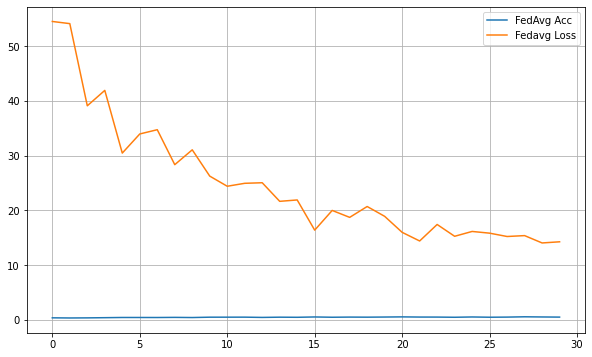

In [4]:
average_acc_list, average_loss_list = [], []

for i in range(1,31):
    tmp_a, tmp_l = 0, 0
    for j in range(num):
        tmp_a = tmp_a + np.mean(globals()['acc{}'.format(j)][i])
        tmp_l = tmp_l + np.mean(globals()['loss{}'.format(j)][i])    
        
    average_acc_list.append(tmp_a/num)
    average_loss_list.append(tmp_l/num)   
    
plt.figure(figsize=(10,6))
plt.plot(average_acc_list, label='FedAvg Acc')
plt.plot(average_loss_list, label='Fedavg Loss')

plt.grid(True)
plt.legend()
plt.show()

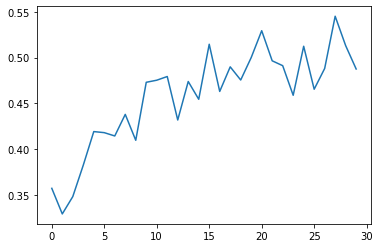

In [5]:
plt.plot(average_acc_list, label='FedAvg Acc')
plt.show()

In [6]:
print(average_acc_list,'\n') 
print(average_loss_list)

[0.35706222454706826, 0.3290899984538555, 0.3480177807311217, 0.3824133363862832, 0.41910999781555597, 0.41793777810202704, 0.414306667033169, 0.43790222621626324, 0.40959444302651615, 0.4729988881283336, 0.47527555624643963, 0.4793122212092082, 0.4317688893940714, 0.47384888927141827, 0.4544255567921533, 0.5145899990366566, 0.46300222211413916, 0.48988111159867714, 0.47549777867065535, 0.5000522256725364, 0.5294022215737236, 0.49648555525475074, 0.49116888774765854, 0.4588055571748151, 0.512392221391201, 0.46540999983747794, 0.48811999956766766, 0.5452088860174019, 0.5130733320282564, 0.4875333324074745] 

[54.51813564300537, 54.123242403401264, 39.105791966782675, 41.921663233306674, 30.463607535097335, 33.957813762293924, 34.73660597536299, 28.346847768624627, 31.059100547764036, 26.256341850095325, 24.40261764725049, 24.940895787212586, 25.043170954121482, 21.64624137348599, 21.897212592760724, 16.38056229352951, 19.98170120716095, 18.71556663778093, 20.70170766048961, 18.903718133

# FedSGD

In [7]:
acc0 = [[], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2768999934196472, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.23029999434947968, 0.10000000149011612, 0.10000000149011612, 0.34369999170303345, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.19589999318122864, 0.10000000149011612, 0.3564000129699707, 0.23839999735355377, 0.1046999990940094, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2759999930858612, 0.10000000149011612, 0.23070000112056732, 0.24089999496936798, 0.2741999924182892], [0.29820001125335693, 0.21070000529289246, 0.10000000149011612, 0.3903999924659729, 0.10000000149011612, 0.2540999948978424, 0.10000000149011612, 0.10000000149011612, 0.3009999990463257, 0.2727999985218048, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.3702999949455261, 0.2815999984741211, 0.10000000149011612, 0.10000000149011612, 0.41119998693466187, 0.10000000149011612, 0.3864000141620636, 0.14900000393390656, 0.10000000149011612, 0.10000000149011612, 0.40560001134872437, 0.32429999113082886, 0.10000000149011612, 0.10000000149011612, 0.18549999594688416], [0.29829999804496765, 0.4702000021934509, 0.30559998750686646, 0.3122999966144562, 0.10000000149011612, 0.10000000149011612, 0.32280001044273376, 0.21410000324249268, 0.2727000117301941, 0.10000000149011612, 0.40779998898506165, 0.10000000149011612, 0.10000000149011612, 0.3634999990463257, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.38749998807907104, 0.10000000149011612, 0.4327999949455261, 0.10000000149011612, 0.44670000672340393, 0.44859999418258667, 0.10000000149011612, 0.10000000149011612, 0.44179999828338623, 0.3878999948501587, 0.27889999747276306, 0.31839999556541443, 0.10000000149011612], [0.44769999384880066, 0.392300009727478, 0.37279999256134033, 0.3472999930381775, 0.10000000149011612, 0.10000000149011612, 0.38339999318122864, 0.33250001072883606, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.4440999925136566, 0.44670000672340393, 0.10000000149011612, 0.41359999775886536, 0.10000000149011612, 0.10000000149011612, 0.4593000113964081, 0.44209998846054077, 0.3517000079154968, 0.3059999942779541, 0.46700000762939453, 0.10000000149011612, 0.450300008058548, 0.10000000149011612, 0.2694999873638153, 0.38109999895095825, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.5789999961853027, 0.10000000149011612, 0.10000000149011612, 0.5044999718666077, 0.44830000400543213, 0.10000000149011612, 0.38029998540878296, 0.10000000149011612, 0.3499000072479248, 0.10000000149011612, 0.5134000182151794, 0.38580000400543213, 0.527899980545044, 0.10000000149011612, 0.5090000033378601, 0.42559999227523804, 0.10000000149011612, 0.3763999938964844, 0.47999998927116394, 0.10000000149011612, 0.35749998688697815, 0.10000000149011612, 0.38109999895095825, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.45649999380111694, 0.10000000149011612, 0.5486999750137329], [0.46050000190734863, 0.4885999858379364, 0.5153999924659729, 0.10000000149011612, 0.10000000149011612, 0.5200999975204468, 0.5781999826431274, 0.38960000872612, 0.10000000149011612, 0.5461999773979187, 0.10000000149011612, 0.539900004863739, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.515999972820282, 0.524399995803833, 0.5519000291824341, 0.49079999327659607, 0.46650001406669617, 0.10000000149011612, 0.5259000062942505, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.49129998683929443, 0.10000000149011612, 0.10000000149011612, 0.4027999937534332, 0.10000000149011612, 0.4684999883174896, 0.49059998989105225, 0.5206999778747559, 0.10000000149011612, 0.10000000149011612, 0.42640000581741333, 0.10000000149011612, 0.10000000149011612, 0.5521000027656555, 0.4607999920845032, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.4943999946117401, 0.10000000149011612, 0.447299987077713, 0.10000000149011612, 0.4715000092983246, 0.10000000149011612, 0.4032999873161316, 0.5422000288963318, 0.4542999863624573], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5213000178337097, 0.10000000149011612, 0.5688999891281128, 0.10000000149011612, 0.10000000149011612, 0.5083000063896179, 0.10000000149011612, 0.446399986743927, 0.10000000149011612, 0.5896000266075134, 0.5861999988555908, 0.4921000003814697, 0.503000020980835, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.538100004196167, 0.6480000019073486, 0.10000000149011612, 0.5939000248908997, 0.10000000149011612, 0.48559999465942383, 0.10000000149011612, 0.5180000066757202, 0.542900025844574, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.5582000017166138, 0.6547999978065491, 0.5755000114440918, 0.5552999973297119, 0.10000000149011612, 0.5214999914169312, 0.10000000149011612, 0.5939000248908997, 0.614300012588501, 0.10000000149011612, 0.6093000173568726, 0.567799985408783, 0.10000000149011612, 0.10000000149011612, 0.6255000233650208, 0.6261000037193298, 0.10000000149011612, 0.5785999894142151, 0.507099986076355, 0.4433000087738037, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5241000056266785, 0.5123999714851379, 0.6115000247955322, 0.10000000149011612], [0.6114000082015991, 0.10000000149011612, 0.6222000122070312, 0.5587999820709229, 0.10000000149011612, 0.559499979019165, 0.57669997215271, 0.5264999866485596, 0.5489000082015991, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5680999755859375, 0.5997999906539917, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6291999816894531, 0.10000000149011612, 0.10000000149011612, 0.5777999758720398, 0.10000000149011612, 0.10000000149011612, 0.5397999882698059, 0.10000000149011612, 0.5812000036239624, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.4758000075817108, 0.10000000149011612, 0.4440000057220459, 0.5637000203132629, 0.48330000042915344, 0.10000000149011612, 0.10000000149011612, 0.5809999704360962, 0.10000000149011612, 0.10000000149011612, 0.5993000268936157, 0.49300000071525574, 0.10000000149011612, 0.5712000131607056, 0.5390999913215637, 0.6687999963760376, 0.49959999322891235, 0.10000000149011612, 0.6216999888420105, 0.10000000149011612, 0.6037999987602234, 0.5181000232696533, 0.10000000149011612, 0.5187000036239624, 0.10000000149011612, 0.10000000149011612], [0.6388000249862671, 0.6621999740600586, 0.5052000284194946, 0.5792999863624573, 0.6190000176429749, 0.10000000149011612, 0.10000000149011612, 0.5340999960899353, 0.10000000149011612, 0.6406000256538391, 0.10000000149011612, 0.10000000149011612, 0.6184999942779541, 0.6080999970436096, 0.6617000102996826, 0.632099986076355, 0.652999997138977, 0.6758999824523926, 0.10000000149011612, 0.6122000217437744, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5968000292778015, 0.10000000149011612, 0.5979999899864197, 0.10000000149011612, 0.6176000237464905, 0.10000000149011612], [0.10000000149011612, 0.5522000193595886, 0.5289000272750854, 0.10000000149011612, 0.6315000057220459, 0.5529999732971191, 0.6137999892234802, 0.6351000070571899, 0.6355999708175659, 0.5788000226020813, 0.10000000149011612, 0.10000000149011612, 0.6309000253677368, 0.64410001039505, 0.6549000144004822, 0.10000000149011612, 0.6450999975204468, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6886000037193298, 0.5698000192642212, 0.10000000149011612, 0.10000000149011612, 0.6085000038146973, 0.10000000149011612, 0.6406999826431274, 0.10000000149011612, 0.6294999718666077, 0.7031999826431274], [0.640999972820282, 0.585099995136261, 0.10000000149011612, 0.6234999895095825, 0.10000000149011612, 0.10000000149011612, 0.6360999941825867, 0.10000000149011612, 0.10010000318288803, 0.5238999724388123, 0.10000000149011612, 0.10000000149011612, 0.558899998664856, 0.10000000149011612, 0.10000000149011612, 0.6477000117301941, 0.10010000318288803, 0.6549999713897705, 0.10000000149011612, 0.64410001039505, 0.5866000056266785, 0.10000000149011612, 0.5293999910354614, 0.6100000143051147, 0.10000000149011612, 0.6223999857902527, 0.10000000149011612, 0.6583999991416931, 0.6055999994277954, 0.6280999779701233], [0.10000000149011612, 0.10000000149011612, 0.10010000318288803, 0.546500027179718, 0.5637999773025513, 0.5679000020027161, 0.10000000149011612, 0.6516000032424927, 0.6398000121116638, 0.10000000149011612, 0.6891000270843506, 0.6261000037193298, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5278000235557556, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5874999761581421, 0.10000000149011612, 0.6029000282287598, 0.10000000149011612, 0.5759999752044678, 0.5766000151634216, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5203999876976013, 0.6466000080108643], [0.10000000149011612, 0.6610000133514404, 0.6322000026702881, 0.678600013256073, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6617000102996826, 0.10000000149011612, 0.11180000007152557, 0.6510000228881836, 0.623199999332428, 0.10010000318288803, 0.6995999813079834, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5784000158309937, 0.6082000136375427, 0.10000000149011612, 0.6068999767303467, 0.6610000133514404, 0.5835000276565552, 0.6121000051498413, 0.10019999742507935, 0.6557000279426575, 0.10000000149011612, 0.6693000197410583, 0.6636999845504761], [0.47780001163482666, 0.6578999757766724, 0.10000000149011612, 0.6603000164031982, 0.10040000081062317, 0.6043999791145325, 0.5149000287055969, 0.10000000149011612, 0.6086000204086304, 0.6294999718666077, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.546999990940094, 0.6913999915122986, 0.10000000149011612, 0.10000000149011612, 0.6351000070571899, 0.6726999878883362, 0.6664999723434448, 0.10000000149011612, 0.6248000264167786, 0.6596999764442444, 0.6252999901771545, 0.5911999940872192, 0.10010000318288803, 0.5782999992370605], [0.5831000208854675, 0.6913999915122986, 0.5799999833106995, 0.10000000149011612, 0.10000000149011612, 0.6017000079154968, 0.6184999942779541, 0.6445000171661377, 0.10000000149011612, 0.10000000149011612, 0.6305000185966492, 0.6564000248908997, 0.609499990940094, 0.10000000149011612, 0.6416000127792358, 0.10000000149011612, 0.10000000149011612, 0.10010000318288803, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6437000036239624, 0.6500999927520752, 0.10000000149011612, 0.6801999807357788, 0.10000000149011612, 0.10000000149011612, 0.5843999981880188, 0.618399977684021, 0.10019999742507935], [0.7053999900817871, 0.5627999901771545, 0.6855999827384949, 0.6888999938964844, 0.7168999910354614, 0.10000000149011612, 0.7003999948501587, 0.10000000149011612, 0.10000000149011612, 0.6446999907493591, 0.10000000149011612, 0.6133000254631042, 0.10000000149011612, 0.11389999836683273, 0.10000000149011612, 0.6295999884605408, 0.7400000095367432, 0.10029999911785126, 0.5888000130653381, 0.6345000267028809, 0.10000000149011612, 0.1809999942779541, 0.10329999774694443, 0.10000000149011612, 0.6625999808311462, 0.10000000149011612, 0.10000000149011612, 0.6617000102996826, 0.6442999839782715, 0.6104000210762024], [0.6025000214576721, 0.10000000149011612, 0.10000000149011612, 0.10199999809265137, 0.10000000149011612, 0.6347000002861023, 0.6865000128746033, 0.6539000272750854, 0.692300021648407, 0.10000000149011612, 0.5964999794960022, 0.10000000149011612, 0.6258999705314636, 0.10000000149011612, 0.1039000004529953, 0.6886000037193298, 0.6265000104904175, 0.583899974822998, 0.6771000027656555, 0.6338000297546387, 0.5979999899864197, 0.10000000149011612, 0.6425999999046326, 0.10450000315904617, 0.6826000213623047, 0.10000000149011612, 0.10000000149011612, 0.6783999800682068, 0.5616000294685364, 0.6807000041007996], [0.6295999884605408, 0.699999988079071, 0.10909999907016754, 0.10000000149011612, 0.697700023651123, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6381000280380249, 0.10000000149011612, 0.6804999709129333, 0.641700029373169, 0.6848000288009644, 0.6703000068664551, 0.5976999998092651, 0.10610000044107437, 0.10000000149011612, 0.6625999808311462, 0.6345000267028809, 0.5867000222206116, 0.6026999950408936, 0.6570000052452087, 0.10000000149011612, 0.10000000149011612, 0.10010000318288803, 0.10000000149011612, 0.7098000049591064, 0.10499999672174454, 0.10000000149011612, 0.10000000149011612], [0.5374000072479248, 0.10000000149011612, 0.5899999737739563, 0.6111000180244446, 0.6646000146865845, 0.10000000149011612, 0.598800003528595, 0.589900016784668, 0.5967000126838684, 0.6952999830245972, 0.6575000286102295, 0.10000000149011612, 0.6776000261306763, 0.7042999863624573, 0.6723999977111816, 0.10000000149011612, 0.10000000149011612, 0.6500999927520752, 0.6514999866485596, 0.727400004863739, 0.1062999963760376, 0.10199999809265137, 0.11620000004768372, 0.7142000198364258, 0.6693999767303467, 0.5824000239372253, 0.1005999967455864, 0.10010000318288803, 0.6829000115394592, 0.7081000208854675], [0.10000000149011612, 0.7027999758720398, 0.6557999849319458, 0.10000000149011612, 0.6798999905586243, 0.12290000170469284, 0.10350000113248825, 0.10000000149011612, 0.6955000162124634, 0.6984000205993652, 0.6714000105857849, 0.6453999876976013, 0.10019999742507935, 0.10970000177621841, 0.6575000286102295, 0.10000000149011612, 0.10040000081062317, 0.10220000147819519, 0.10000000149011612, 0.10090000182390213, 0.10249999910593033, 0.6740999817848206, 0.10000000149011612, 0.10000000149011612, 0.7249000072479248, 0.633899986743927, 0.11270000040531158, 0.7351999878883362, 0.6348999738693237, 0.5741000175476074], [0.10000000149011612, 0.6996999979019165, 0.6965000033378601, 0.6237999796867371, 0.6642000079154968, 0.715499997138977, 0.10000000149011612, 0.10000000149011612, 0.15219999849796295, 0.10000000149011612, 0.650600016117096, 0.14970000088214874, 0.7299000024795532, 0.5796999931335449, 0.6919000148773193, 0.15279999375343323, 0.10000000149011612, 0.7321000099182129, 0.6359999775886536, 0.10180000215768814, 0.6220999956130981, 0.6589000225067139, 0.6786999702453613, 0.10000000149011612, 0.6850000023841858, 0.1006999984383583, 0.718999981880188, 0.13770000636577606, 0.10000000149011612, 0.10000000149011612], [0.1453000009059906, 0.691100001335144, 0.6906999945640564, 0.6597999930381775, 0.12160000205039978, 0.10000000149011612, 0.6351000070571899, 0.7008000016212463, 0.10000000149011612, 0.6525999903678894, 0.640999972820282, 0.6700999736785889, 0.6883000135421753, 0.10000000149011612, 0.10010000318288803, 0.12039999663829803, 0.10000000149011612, 0.669700026512146, 0.6629999876022339, 0.10000000149011612, 0.10000000149011612, 0.10010000318288803, 0.10000000149011612, 0.6739000082015991, 0.10000000149011612, 0.65829998254776, 0.10949999839067459, 0.6707000136375427, 0.6269999742507935, 0.6370999813079834], [0.10100000351667404, 0.10010000318288803, 0.6863999962806702, 0.1103999987244606, 0.7069000005722046, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6283000111579895, 0.10000000149011612, 0.10100000351667404, 0.10360000282526016, 0.10000000149011612, 0.689300000667572, 0.10109999775886536, 0.6416000127792358, 0.6769999861717224, 0.10620000213384628, 0.6291999816894531, 0.7013000249862671, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6557000279426575, 0.7178999781608582, 0.10000000149011612, 0.10000000149011612, 0.5142999887466431, 0.560699999332428, 0.6660000085830688], [0.6790000200271606, 0.10249999910593033, 0.10000000149011612, 0.6996999979019165, 0.6952000260353088, 0.10000000149011612, 0.5947999954223633, 0.7005000114440918, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6883999705314636, 0.10019999742507935, 0.5972999930381775, 0.6665999889373779, 0.6581000089645386, 0.10109999775886536, 0.6596999764442444, 0.10000000149011612, 0.10000000149011612, 0.6977999806404114, 0.6732000112533569, 0.10000000149011612, 0.10000000149011612, 0.695900022983551, 0.6111999750137329, 0.10050000250339508, 0.6204000115394592, 0.6905999779701233], [0.7161999940872192, 0.7504000067710876, 0.6535000205039978, 0.10000000149011612, 0.5763000249862671, 0.6901999711990356, 0.6643999814987183, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6297000050544739, 0.6169000267982483, 0.7260000109672546, 0.6557999849319458, 0.10000000149011612, 0.6523000001907349, 0.6212999820709229, 0.10000000149011612, 0.6378999948501587, 0.6998000144958496, 0.10000000149011612, 0.13920000195503235, 0.13680000603199005, 0.10000000149011612, 0.7318999767303467, 0.10000000149011612, 0.10040000081062317, 0.6607999801635742, 0.10000000149011612, 0.10000000149011612], [0.6413000226020813, 0.6895999908447266, 0.10000000149011612, 0.10000000149011612, 0.5906999707221985, 0.6025000214576721, 0.1574999988079071, 0.10320000350475311, 0.10000000149011612, 0.7279000282287598, 0.10000000149011612, 0.6380000114440918, 0.602400004863739, 0.10000000149011612, 0.6395999789237976, 0.6784999966621399, 0.10040000081062317, 0.6557000279426575, 0.6226999759674072, 0.10000000149011612, 0.12800000607967377, 0.10000000149011612, 0.7422000169754028, 0.10920000076293945, 0.10000000149011612, 0.10040000081062317, 0.5303000211715698, 0.6353999972343445, 0.10080000013113022, 0.10540000349283218], [0.7087000012397766, 0.6247000098228455, 0.5837000012397766, 0.10000000149011612, 0.6207000017166138, 0.7444999814033508, 0.10080000013113022, 0.7178999781608582, 0.6621000170707703, 0.10000000149011612, 0.6633999943733215, 0.7150999903678894, 0.7448999881744385, 0.7232999801635742, 0.10000000149011612, 0.10000000149011612, 0.16590000689029694, 0.6589000225067139, 0.7278000116348267, 0.2371000051498413, 0.1006999984383583, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6978999972343445, 0.6823999881744385, 0.10010000318288803, 0.6881999969482422, 0.7321000099182129]]
loss0 = [[], [12.814886093139648, 15.33200740814209, 15.874845504760742, 9.604903221130371, 2.142117977142334, 13.57649040222168, 14.082184791564941, 14.142245292663574, 13.390568733215332, 2.280618190765381, 17.01032066345215, 14.456631660461426, 2.028831958770752, 13.705339431762695, 12.514604568481445, 9.599433898925781, 2.1728971004486084, 12.6185302734375, 2.142211675643921, 2.0700583457946777, 2.195871591567993, 15.239559173583984, 18.937562942504883, 20.227020263671875, 14.798565864562988, 2.321711301803589, 13.467179298400879, 2.3016650676727295, 2.1310439109802246, 2.1667842864990234], [2.03987979888916, 2.0903780460357666, 9.798185348510742, 1.9936906099319458, 7.415172100067139, 2.152696371078491, 18.491060256958008, 23.742809295654297, 2.105091094970703, 2.276984691619873, 47.18254852294922, 17.288013458251953, 13.86340618133545, 7.655249118804932, 19.803335189819336, 2.0907561779022217, 2.1104633808135986, 17.630048751831055, 22.389263153076172, 1.7163431644439697, 23.334611892700195, 2.0288426876068115, 2.1417620182037354, 14.794693946838379, 21.06968879699707, 1.9936388731002808, 2.0803825855255127, 19.532367706298828, 32.909690856933594, 2.1369264125823975], [1.9670724868774414, 1.7451890707015991, 1.9844952821731567, 2.0002543926239014, 42.49808883666992, 25.118824005126953, 2.0240068435668945, 2.1045377254486084, 2.3122336864471436, 17.961502075195312, 2.4504499435424805, 40.05487823486328, 31.86284637451172, 1.9240986108779907, 19.126291275024414, 42.53644561767578, 31.552837371826172, 1.9701499938964844, 3.642606258392334, 1.8381017446517944, 2.8609609603881836, 1.9482638835906982, 1.9841872453689575, 3.7733070850372314, 31.026790618896484, 1.9064879417419434, 1.955350399017334, 2.1670174598693848, 1.9874448776245117, 40.67597961425781], [1.737333059310913, 1.742443323135376, 1.771333932876587, 1.7822734117507935, 19.267946243286133, 26.26879119873047, 1.7294576168060303, 1.7808960676193237, 16.492122650146484, 35.49190902709961, 15.979484558105469, 1.6930075883865356, 1.72614586353302, 28.983213424682617, 1.7494679689407349, 24.02763557434082, 14.525092124938965, 1.8109865188598633, 1.757353663444519, 1.8328564167022705, 2.0686371326446533, 1.7353990077972412, 31.539230346679688, 1.7572581768035889, 30.109390258789062, 1.936853289604187, 1.7868300676345825, 34.152042388916016, 31.331958770751953, 29.655675888061523], [47.16838073730469, 1.3622863292694092, 9.644355773925781, 17.404808044433594, 1.5998178720474243, 1.7245910167694092, 39.14569854736328, 1.836366057395935, 6.5584564208984375, 1.9951624870300293, 16.54241180419922, 1.6272207498550415, 1.7739406824111938, 1.508792519569397, 15.147865295410156, 1.51231050491333, 1.8076345920562744, 43.54139709472656, 1.7972038984298706, 1.6975855827331543, 41.21505355834961, 1.7670564651489258, 39.5644416809082, 1.531986117362976, 42.568729400634766, 6.882593631744385, 15.463570594787598, 1.6947031021118164, 37.018978118896484, 1.4916316270828247], [1.4766432046890259, 1.5243619680404663, 1.543119192123413, 31.752267837524414, 22.728347778320312, 1.5297695398330688, 1.5341097116470337, 1.6618355512619019, 3.611729621887207, 1.5377236604690552, 36.34009552001953, 1.457878589630127, 3.3812804222106934, 21.38289451599121, 30.361846923828125, 40.90176773071289, 18.072803497314453, 22.372573852539062, 45.78642654418945, 46.179317474365234, 33.44990158081055, 1.8241466283798218, 1.4869403839111328, 1.3892083168029785, 1.512160062789917, 1.6873127222061157, 17.889158248901367, 1.4847487211227417, 46.55097198486328, 16.595369338989258], [41.27500915527344, 9.327895164489746, 1.743528127670288, 23.417112350463867, 14.21805477142334, 1.9321072101593018, 48.615299224853516, 1.424160361289978, 1.5509998798370361, 1.3994213342666626, 13.83071231842041, 14.27505111694336, 1.5682802200317383, 12.659170150756836, 14.037949562072754, 1.2771027088165283, 1.3710060119628906, 14.296133995056152, 14.2227201461792, 9.982658386230469, 27.663471221923828, 1.430041790008545, 14.34533405303955, 1.6319304704666138, 10.473207473754883, 1.4264881610870361, 9.563409805297852, 2.1266767978668213, 1.3057609796524048, 1.769210696220398], [4.9481658935546875, 33.02860641479492, 10.965873718261719, 1.4044034481048584, 4.15371036529541, 1.302734136581421, 4.2463788986206055, 36.82856369018555, 1.8791053295135498, 6.819684982299805, 1.6019065380096436, 26.646150588989258, 1.3962762355804443, 1.2809147834777832, 1.307948350906372, 1.336541771888733, 36.68251419067383, 11.570898056030273, 12.73842716217041, 1.2705830335617065, 1.0779846906661987, 4.794208526611328, 1.208518147468567, 8.042657852172852, 1.3736730813980103, 23.07693099975586, 1.3841296434402466, 1.312415599822998, 34.5924186706543, 4.634432792663574], [18.173748016357422, 1.369081735610962, 1.1929608583450317, 1.2747972011566162, 1.4107993841171265, 33.99879455566406, 1.5136995315551758, 26.546369552612305, 1.2769509553909302, 1.2072992324829102, 34.685848236083984, 1.2317993640899658, 1.3248040676116943, 32.44224548339844, 8.479645729064941, 1.2369062900543213, 1.1131237745285034, 32.076995849609375, 1.2632426023483276, 1.3948395252227783, 1.6440221071243286, 8.487262725830078, 2.8419196605682373, 3.068187952041626, 28.821125030517578, 15.299848556518555, 1.086531162261963, 1.2186304330825806, 1.3243740797042847, 30.153331756591797], [1.203834056854248, 19.610923767089844, 1.3359699249267578, 1.2250423431396484, 35.1574821472168, 1.4756757020950317, 1.312864899635315, 1.3789384365081787, 1.260440468788147, 43.25090408325195, 34.90594482421875, 29.504043579101562, 31.85137176513672, 19.802860260009766, 1.5237008333206177, 1.137813925743103, 31.3514347076416, 31.720413208007812, 29.041675567626953, 1.3329967260360718, 20.076885223388672, 34.418235778808594, 1.2857866287231445, 29.974443435668945, 24.019250869750977, 1.2638347148895264, 31.87264060974121, 1.2297117710113525, 31.576480865478516, 15.792106628417969], [11.045845985412598, 11.948149681091309, 43.459991455078125, 46.37187957763672, 1.5154041051864624, 18.65149688720703, 1.5660206079483032, 1.2294371128082275, 1.3189644813537598, 18.418819427490234, 45.89564514160156, 1.2725608348846436, 12.675860404968262, 8.630996704101562, 1.196963906288147, 1.4861198663711548, 28.89032745361328, 1.332093596458435, 1.3995356559753418, 1.0881494283676147, 1.4244511127471924, 29.13962745666504, 1.1167935132980347, 3.2894339561462402, 1.1059088706970215, 1.3992431163787842, 20.34564971923828, 1.454734206199646, 3.640615224838257, 43.11166763305664], [1.0803600549697876, 1.0580575466156006, 1.2058762311935425, 1.2658445835113525, 1.1500771045684814, 16.650522232055664, 50.65120315551758, 1.3814818859100342, 33.42877960205078, 0.9711253643035889, 34.97161102294922, 36.5859260559082, 1.2477257251739502, 1.4478116035461426, 0.9949002861976624, 1.0513572692871094, 0.9474653601646423, 1.039831519126892, 29.866395950317383, 1.0232346057891846, 30.82209014892578, 13.061311721801758, 12.328887939453125, 13.138248443603516, 1.1605937480926514, 35.10698699951172, 1.172465205192566, 13.011996269226074, 1.0211236476898193, 12.025671005249023], [14.35814380645752, 1.712950348854065, 1.6403120756149292, 14.842092514038086, 1.0930745601654053, 1.9021384716033936, 0.9569302797317505, 1.0667678117752075, 1.1069397926330566, 1.5082147121429443, 20.117210388183594, 24.233728408813477, 1.1388005018234253, 1.059891939163208, 1.0068188905715942, 31.18247413635254, 1.0977674722671509, 15.79331111907959, 18.155609130859375, 31.380359649658203, 0.9055935740470886, 1.2250547409057617, 29.549734115600586, 28.61141014099121, 1.2041047811508179, 26.917465209960938, 1.0864109992980957, 14.853292465209961, 1.0253634452819824, 0.9288550019264221], [1.0447927713394165, 1.7048697471618652, 26.148303985595703, 1.0794960260391235, 33.79724884033203, 30.998008728027344, 1.053228497505188, 21.416738510131836, 5.499934196472168, 1.7884318828582764, 6.766763210296631, 24.1878662109375, 1.1788899898529053, 25.66087532043457, 23.311737060546875, 0.983137309551239, 6.110515594482422, 1.016266942024231, 34.19949722290039, 1.0089579820632935, 1.1988180875778198, 42.0175666809082, 1.615129828453064, 1.1570782661437988, 26.289981842041016, 1.1163159608840942, 26.593921661376953, 0.9815949201583862, 1.187863826751709, 1.2452117204666138], [18.48152732849121, 11.130189895629883, 12.466826438903809, 1.2414642572402954, 1.292127013206482, 1.1860095262527466, 14.871713638305664, 1.0578782558441162, 1.2191489934921265, 12.524822235107422, 0.991935670375824, 1.0405932664871216, 11.990833282470703, 21.52348518371582, 44.95173645019531, 1.26918625831604, 5.850945949554443, 16.243038177490234, 13.100574493408203, 1.186281442642212, 27.38492202758789, 1.1593493223190308, 48.772369384765625, 1.2928611040115356, 1.494124174118042, 15.146056175231934, 10.108305931091309, 42.74054718017578, 1.4192038774490356, 0.9918142557144165], [11.58726692199707, 1.1038726568222046, 1.1683080196380615, 0.9128523468971252, 34.58808898925781, 31.219440460205078, 20.411657333374023, 1.025206208229065, 29.764793395996094, 4.316784381866455, 0.9907890558242798, 1.076771855354309, 4.240508079528809, 0.9062982201576233, 34.18284225463867, 33.85737991333008, 20.85948371887207, 30.69388198852539, 1.434616208076477, 1.1194664239883423, 32.819210052490234, 1.174448847770691, 0.9133877158164978, 1.0637346506118774, 1.3476494550704956, 5.167054176330566, 1.112813115119934, 26.286439895629883, 0.9022902250289917, 1.1306498050689697], [1.413730502128601, 0.9527047872543335, 21.561044692993164, 1.033536672592163, 14.687764167785645, 1.0983937978744507, 1.2418595552444458, 11.911646842956543, 1.1997720003128052, 1.0700287818908691, 15.26799201965332, 28.1096134185791, 22.362585067749023, 30.70592498779297, 13.192652702331543, 19.423114776611328, 1.6464781761169434, 1.0144562721252441, 14.579546928405762, 26.081701278686523, 1.0054502487182617, 0.9038214087486267, 0.951100766658783, 26.24936866760254, 1.2641874551773071, 1.082929253578186, 1.1001179218292236, 1.1887515783309937, 14.914373397827148, 1.229702115058899], [1.6245598793029785, 0.9662383794784546, 1.4148181676864624, 10.807989120483398, 21.939138412475586, 1.1256561279296875, 1.1058350801467896, 0.9717928767204285, 28.005128860473633, 33.19588088989258, 1.0285590887069702, 0.9298378825187683, 1.000089406967163, 24.629741668701172, 1.043756127357483, 22.864656448364258, 20.361194610595703, 11.236943244934082, 22.73340606689453, 32.61431121826172, 20.02077293395996, 1.22230863571167, 0.99495530128479, 28.333396911621094, 0.9258388876914978, 31.3885498046875, 26.289630889892578, 1.40531587600708, 1.027073621749878, 11.547123908996582], [0.860022246837616, 1.4549251794815063, 0.9520767331123352, 0.8545374274253845, 0.8870227336883545, 42.06898880004883, 0.9249047040939331, 15.588279724121094, 30.12666893005371, 1.0543766021728516, 23.493228912353516, 1.244140386581421, 16.729028701782227, 3.8624324798583984, 21.96623992919922, 1.1774170398712158, 0.7789092063903809, 22.89143180847168, 1.262794852256775, 0.9806947112083435, 37.69161605834961, 3.1759636402130127, 3.8500351905822754, 15.430065155029297, 0.9633879661560059, 10.152691841125488, 42.92443084716797, 0.9244920611381531, 1.045974850654602, 1.0512287616729736], [1.0638259649276733, 44.69401931762695, 27.320478439331055, 10.349263191223145, 29.57198143005371, 1.0873205661773682, 1.1921988725662231, 1.0532492399215698, 0.913499116897583, 20.081153869628906, 1.6374133825302124, 18.6221866607666, 1.101482629776001, 18.503374099731445, 8.535421371459961, 1.2790405750274658, 1.0438218116760254, 1.175430417060852, 0.9219069480895996, 1.1896896362304688, 1.2380235195159912, 21.34202003479004, 1.0975760221481323, 6.008205413818359, 1.0595815181732178, 28.10261344909668, 42.65562057495117, 0.9090264439582825, 1.4965733289718628, 0.838694155216217], [1.181995153427124, 0.8519868850708008, 32.006290435791016, 17.501567840576172, 0.8118546605110168, 40.53769302368164, 16.58461570739746, 35.8719596862793, 1.0491939783096313, 29.321796417236328, 0.9042186737060547, 1.1828914880752563, 0.9161146283149719, 0.9842314720153809, 1.1211729049682617, 9.30179500579834, 19.929121017456055, 0.9284124970436096, 1.0651181936264038, 1.165448546409607, 1.334343433380127, 1.0339161157608032, 31.97205352783203, 34.36075973510742, 15.571563720703125, 17.261837005615234, 0.8849685788154602, 10.447291374206543, 28.82457160949707, 15.45674991607666], [1.277431845664978, 13.624069213867188, 1.281994342803955, 1.1598044633865356, 0.9182745218276978, 30.20393180847168, 1.5892304182052612, 1.1953078508377075, 1.6735689640045166, 0.8320327401161194, 0.9384597539901733, 15.268595695495605, 0.9377486109733582, 1.0616663694381714, 0.9806743860244751, 19.95712661743164, 16.593551635742188, 0.9975233674049377, 0.9585742950439453, 0.767778217792511, 3.4416399002075195, 10.929823875427246, 4.4212646484375, 0.9292734265327454, 0.9207842946052551, 1.0009925365447998, 10.108667373657227, 4.800004482269287, 0.9078705906867981, 0.873852550983429], [16.467119216918945, 0.9654155969619751, 1.100321650505066, 27.081247329711914, 1.5633950233459473, 4.3036932945251465, 4.889593601226807, 13.983376502990723, 0.9554192423820496, 0.8670149445533752, 0.9953210949897766, 1.3893531560897827, 16.579505920410156, 11.659812927246094, 1.349327802658081, 27.879228591918945, 16.876935958862305, 9.498486518859863, 16.50871467590332, 10.103169441223145, 16.14324378967285, 0.9159279465675354, 31.01741600036621, 12.088529586791992, 0.8280619382858276, 0.9519599676132202, 9.72253704071045, 0.7568857669830322, 1.015189290046692, 1.245415210723877], [28.91839027404785, 0.8086832761764526, 0.8717408180236816, 1.0530425310134888, 0.921470046043396, 0.7785820364952087, 33.721229553222656, 30.163612365722656, 6.526912689208984, 25.743270874023438, 1.0505846738815308, 3.3119800090789795, 0.7611895799636841, 1.192711591720581, 0.8912438750267029, 4.988044261932373, 49.23091506958008, 0.7679625749588013, 0.9606422781944275, 7.085049152374268, 1.0795977115631104, 0.9710167050361633, 0.9057769775390625, 32.67739486694336, 1.001526117324829, 13.547131538391113, 0.8005391955375671, 8.024389266967773, 36.33277130126953, 20.932870864868164], [6.185445785522461, 1.0348166227340698, 0.9320642352104187, 0.926809549331665, 7.097596168518066, 23.113935470581055, 1.0098680257797241, 0.8522621989250183, 23.15353775024414, 0.8928273320198059, 1.0261508226394653, 0.9929327368736267, 1.0495914220809937, 37.09130096435547, 12.030468940734863, 7.862889289855957, 19.66706657409668, 0.9207896590232849, 0.9757513403892517, 31.454574584960938, 24.45917320251465, 15.721753120422363, 15.20031452178955, 1.0220304727554321, 20.08516502380371, 1.0874453783035278, 10.049341201782227, 1.0714491605758667, 1.1875160932540894, 1.2026126384735107], [14.127704620361328, 29.180788040161133, 0.8653963804244995, 12.69414234161377, 0.8872485160827637, 16.577375411987305, 19.17068099975586, 20.78902244567871, 1.0667729377746582, 9.451201438903809, 16.206064224243164, 19.58696174621582, 11.451079368591309, 0.9035429954528809, 12.463443756103516, 0.9906266331672668, 0.9228338003158569, 8.685847282409668, 1.0255250930786133, 0.8876922130584717, 12.095305442810059, 19.197357177734375, 15.795418739318848, 1.0450767278671265, 0.7215479016304016, 28.083728790283203, 23.536611557006836, 1.2146456241607666, 1.270418405532837, 1.0501285791397095], [0.8622431755065918, 19.010908126831055, 19.953855514526367, 0.9237102270126343, 0.9436951279640198, 10.503089904785156, 1.4785164594650269, 0.8501822352409363, 21.93377685546875, 23.66621971130371, 18.303089141845703, 14.578404426574707, 0.9156787395477295, 15.637269973754883, 1.4091452360153198, 0.9583009481430054, 1.0039246082305908, 10.815966606140137, 1.0088999271392822, 28.46577262878418, 19.225284576416016, 0.8613263964653015, 0.9479965567588806, 23.910030364990234, 13.771018981933594, 0.8972062468528748, 1.1560548543930054, 20.514909744262695, 1.244219183921814, 0.865494430065155], [0.7908039093017578, 0.7790746092796326, 1.1275767087936401, 17.541263580322266, 1.1299813985824585, 0.9738917946815491, 0.9368006587028503, 21.250747680664062, 28.953943252563477, 45.894081115722656, 0.9778946042060852, 1.1430251598358154, 0.8130618333816528, 0.9634793996810913, 32.859798431396484, 0.9228927493095398, 1.1483243703842163, 35.01146697998047, 0.9484359622001648, 0.8363757133483887, 21.07281494140625, 5.451904296875, 5.4714765548706055, 23.674604415893555, 0.8025977611541748, 24.192569732666016, 15.47496223449707, 0.9728720784187317, 29.030744552612305, 31.541627883911133], [1.0262346267700195, 0.8507135510444641, 38.22736358642578, 33.57526397705078, 1.2666387557983398, 1.4595506191253662, 7.449596881866455, 10.888372421264648, 17.94689178466797, 0.7989250421524048, 34.21820831298828, 1.206102967262268, 1.0574263334274292, 37.99520492553711, 1.0631225109100342, 0.90628582239151, 14.201362609863281, 0.9383032917976379, 0.9587010741233826, 27.06793975830078, 9.60473918914795, 15.984196662902832, 0.7117108106613159, 12.382083892822266, 13.652645111083984, 6.395854473114014, 1.2082091569900513, 1.0218408107757568, 12.072907447814941, 14.071981430053711], [0.8264747858047485, 1.0757818222045898, 1.2057056427001953, 22.339832305908203, 0.9844788908958435, 0.8169050216674805, 30.724246978759766, 0.7842165231704712, 0.9333728551864624, 19.362625122070312, 0.9544411897659302, 0.7834101915359497, 0.7490538954734802, 0.7852627635002136, 26.76089096069336, 29.7113094329834, 8.905586242675781, 1.358514428138733, 0.753182590007782, 2.559691905975342, 27.09709358215332, 20.11171531677246, 22.07225799560547, 10.69622802734375, 20.3802490234375, 0.868565022945404, 0.890461802482605, 14.644054412841797, 0.9455819129943848, 0.6852747201919556]] 

acc1 = [[], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10830000042915344, 0.1981000006198883, 0.10000000149011612, 0.10000000149011612, 0.31709998846054077, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.3756999969482422, 0.10000000149011612, 0.10000000149011612, 0.33489999175071716, 0.15299999713897705, 0.17399999499320984, 0.10000000149011612, 0.18230000138282776, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.43720000982284546, 0.10000000149011612, 0.3546999990940094, 0.24809999763965607, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.35179999470710754, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1736000031232834, 0.10000000149011612, 0.10000000149011612, 0.15870000422000885, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.16140000522136688, 0.10000000149011612, 0.17520000040531158, 0.10000000149011612, 0.1647000014781952, 0.10000000149011612, 0.20579999685287476, 0.19979999959468842, 0.10000000149011612, 0.28690001368522644, 0.2646999955177307, 0.10000000149011612, 0.10000000149011612, 0.25619998574256897, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.39410001039505005, 0.3330000042915344, 0.10000000149011612, 0.10000000149011612, 0.1940000057220459, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.41110000014305115, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.31360000371932983, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.2892000079154968, 0.10000000149011612, 0.2766999900341034, 0.10000000149011612, 0.5458999872207642, 0.37689998745918274, 0.10000000149011612, 0.3630000054836273, 0.10000000149011612, 0.10000000149011612, 0.19269999861717224, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.22619999945163727, 0.4034999907016754, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.21330000460147858, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.15870000422000885, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.4690000116825104, 0.10000000149011612, 0.1648000031709671, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.16699999570846558, 0.10000000149011612, 0.10000000149011612, 0.24220000207424164, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.22660000622272491, 0.26170000433921814, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.3163999915122986, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.3711000084877014, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.4271000027656555, 0.3930000066757202, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.3156999945640564, 0.2736000120639801, 0.3416000008583069, 0.41370001435279846, 0.10000000149011612, 0.10000000149011612, 0.32589998841285706, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2669999897480011, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.30090001225471497, 0.4641999900341034, 0.3621000051498413], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.19699999690055847, 0.35280001163482666, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.25920000672340393, 0.3093000054359436, 0.35350000858306885, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.3813000023365021, 0.4812000095844269, 0.10000000149011612, 0.10000000149011612, 0.6291999816894531, 0.5081999897956848, 0.10000000149011612, 0.10000000149011612, 0.4343000054359436, 0.4000999927520752, 0.10170000046491623, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5231000185012817, 0.47350001335144043, 0.3303000032901764, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.3537999987602234, 0.10000000149011612, 0.31869998574256897, 0.4271000027656555, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5235000252723694, 0.10000000149011612, 0.10000000149011612, 0.42149999737739563, 0.10000000149011612, 0.10000000149011612, 0.4068000018596649, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.542900025844574, 0.40619999170303345, 0.10000000149011612], [0.2818000018596649, 0.3758000135421753, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5001999735832214, 0.10000000149011612, 0.10000000149011612, 0.4512999951839447, 0.5425000190734863, 0.10000000149011612, 0.42340001463890076, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5478000044822693, 0.10000000149011612, 0.47920000553131104, 0.4948999881744385, 0.5694000124931335, 0.10000000149011612, 0.10000000149011612, 0.5224999785423279], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.4146000146865845, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5539000034332275, 0.10000000149011612, 0.4876999855041504, 0.10000000149011612, 0.6463000178337097, 0.10830000042915344, 0.10000000149011612, 0.10000000149011612, 0.5224999785423279, 0.10000000149011612, 0.4302000105381012, 0.49230000376701355, 0.10000000149011612, 0.10000000149011612, 0.47699999809265137, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.5511000156402588, 0.10000000149011612, 0.10000000149011612, 0.31529998779296875, 0.10000000149011612, 0.10000000149011612, 0.33180001378059387, 0.4634000062942505, 0.4747999906539917, 0.3149999976158142, 0.49639999866485596, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.4408000111579895, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.49720001220703125, 0.5213000178337097, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5196999907493591, 0.4921000003814697, 0.10000000149011612, 0.10000000149011612, 0.4747999906539917], [0.10000000149011612, 0.10000000149011612, 0.47290000319480896, 0.5555999875068665, 0.10000000149011612, 0.37540000677108765, 0.539900004863739, 0.45829999446868896, 0.3991999924182892, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.44929999113082886, 0.10000000149011612, 0.10000000149011612, 0.46700000762939453, 0.10000000149011612, 0.10000000149011612, 0.5041000247001648, 0.10000000149011612, 0.44200000166893005, 0.10000000149011612, 0.10000000149011612, 0.4575999975204468, 0.6148999929428101, 0.10000000149011612], [0.4507000148296356, 0.10000000149011612, 0.22930000722408295, 0.10000000149011612, 0.10040000081062317, 0.10000000149011612, 0.4918000102043152, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.527400016784668, 0.1647000014781952, 0.10000000149011612, 0.10000000149011612, 0.6256999969482422, 0.10159999877214432, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6725000143051147, 0.49300000071525574, 0.10000000149011612, 0.10000000149011612, 0.4729999899864197, 0.5666999816894531, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.5268999934196472, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.501800000667572, 0.27149999141693115, 0.10000000149011612, 0.10000000149011612, 0.10090000182390213, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6111999750137329, 0.4927999973297119, 0.51910001039505, 0.10000000149011612, 0.10040000081062317, 0.10029999911785126, 0.10000000149011612, 0.4772999882698059, 0.6297000050544739, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6176000237464905, 0.10000000149011612], [0.10000000149011612, 0.6089000105857849, 0.4490000009536743, 0.611299991607666, 0.6040999889373779, 0.6032000184059143, 0.6082000136375427, 0.13259999454021454, 0.10000000149011612, 0.10000000149011612, 0.6553000211715698, 0.10109999775886536, 0.5555999875068665, 0.5113000273704529, 0.10000000149011612, 0.635200023651123, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5651999711990356, 0.10000000149011612, 0.6557999849319458, 0.5881999731063843, 0.10159999877214432, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.4846999943256378, 0.5819000005722046], [0.10000000149011612, 0.10000000149011612, 0.5580000281333923, 0.10360000282526016, 0.326200008392334, 0.41600000858306885, 0.10000000149011612, 0.10000000149011612, 0.5418000221252441, 0.10000000149011612, 0.5407999753952026, 0.10000000149011612, 0.6061999797821045, 0.6710000038146973, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6438000202178955, 0.39730000495910645, 0.10000000149011612, 0.10000000149011612, 0.5996000170707703, 0.382099986076355, 0.10000000149011612, 0.10080000013113022, 0.6302000284194946, 0.10000000149011612, 0.40299999713897705, 0.10000000149011612], [0.3619000017642975, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.37940001487731934, 0.10000000149011612, 0.5925999879837036, 0.10000000149011612, 0.10010000318288803, 0.10000000149011612, 0.5713000297546387, 0.10000000149011612, 0.10000000149011612, 0.14890000224113464, 0.6215000152587891, 0.10029999911785126, 0.10019999742507935, 0.10000000149011612, 0.6801000237464905, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5464000105857849, 0.10000000149011612, 0.10000000149011612, 0.5831000208854675, 0.10000000149011612, 0.6133999824523926], [0.6204000115394592, 0.5819000005722046, 0.10000000149011612, 0.6294000148773193, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.21130000054836273, 0.5921000242233276, 0.10010000318288803, 0.10000000149011612, 0.10000000149011612, 0.5152000188827515, 0.10000000149011612, 0.5299000144004822, 0.10000000149011612, 0.5152000188827515, 0.4108999967575073, 0.5683000087738037, 0.10000000149011612, 0.18889999389648438, 0.5843999981880188, 0.10000000149011612, 0.1014999970793724, 0.10000000149011612, 0.10000000149011612, 0.42649999260902405, 0.26019999384880066, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10010000318288803, 0.6327000260353088, 0.10000000149011612, 0.10010000318288803, 0.6098999977111816, 0.6108999848365784, 0.5547999739646912, 0.663100004196167, 0.10000000149011612, 0.10000000149011612, 0.5045999884605408, 0.6055999994277954, 0.10000000149011612, 0.10000000149011612, 0.6190000176429749, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.579200029373169, 0.10000000149011612, 0.6570000052452087, 0.10000000149011612, 0.10000000149011612, 0.5870000123977661, 0.11789999902248383, 0.4090999960899353, 0.12860000133514404], [0.10000000149011612, 0.10010000318288803, 0.5623999834060669, 0.697700023651123, 0.10000000149011612, 0.6036999821662903, 0.647599995136261, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5031999945640564, 0.10000000149011612, 0.10000000149011612, 0.609000027179718, 0.5737000107765198, 0.546999990940094, 0.10000000149011612, 0.6977999806404114, 0.6055999994277954, 0.5680000185966492, 0.10000000149011612, 0.2888000011444092, 0.6288999915122986, 0.10000000149011612, 0.10000000149011612, 0.48190000653266907, 0.10000000149011612, 0.3009999990463257, 0.10000000149011612, 0.10000000149011612], [0.588699996471405, 0.10000000149011612, 0.4925000071525574, 0.10000000149011612, 0.17640000581741333, 0.10000000149011612, 0.6772000193595886, 0.1005999967455864, 0.10000000149011612, 0.5371999740600586, 0.10000000149011612, 0.10010000318288803, 0.10000000149011612, 0.10000000149011612, 0.5724999904632568, 0.10000000149011612, 0.6814000010490417, 0.10000000149011612, 0.10000000149011612, 0.10010000318288803, 0.10740000009536743, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5307000279426575, 0.1395999938249588, 0.13189999759197235, 0.10000000149011612, 0.5960999727249146], [0.10000000149011612, 0.10000000149011612, 0.6072999835014343, 0.10339999943971634, 0.10019999742507935, 0.10000000149011612, 0.6207000017166138, 0.10000000149011612, 0.4034000039100647, 0.6642000079154968, 0.10000000149011612, 0.14079999923706055, 0.12720000743865967, 0.10010000318288803, 0.10000000149011612, 0.10000000149011612, 0.6236000061035156, 0.10010000318288803, 0.396699994802475, 0.5242000222206116, 0.18529999256134033, 0.6601999998092651, 0.10000000149011612, 0.10010000318288803, 0.10010000318288803, 0.10000000149011612, 0.10000000149011612, 0.42899999022483826, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10050000250339508, 0.10000000149011612, 0.676800012588501, 0.10000000149011612, 0.6456000208854675, 0.10000000149011612, 0.6204000115394592, 0.48100000619888306, 0.6312000155448914, 0.5311999917030334, 0.10000000149011612, 0.10000000149011612, 0.6879000067710876, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10010000318288803, 0.10000000149011612, 0.673799991607666, 0.44119998812675476, 0.6491000056266785, 0.10000000149011612, 0.10000000149011612, 0.39340001344680786, 0.566100001335144, 0.32199999690055847, 0.10000000149011612], [0.6965000033378601, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10050000250339508, 0.6219000220298767, 0.10000000149011612, 0.10100000351667404, 0.6380000114440918, 0.10000000149011612, 0.10000000149011612, 0.6873999834060669, 0.6819999814033508, 0.10000000149011612, 0.5317000150680542, 0.47690001130104065, 0.5929999947547913, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6367999911308289, 0.49970000982284546, 0.6535999774932861, 0.10610000044107437, 0.6241999864578247, 0.10000000149011612, 0.18150000274181366], [0.10010000318288803, 0.19099999964237213, 0.10010000318288803, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6722000241279602, 0.10000000149011612, 0.10000000149011612, 0.5740000009536743, 0.10000000149011612, 0.10239999741315842, 0.10080000013113022, 0.10000000149011612, 0.5672000050544739, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10010000318288803, 0.10119999945163727, 0.10000000149011612, 0.6561999917030334, 0.10000000149011612, 0.6610999703407288, 0.6572999954223633], [0.10000000149011612, 0.10000000149011612, 0.6753000020980835, 0.5160999894142151, 0.10000000149011612, 0.15240000188350677, 0.10000000149011612, 0.6154999732971191, 0.10000000149011612, 0.5548999905586243, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6955000162124634, 0.10000000149011612, 0.2190999984741211, 0.6563000082969666, 0.10000000149011612, 0.13580000400543213, 0.10000000149011612, 0.10000000149011612, 0.6381999850273132, 0.10000000149011612, 0.10920000076293945, 0.10080000013113022, 0.10000000149011612, 0.10000000149011612, 0.5763000249862671, 0.10000000149011612, 0.10000000149011612], [0.6168000102043152, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10029999911785126, 0.10000000149011612, 0.3529999852180481, 0.6782000064849854, 0.6564000248908997, 0.10000000149011612, 0.612500011920929, 0.2734000086784363, 0.12370000034570694, 0.6122999787330627, 0.10000000149011612, 0.10000000149011612, 0.15629999339580536, 0.6420999765396118, 0.10000000149011612, 0.10000000149011612, 0.5950999855995178, 0.10000000149011612, 0.12720000743865967, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6901000142097473, 0.6692000031471252, 0.7214999794960022], [0.10000000149011612, 0.5188999772071838, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6359999775886536, 0.10040000081062317, 0.515999972820282, 0.6554999947547913, 0.10000000149011612, 0.553600013256073, 0.6347000002861023, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6205000281333923, 0.695900022983551, 0.10000000149011612, 0.47130000591278076, 0.13809999823570251, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.20419999957084656, 0.6230000257492065, 0.10000000149011612, 0.10000000149011612, 0.10010000318288803, 0.10000000149011612, 0.11289999634027481], [0.10000000149011612, 0.10000000149011612, 0.10029999911785126, 0.6121000051498413, 0.10000000149011612, 0.6152999997138977, 0.6468999981880188, 0.10989999771118164, 0.10000000149011612, 0.6690999865531921, 0.10000000149011612, 0.10000000149011612, 0.6517000198364258, 0.6644999980926514, 0.10000000149011612, 0.6191999912261963, 0.6740999817848206, 0.6025000214576721, 0.6747999787330627, 0.27869999408721924, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10090000182390213, 0.10000000149011612, 0.5936999917030334, 0.10000000149011612, 0.6477000117301941, 0.10000000149011612, 0.46480000019073486]]
loss1 = [[], [2.4226176738739014, 21.742563247680664, 3.538828134536743, 2.2615723609924316, 2.742288589477539, 15.39342212677002, 3.2594943046569824, 2.2184884548187256, 12.857855796813965, 37.340843200683594, 5.8091816902160645, 9.959007263183594, 15.10448169708252, 10.21919059753418, 4.614343166351318, 84.83097839355469, 14.350764274597168, 1.877631425857544, 27.43526840209961, 7.67471170425415, 2.1688897609710693, 2.3307814598083496, 2.369377613067627, 36.045589447021484, 3.7381784915924072, 3.314079761505127, 44.13371658325195, 12.829885482788086, 9.125224113464355, 8.345855712890625], [2.5055902004241943, 28.718582153320312, 92.5002212524414, 15.636162757873535, 4.925443172454834, 2.15433406829834, 69.53582763671875, 2.1291394233703613, 2.2269985675811768, 8.580460548400879, 2.7230780124664307, 2.2801690101623535, 19.62293243408203, 14.705493927001953, 48.40445327758789, 5.434864044189453, 14.983327865600586, 30.18822479248047, 51.5570068359375, 2.0504026412963867, 57.16752624511719, 38.25687026977539, 8.755228042602539, 48.604713439941406, 56.91982650756836, 2.2515251636505127, 20.96098518371582, 2.338879108428955, 2.3193821907043457, 4.024519920349121], [6.3453049659729, 3.250675678253174, 29.42979621887207, 3.8978383541107178, 13.122151374816895, 6.3662896156311035, 2.25258469581604, 13.850318908691406, 2.2693591117858887, 4.1698102951049805, 2.163832187652588, 6.514009475708008, 2.2188942432403564, 2.1726412773132324, 3.322438955307007, 2.26143741607666, 2.2417502403259277, 6.180870532989502, 2.5575144290924072, 2.2062196731567383, 3.9608383178710938, 10.798674583435059, 14.300951957702637, 23.576168060302734, 6.386505603790283, 13.790959358215332, 3.8712618350982666, 21.041542053222656, 6.969231128692627, 3.4004054069519043], [1.739147663116455, 1.736970067024231, 9.559700965881348, 2.7032854557037354, 2.7790210247039795, 55.65237045288086, 6.238371849060059, 14.667586326599121, 21.765005111694336, 19.764291763305664, 2.798368453979492, 47.891536712646484, 1.585782766342163, 2.737515926361084, 15.156834602355957, 9.809345245361328, 10.055237770080566, 4.41778564453125, 43.83523178100586, 2.1073381900787354, 56.472869873046875, 21.658214569091797, 16.070587158203125, 14.343257904052734, 2.8085997104644775, 12.511137008666992, 48.99201583862305, 3.731555938720703, 18.570575714111328, 32.6991081237793], [10.043740272521973, 15.690142631530762, 2.123501777648926, 19.764863967895508, 2.8497378826141357, 10.932332992553711, 1.8805418014526367, 1.6839947700500488, 22.569852828979492, 2.1099207401275635, 37.66054153442383, 31.505640029907227, 6.95027494430542, 11.799605369567871, 31.04473114013672, 58.20557403564453, 18.612979888916016, 35.95846939086914, 30.730178833007812, 2.9574472904205322, 1.950473666191101, 13.353280067443848, 13.673845291137695, 39.261287689208984, 2.078748941421509, 78.02481079101562, 16.198148727416992, 19.610044479370117, 2.5256223678588867, 19.2606258392334], [3.38264799118042, 8.311659812927246, 5.774061679840088, 38.3204231262207, 3.4836995601654053, 9.354483604431152, 3.45316219329834, 2.045184850692749, 2.514594078063965, 2.1351940631866455, 13.86298942565918, 3.8890278339385986, 24.1755428314209, 2.19705867767334, 17.194005966186523, 6.586859226226807, 2.097154140472412, 5.360681533813477, 11.915740966796875, 12.140507698059082, 2.100592851638794, 2.149111032485962, 3.7018001079559326, 6.283480167388916, 19.190937042236328, 3.399836778640747, 2.160633087158203, 38.77614212036133, 2.7314071655273438, 6.496067523956299], [29.39771270751953, 1.8798919916152954, 13.283512115478516, 3.8786118030548096, 28.570899963378906, 28.346412658691406, 1.7191818952560425, 1.899956464767456, 2.6892266273498535, 29.079030990600586, 37.486812591552734, 2.018324613571167, 1.9791259765625, 1.9529839754104614, 1.872534990310669, 12.030970573425293, 2.279210090637207, 2.1578612327575684, 27.313508987426758, 2.778066396713257, 19.500722885131836, 32.25933837890625, 38.611839294433594, 2.0931427478790283, 2.439894199371338, 5.048474311828613, 27.452131271362305, 1.9133671522140503, 1.5552446842193604, 1.7442859411239624], [9.861504554748535, 30.81306266784668, 36.29538345336914, 26.762174606323242, 4.359760761260986, 3.671096086502075, 1.6911810636520386, 14.862754821777344, 32.73073959350586, 3.53415584564209, 2.0187838077545166, 1.968580722808838, 2.7610838413238525, 27.301565170288086, 6.024062156677246, 68.66870880126953, 1.7835803031921387, 1.7488157749176025, 48.80661392211914, 45.41957473754883, 1.2172521352767944, 1.6727173328399658, 15.288604736328125, 38.96186447143555, 1.7571654319763184, 1.746815800666809, 2.1778793334960938, 24.907438278198242, 41.5513801574707, 4.369824409484863], [7.310328960418701, 6.122406005859375, 12.099698066711426, 1.6040056943893433, 1.6694886684417725, 1.9638607501983643, 53.1877326965332, 8.097918510437012, 17.270244598388672, 2.4736716747283936, 14.210529327392578, 1.699803352355957, 1.7691458463668823, 55.470611572265625, 12.830183982849121, 23.145736694335938, 1.5851068496704102, 7.4673943519592285, 6.624682903289795, 1.7289382219314575, 19.43764877319336, 90.1002426147461, 1.6351250410079956, 14.890006065368652, 19.620588302612305, 17.080141067504883, 74.1225814819336, 1.46016526222229, 1.9171044826507568, 14.174046516418457], [2.470343828201294, 1.6381738185882568, 60.78190612792969, 12.428427696228027, 8.613611221313477, 27.425153732299805, 33.8569221496582, 1.6620227098464966, 29.943017959594727, 2.5179553031921387, 1.5415164232254028, 1.5345569849014282, 45.23776626586914, 2.1802170276641846, 46.27299880981445, 16.41667938232422, 32.48097229003906, 26.31556510925293, 10.664512634277344, 16.219083786010742, 64.62740325927734, 33.8477783203125, 1.68588125705719, 21.003416061401367, 1.5806424617767334, 1.4991881847381592, 1.6278674602508545, 11.441696166992188, 10.842462539672852, 1.5250377655029297], [33.23684310913086, 66.40319061279297, 7.32243537902832, 10.96751880645752, 1.9951156377792358, 48.30065155029297, 9.810039520263672, 16.820209503173828, 15.240538597106934, 15.009210586547852, 1.5718348026275635, 13.14050006866455, 1.6098358631134033, 5.807175159454346, 1.2494829893112183, 2.9866652488708496, 6.505190849304199, 5.790709972381592, 1.428452968597412, 6.2869672775268555, 1.9149065017700195, 1.4468826055526733, 9.063265800476074, 11.696565628051758, 1.5685644149780273, 82.44605255126953, 33.249000549316406, 17.13512420654297, 34.14347839355469, 17.8537654876709], [19.607620239257812, 1.47603178024292, 61.60902404785156, 56.54386901855469, 4.34435510635376, 56.4617805480957, 45.752445220947266, 3.1440694332122803, 1.5123944282531738, 1.3448424339294434, 6.5911455154418945, 1.711801528930664, 46.99403381347656, 66.97531127929688, 38.97938537597656, 2.036001443862915, 41.82590103149414, 15.228520393371582, 21.18734359741211, 1.5925294160842896, 1.2487671375274658, 14.288212776184082, 20.98672103881836, 19.207168579101562, 21.483213424682617, 1.2689162492752075, 1.3558714389801025, 27.30843162536621, 32.88777542114258, 1.3576780557632446], [18.550817489624023, 8.808053016662598, 1.5822479724884033, 1.617499589920044, 7.304816246032715, 1.9278078079223633, 1.5680296421051025, 1.5721997022628784, 1.6508382558822632, 9.358440399169922, 40.22775650024414, 66.58311462402344, 49.06589889526367, 16.764514923095703, 6.544973850250244, 15.899040222167969, 1.7614445686340332, 18.573345184326172, 8.6900053024292, 1.5918960571289062, 14.723907470703125, 7.054489612579346, 1.559251308441162, 10.638526916503906, 1.5907231569290161, 8.531630516052246, 10.081425666809082, 1.7018229961395264, 1.4517560005187988, 18.547277450561523], [1.5263566970825195, 49.737518310546875, 1.9248273372650146, 14.54787540435791, 7.177221775054932, 49.29576110839844, 2.0622401237487793, 3.9443163871765137, 14.798820495605469, 73.50423431396484, 33.60082244873047, 1.207622766494751, 9.216647148132324, 47.67462158203125, 24.52036476135254, 1.1628508567810059, 9.292126655578613, 35.80519485473633, 12.812131881713867, 15.493468284606934, 9.662703514099121, 1.1119182109832764, 1.2963062524795532, 4.083609580993652, 11.050091743469238, 1.4080601930618286, 1.2888712882995605, 47.18062210083008, 9.121193885803223, 24.892122268676758], [6.815438270568848, 45.690635681152344, 1.419253945350647, 5.700353145599365, 21.43747901916504, 52.545650482177734, 1.4144235849380493, 2.2313907146453857, 18.00506019592285, 43.86391830444336, 7.0291619300842285, 8.795763969421387, 4.7472686767578125, 11.625296592712402, 103.05227661132812, 1.1941711902618408, 1.790017008781433, 1.3551768064498901, 4.247467041015625, 7.030028343200684, 7.8435797691345215, 51.45782470703125, 1.5151827335357666, 1.2492035627365112, 27.144309997558594, 6.81724214553833, 65.05250549316406, 7.227246284484863, 1.416375994682312, 17.105484008789062], [47.33730697631836, 1.162431001663208, 1.2912676334381104, 1.1178770065307617, 1.1570991277694702, 1.192134141921997, 1.3257540464401245, 7.573367118835449, 28.90855598449707, 48.77308654785156, 1.1595319509506226, 4.187195777893066, 1.3695898056030273, 1.300592064857483, 29.844013214111328, 1.1441296339035034, 23.012943267822266, 48.65333938598633, 25.440866470336914, 1.286314606666565, 14.821684837341309, 1.3304953575134277, 1.2328706979751587, 5.684620380401611, 16.402101516723633, 59.28666687011719, 4.707637310028076, 12.936145782470703, 1.522425651550293, 1.297768473625183], [12.621916770935059, 78.50310516357422, 1.1614091396331787, 5.429403781890869, 3.5205535888671875, 1.7349443435668945, 6.374406814575195, 12.491175651550293, 1.5506880283355713, 27.43102264404297, 1.227570652961731, 53.327301025390625, 1.0520832538604736, 0.9520818591117859, 15.906702995300293, 10.424965858459473, 18.36981773376465, 21.420257568359375, 1.0440624952316284, 1.9599963426589966, 38.448951721191406, 8.476700782775879, 1.2500780820846558, 1.9744383096694946, 18.240583419799805, 8.137343406677246, 1.1716132164001465, 11.000032424926758, 1.4337536096572876, 74.08011627197266], [2.5134260654449463, 101.12113189697266, 20.198347091674805, 18.608718872070312, 17.337017059326172, 42.84328079223633, 2.7564151287078857, 15.582965850830078, 1.1637024879455566, 24.515724182128906, 9.726282119750977, 20.43973731994629, 1.2323462963104248, 19.158489227294922, 41.4273681640625, 3.8207437992095947, 1.0791304111480713, 9.229860305786133, 10.986919403076172, 22.367406845092773, 0.9508593678474426, 23.151344299316406, 41.692626953125, 22.274852752685547, 1.567584753036499, 26.97951316833496, 22.056703567504883, 1.2826265096664429, 19.490894317626953, 1.0681214332580566], [1.232948899269104, 1.3761072158813477, 17.990705490112305, 1.0938663482666016, 20.509004592895508, 13.593138694763184, 21.8037166595459, 26.04884147644043, 6.4257988929748535, 1.1554999351501465, 7.472555637359619, 30.213672637939453, 52.346824645996094, 1.487397313117981, 11.842317581176758, 1.2759169340133667, 17.263957977294922, 1.3286033868789673, 1.9378665685653687, 1.079892635345459, 7.653937339782715, 9.29743766784668, 1.1807492971420288, 29.904571533203125, 18.60233497619629, 25.82818603515625, 52.64005661010742, 2.029911756515503, 3.17130446434021, 27.13228988647461], [30.632068634033203, 21.470571517944336, 13.698359489440918, 2.861968517303467, 1.1048610210418701, 18.903270721435547, 16.405235290527344, 1.0339257717132568, 1.1532962322235107, 1.1746397018432617, 0.9438171982765198, 28.847936630249023, 6.806901454925537, 1.3861825466156006, 1.1578842401504517, 66.08670043945312, 27.705944061279297, 1.0500454902648926, 23.547687530517578, 39.01853561401367, 6.722986698150635, 1.1387012004852295, 10.085546493530273, 0.9792701005935669, 31.97648811340332, 49.98176193237305, 1.0750243663787842, 2.450623035430908, 1.868709921836853, 8.105039596557617], [9.668606758117676, 16.385534286499023, 1.3707081079483032, 0.9367538094520569, 8.686201095581055, 2.1419758796691895, 1.0722944736480713, 45.7078742980957, 75.1151123046875, 35.98074722290039, 1.744528889656067, 35.31862258911133, 13.868176460266113, 1.1177139282226562, 1.2778578996658325, 1.2946504354476929, 30.447227478027344, 0.8617873787879944, 1.1558082103729248, 1.1724321842193604, 71.12915802001953, 6.081322193145752, 1.0479919910430908, 41.4456672668457, 40.710365295410156, 1.9811198711395264, 18.67938995361328, 3.8706984519958496, 33.37377166748047, 34.208797454833984], [1.155235767364502, 33.97416305541992, 1.2934685945510864, 36.76901626586914, 4.039693355560303, 26.706541061401367, 0.9036259055137634, 9.793692588806152, 24.999286651611328, 1.2237595319747925, 12.549901962280273, 5.9689717292785645, 27.337358474731445, 49.70774459838867, 1.7478229999542236, 31.480518341064453, 0.9706208109855652, 18.74970054626465, 17.755470275878906, 14.509793281555176, 10.449134826660156, 10.124836921691895, 11.906096458435059, 117.8441390991211, 25.350738525390625, 1.094579815864563, 6.5453200340271, 8.66623592376709, 57.693931579589844, 1.1240599155426025], [33.24888610839844, 76.4386215209961, 1.2621808052062988, 11.547284126281738, 2.9596428871154785, 38.351837158203125, 1.0700571537017822, 19.35894775390625, 1.744934320449829, 0.9957996010780334, 44.86259841918945, 4.467530727386475, 3.106337308883667, 3.5426690578460693, 30.408906936645508, 31.376850128173828, 1.1663427352905273, 5.53051233291626, 1.5458866357803345, 1.5456188917160034, 2.482452392578125, 1.0449696779251099, 39.1850700378418, 2.7650492191314697, 11.731637954711914, 13.598742485046387, 28.081933975219727, 2.877781867980957, 12.04736042022705, 28.623638153076172], [17.8602352142334, 10.446881294250488, 28.167797088623047, 8.571405410766602, 18.18036651611328, 1.0806636810302734, 18.790340423583984, 1.0554920434951782, 22.45137596130371, 1.2231214046478271, 2.1501622200012207, 1.0822365283966064, 1.6950187683105469, 13.19102954864502, 13.117691040039062, 0.8479779362678528, 32.64440155029297, 20.947359085083008, 14.985064506530762, 6.072445392608643, 27.03765296936035, 1.0364431142807007, 1.3759223222732544, 1.1808522939682007, 23.974552154541016, 72.31546020507812, 1.9028228521347046, 1.127539038658142, 2.621885061264038, 50.04081344604492], [0.9584384560585022, 76.68455505371094, 81.3469009399414, 65.32789611816406, 11.394449234008789, 28.558368682861328, 28.783803939819336, 11.127522468566895, 1.3472627401351929, 19.68636703491211, 8.986899375915527, 1.0529533624649048, 60.85329818725586, 29.039321899414062, 0.893916130065918, 0.9378452897071838, 18.252267837524414, 1.7294480800628662, 2.6487135887145996, 1.2738823890686035, 20.136716842651367, 30.791215896606445, 16.06730079650879, 1.0431852340698242, 2.1267247200012207, 0.9602197408676147, 16.787616729736328, 1.092573881149292, 10.773843765258789, 6.584106922149658], [5.964287757873535, 4.1632161140441895, 16.465721130371094, 15.055709838867188, 6.525400161743164, 8.556306838989258, 45.128562927246094, 0.9576119184494019, 47.942745208740234, 83.11583709716797, 1.6861472129821777, 23.985963821411133, 15.267909049987793, 7.151906967163086, 31.733360290527344, 1.243686556816101, 66.71326446533203, 37.15673828125, 23.526296615600586, 44.24801254272461, 43.4434814453125, 25.687772750854492, 44.40505599975586, 6.733302116394043, 22.12598991394043, 8.75395393371582, 0.9414746165275574, 18.69510269165039, 0.9360307455062866, 1.007685899734497], [22.339523315429688, 13.573776245117188, 0.9773735404014587, 1.4939348697662354, 13.21729564666748, 8.505006790161133, 47.77422332763672, 1.3875389099121094, 57.752655029296875, 1.1593295335769653, 23.461040496826172, 49.45940399169922, 15.365178108215332, 1.1316419839859009, 56.90049362182617, 2.533506393432617, 1.017135500907898, 8.474205017089844, 6.932057857513428, 76.11310577392578, 13.662643432617188, 1.0047054290771484, 11.34813404083252, 5.339268684387207, 6.898684978485107, 25.051969528198242, 13.247454643249512, 1.2304505109786987, 24.00752067565918, 7.065504550933838], [1.0934128761291504, 20.61110496520996, 52.80852508544922, 15.319786071777344, 12.123213768005371, 33.331050872802734, 3.8248207569122314, 0.944495439529419, 1.041905403137207, 34.092315673828125, 1.2160420417785645, 3.252924680709839, 8.83537769317627, 1.6396564245224, 36.10781478881836, 38.04989242553711, 4.452794551849365, 1.0831055641174316, 15.707356452941895, 10.89956283569336, 1.7628231048583984, 16.885786056518555, 9.86751937866211, 14.635251998901367, 50.25612258911133, 30.548763275146484, 13.551846504211426, 1.024688720703125, 1.0366955995559692, 0.7852059006690979], [41.97331237792969, 1.2599257230758667, 20.701900482177734, 25.52334213256836, 35.2628059387207, 1.1736427545547485, 11.297249794006348, 1.6498503684997559, 0.9962783455848694, 41.18177032470703, 1.1990934610366821, 0.9251406192779541, 12.529561996459961, 98.79251098632812, 82.96858215332031, 1.0403615236282349, 0.8629714846611023, 34.82850646972656, 2.62041974067688, 5.451920509338379, 81.61239624023438, 19.610393524169922, 21.014707565307617, 4.215924263000488, 1.1488088369369507, 13.477537155151367, 23.625429153442383, 10.273212432861328, 6.428718566894531, 4.6180100440979], [30.73103141784668, 27.670557022094727, 6.691760063171387, 1.014517903327942, 6.338263511657715, 1.3933730125427246, 1.0136805772781372, 12.072837829589844, 23.56233024597168, 1.0918608903884888, 63.741695404052734, 32.91036605834961, 0.9279361367225647, 0.9534366130828857, 39.39815902709961, 1.1540111303329468, 0.8969892859458923, 1.0748140811920166, 0.9193667769432068, 8.232490539550781, 10.820998191833496, 29.853925704956055, 18.27352523803711, 7.074751377105713, 14.09449577331543, 1.1867095232009888, 45.16477966308594, 1.0676867961883545, 22.149946212768555, 1.6367372274398804]] 

acc2 = [[], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.23810000717639923, 0.10000000149011612, 0.19990000128746033, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.38850000500679016, 0.33970001339912415, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1746000051498413, 0.10000000149011612, 0.10000000149011612, 0.3370000123977661, 0.25929999351501465, 0.10000000149011612, 0.10819999873638153, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.19179999828338623], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.1080000028014183, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.19280000030994415, 0.36579999327659607, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.27799999713897705, 0.2770000100135803, 0.10000000149011612, 0.10000000149011612, 0.3027999997138977, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.46000000834465027], [0.10000000149011612, 0.10000000149011612, 0.19990000128746033, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.32420000433921814, 0.10000000149011612, 0.24330000579357147, 0.10000000149011612, 0.10000000149011612, 0.21639999747276306, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.21369999647140503, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.3578000068664551, 0.10000000149011612, 0.1485999971628189, 0.10000000149011612, 0.35260000824928284, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.2879999876022339, 0.4106999933719635, 0.2443999946117401, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.3531999886035919, 0.10000000149011612, 0.3637999892234802, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.3488999903202057, 0.13490000367164612, 0.2793999910354614, 0.10000000149011612, 0.10000000149011612, 0.28380000591278076, 0.10000000149011612, 0.10000000149011612, 0.29260000586509705, 0.10000000149011612, 0.10000000149011612, 0.3386000096797943, 0.10000000149011612, 0.2890999913215637], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.3596999943256378, 0.4309000074863434, 0.3215000033378601, 0.10000000149011612, 0.10000000149011612, 0.2985999882221222, 0.10000000149011612, 0.10000000149011612, 0.3662000000476837, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5042999982833862, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.29649999737739563, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.3702000081539154, 0.10000000149011612, 0.3935999870300293, 0.10000000149011612, 0.10000000149011612, 0.35280001163482666, 0.2703999876976013, 0.47049999237060547, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.31630000472068787, 0.10000000149011612, 0.27129998803138733, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2012999951839447, 0.10000000149011612, 0.10000000149011612, 0.3978999853134155, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.4740999937057495, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.4422000050544739, 0.10000000149011612, 0.10000000149011612, 0.47609999775886536, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.2922999858856201, 0.19460000097751617, 0.5857999920845032, 0.5800999999046326, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.24420000612735748, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.37299999594688416, 0.4878999888896942, 0.39469999074935913, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5503000020980835, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.4977000057697296, 0.36550000309944153, 0.3352999985218048, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.4334999918937683, 0.11509999632835388, 0.3544999957084656, 0.5097000002861023, 0.10000000149011612, 0.10000000149011612, 0.3971000015735626, 0.10000000149011612, 0.5360000133514404, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.21649999916553497, 0.10000000149011612, 0.10130000114440918, 0.10000000149011612], [0.10000000149011612, 0.5135999917984009, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.296999990940094, 0.4526999890804291, 0.10000000149011612, 0.10000000149011612, 0.3287999927997589, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.328900009393692, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5590000152587891, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.3555000126361847, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.227400004863739], [0.10000000149011612, 0.4571000039577484, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.36399999260902405, 0.3962000012397766, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5479000210762024, 0.6370000243186951, 0.10000000149011612, 0.4948999881744385, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.20329999923706055, 0.10000000149011612, 0.5964000225067139, 0.5821999907493591, 0.5803999900817871, 0.5841000080108643], [0.4133000075817108, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.531000018119812, 0.10000000149011612, 0.10000000149011612, 0.4250999987125397, 0.45190000534057617, 0.10000000149011612, 0.385699987411499, 0.10000000149011612, 0.15950000286102295, 0.10000000149011612, 0.10000000149011612, 0.6438000202178955, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.4544999897480011, 0.1688999980688095, 0.10000000149011612, 0.10000000149011612, 0.4449999928474426, 0.4090999960899353, 0.10000000149011612, 0.5060999989509583, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.570900022983551, 0.41929998993873596, 0.5461000204086304, 0.611299991607666, 0.10000000149011612, 0.5611000061035156, 0.2639000117778778, 0.10000000149011612, 0.10000000149011612, 0.6039999723434448, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5162000060081482, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.46709999442100525, 0.2542000114917755, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.6098999977111816, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.49390000104904175, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5674999952316284, 0.10000000149011612, 0.10000000149011612, 0.5547000169754028, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.3336000144481659, 0.10000000149011612, 0.3822000026702881, 0.10000000149011612, 0.10000000149011612, 0.490200012922287, 0.5141000151634216, 0.5778999924659729, 0.4867999851703644], [0.3276999890804291, 0.6014999747276306, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.4900999963283539, 0.17409999668598175, 0.5095999836921692, 0.5335000157356262, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.11249999701976776, 0.10000000149011612, 0.6151000261306763, 0.13729999959468842, 0.10000000149011612, 0.10000000149011612, 0.5770000219345093, 0.10000000149011612, 0.10000000149011612, 0.5246000289916992, 0.598800003528595, 0.5065000057220459, 0.10000000149011612, 0.6635000109672546, 0.6053000092506409], [0.6243000030517578, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.4794999957084656, 0.10000000149011612, 0.5763999819755554, 0.19220000505447388, 0.5950999855995178, 0.10000000149011612, 0.5544999837875366, 0.5440999865531921, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.36469998955726624, 0.10000000149011612, 0.10000000149011612, 0.6208000183105469, 0.5248000025749207], [0.5892000198364258, 0.10000000149011612, 0.10000000149011612, 0.10050000250339508, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.54339998960495, 0.42399999499320984, 0.10000000149011612, 0.10000000149011612, 0.5284000039100647, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5314000248908997, 0.12049999833106995, 0.10000000149011612, 0.10000000149011612, 0.25119999051094055, 0.10000000149011612, 0.5631999969482422, 0.10000000149011612, 0.10000000149011612, 0.38449999690055847, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.3792000114917755, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5917999744415283, 0.4657999873161316, 0.5149000287055969, 0.10000000149011612, 0.156700000166893, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6074000000953674, 0.5748000144958496, 0.10000000149011612, 0.11379999667406082, 0.10000000149011612, 0.6209999918937683, 0.6399000287055969, 0.10000000149011612, 0.10000000149011612, 0.6650000214576721, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.572700023651123, 0.46160000562667847, 0.10000000149011612], [0.10000000149011612, 0.6136999726295471, 0.10000000149011612, 0.5468999743461609, 0.6976000070571899, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6608999967575073, 0.586899995803833, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.4246000051498413, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5841000080108643, 0.10000000149011612, 0.5936999917030334, 0.44130000472068787, 0.5591999888420105, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6096000075340271], [0.6782000064849854, 0.14010000228881836, 0.6466000080108643, 0.5748000144958496, 0.5734999775886536, 0.644599974155426, 0.10000000149011612, 0.10000000149011612, 0.512499988079071, 0.6855000257492065, 0.4959999918937683, 0.5979999899864197, 0.10000000149011612, 0.10000000149011612, 0.2687999904155731, 0.5679000020027161, 0.616599977016449, 0.5929999947547913, 0.10000000149011612, 0.10000000149011612, 0.6035000085830688, 0.10000000149011612, 0.6632000207901001, 0.10000000149011612, 0.10000000149011612, 0.6567999720573425, 0.10289999842643738, 0.10000000149011612, 0.10000000149011612, 0.10140000283718109], [0.10000000149011612, 0.10000000149011612, 0.6326000094413757, 0.6384000182151794, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10019999742507935, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5601999759674072, 0.10000000149011612, 0.59170001745224, 0.10000000149011612, 0.49480000138282776, 0.5159000158309937, 0.10000000149011612, 0.6869999766349792, 0.10689999908208847, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.633899986743927, 0.10000000149011612, 0.10000000149011612, 0.580299973487854, 0.5857999920845032, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.5230000019073486, 0.5178999900817871, 0.5009999871253967, 0.10000000149011612, 0.590399980545044, 0.10000000149011612, 0.10000000149011612, 0.40290001034736633, 0.5547999739646912, 0.6561999917030334, 0.10100000351667404, 0.4918000102043152, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.13570000231266022, 0.10000000149011612, 0.10000000149011612, 0.133200004696846, 0.10000000149011612, 0.10000000149011612, 0.4580000042915344, 0.558899998664856, 0.10000000149011612, 0.10080000013113022, 0.10010000318288803, 0.10000000149011612, 0.10019999742507935], [0.45890000462532043, 0.10000000149011612, 0.10029999911785126, 0.6288999915122986, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5336999893188477, 0.6427000164985657, 0.5583999752998352, 0.6732000112533569, 0.6043000221252441, 0.10000000149011612, 0.10040000081062317, 0.10000000149011612, 0.12049999833106995, 0.10000000149011612, 0.6991000175476074, 0.10000000149011612, 0.14659999310970306, 0.666100025177002, 0.10000000149011612, 0.6151000261306763], [0.10000000149011612, 0.10000000149011612, 0.551800012588501, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6290000081062317, 0.1120000034570694, 0.19460000097751617, 0.5612000226974487, 0.10000000149011612, 0.5903000235557556, 0.10000000149011612, 0.6299999952316284, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6247000098228455, 0.1428000032901764, 0.10000000149011612, 0.6202999949455261, 0.10000000149011612, 0.18209999799728394, 0.10000000149011612, 0.10019999742507935, 0.10000000149011612, 0.10000000149011612, 0.17030000686645508], [0.10050000250339508, 0.21629999577999115, 0.10610000044107437, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.42010000348091125, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5238000154495239, 0.10000000149011612, 0.10019999742507935, 0.10000000149011612, 0.10010000318288803, 0.628600001335144, 0.608299970626831, 0.6140000224113464, 0.3370000123977661, 0.5437999963760376, 0.10000000149011612, 0.10000000149011612, 0.5066999793052673, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6488999724388123, 0.5752999782562256], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6279000043869019, 0.10000000149011612, 0.6118000149726868, 0.10000000149011612, 0.5440999865531921, 0.10000000149011612, 0.5651000142097473, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6237000226974487, 0.18400000035762787, 0.6980000138282776, 0.10000000149011612, 0.10000000149011612, 0.47360000014305115, 0.60589998960495, 0.10000000149011612, 0.6826000213623047, 0.7166000008583069, 0.35370001196861267, 0.10000000149011612, 0.6600000262260437, 0.10000000149011612, 0.10000000149011612, 0.487199991941452], [0.6740000247955322, 0.10329999774694443, 0.5831000208854675, 0.10000000149011612, 0.6219000220298767, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10019999742507935, 0.10000000149011612, 0.5076000094413757, 0.10000000149011612, 0.10000000149011612, 0.5544000267982483, 0.10000000149011612, 0.6136999726295471, 0.6230999827384949, 0.6001999974250793, 0.10109999775886536, 0.10000000149011612, 0.6162999868392944, 0.10000000149011612, 0.10000000149011612, 0.5812000036239624, 0.10000000149011612, 0.6552000045776367, 0.10000000149011612, 0.6419000029563904, 0.6144000291824341, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6793000102043152, 0.10000000149011612, 0.5896000266075134, 0.10000000149011612, 0.10000000149011612, 0.15449999272823334, 0.5284000039100647, 0.10000000149011612, 0.10000000149011612, 0.6779000163078308, 0.4771000146865845, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.5752000212669373, 0.6399000287055969, 0.10000000149011612, 0.6110000014305115, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6212999820709229, 0.5717999935150146, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.6129000186920166, 0.10000000149011612, 0.26809999346733093, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10040000081062317, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.22380000352859497, 0.6078000068664551, 0.5676000118255615, 0.6639000177383423, 0.6359999775886536, 0.10080000013113022, 0.10000000149011612, 0.10080000013113022, 0.6291000247001648, 0.6740000247955322, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.6535000205039978, 0.10000000149011612], [0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.4916999936103821, 0.2712000012397766, 0.20430000126361847, 0.6218000054359436, 0.15469999611377716, 0.10000000149011612, 0.5442000031471252, 0.10000000149011612, 0.10000000149011612, 0.24240000545978546, 0.5410000085830688, 0.10000000149011612, 0.5317999720573425, 0.5102999806404114, 0.5138000249862671, 0.17389999330043793, 0.5996999740600586, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.614799976348877, 0.6057999730110168, 0.21379999816417694, 0.25270000100135803, 0.7091000080108643, 0.10000000149011612, 0.1446000039577484]]
loss2 = [[], [26.023956298828125, 42.781742095947266, 51.2684440612793, 2.140479803085327, 7.047845363616943, 2.9437198638916016, 17.100914001464844, 13.866100311279297, 55.62841796875, 25.59918785095215, 38.80742645263672, 1.8618955612182617, 2.0444552898406982, 19.747669219970703, 24.882150650024414, 13.720169067382812, 24.683992385864258, 2.202662467956543, 25.409839630126953, 35.89798355102539, 2.208303213119507, 2.082474946975708, 8.467989921569824, 2.2083992958068848, 37.59033203125, 16.834217071533203, 20.61433219909668, 42.85696029663086, 9.745339393615723, 2.262049436569214], [45.12214660644531, 4.277426242828369, 31.359283447265625, 29.18562889099121, 52.324012756347656, 2.520663261413574, 20.944141387939453, 13.339543342590332, 6.81989049911499, 2.231085777282715, 2.1153388023376465, 66.50952911376953, 11.639531135559082, 5.484182357788086, 18.926837921142578, 2.197172164916992, 2.023576498031616, 38.28908920288086, 9.434359550476074, 2.135075092315674, 59.40123748779297, 9.895509719848633, 34.91334915161133, 26.258562088012695, 2.6981921195983887, 64.44950103759766, 32.11432647705078, 46.561431884765625, 20.806842803955078, 1.7164552211761475], [8.4154691696167, 4.8697309494018555, 2.547795295715332, 16.011632919311523, 35.78737258911133, 19.868833541870117, 61.93573760986328, 3.1356492042541504, 2.0854694843292236, 2.5141685009002686, 2.7669827938079834, 4.8309326171875, 39.228641510009766, 2.9049737453460693, 55.639469146728516, 9.480315208435059, 7.095943927764893, 2.156208038330078, 54.353904724121094, 10.347017288208008, 52.65252685546875, 102.89491271972656, 2.1763410568237305, 87.9472885131836, 2.7791354656219482, 33.0208740234375, 1.9983247518539429, 33.09740447998047, 2.4294698238372803, 53.755924224853516], [7.508510112762451, 12.726189613342285, 2.062304973602295, 1.9418312311172485, 2.1111583709716797, 24.711261749267578, 75.90398406982422, 11.469240188598633, 19.448972702026367, 10.981547355651855, 2.048510789871216, 76.34486389160156, 1.9825947284698486, 3.3551623821258545, 21.716463088989258, 21.381450653076172, 1.7747352123260498, 4.277866363525391, 2.235013484954834, 17.934532165527344, 7.8914947509765625, 2.056123971939087, 53.86781692504883, 30.768346786499023, 2.0735995769500732, 30.732295989990234, 7.002330303192139, 1.9781179428100586, 19.738819122314453, 2.1251139640808105], [50.40174865722656, 9.4998197555542, 41.94997024536133, 76.68628692626953, 64.77559661865234, 2.107234001159668, 1.993518590927124, 1.7796310186386108, 51.39903259277344, 2.699261426925659, 2.162752866744995, 10.312216758728027, 5.549221992492676, 2.216942071914673, 15.508808135986328, 29.164915084838867, 61.552406311035156, 1.6762373447418213, 82.89076232910156, 9.920357704162598, 34.096553802490234, 18.27503776550293, 17.852781295776367, 32.124427795410156, 2.1349728107452393, 10.084540367126465, 33.88827133178711, 29.847753524780273, 32.34197998046875, 40.89765930175781], [14.767609596252441, 2.0355913639068604, 44.927669525146484, 1.8890800476074219, 18.17020606994629, 4.646361351013184, 2.1318199634552, 2.002906560897827, 1.8096519708633423, 53.982906341552734, 15.945693969726562, 27.285375595092773, 20.588672637939453, 5.7992634773254395, 79.75605773925781, 2.0631000995635986, 13.728652000427246, 2.0506412982940674, 15.594366073608398, 21.153583526611328, 88.59497833251953, 4.314149379730225, 18.47269058227539, 7.716886520385742, 1.7308390140533447, 20.244308471679688, 27.921091079711914, 10.796904563903809, 14.202539443969727, 28.968799591064453], [18.501680374145508, 1.6980931758880615, 20.020368576049805, 3.618309736251831, 14.0477294921875, 1.7295160293579102, 59.27533721923828, 20.579004287719727, 1.7369555234909058, 9.974467277526855, 20.506088256835938, 48.87712478637695, 46.14228439331055, 6.236871719360352, 2.6717050075531006, 2.533337354660034, 2.753587007522583, 1.7730580568313599, 1.479201316833496, 9.070323944091797, 6.861069679260254, 27.550296783447266, 11.980009078979492, 8.940240859985352, 21.012544631958008, 2.9225924015045166, 3.1098194122314453, 56.411460876464844, 18.392362594604492, 11.69791316986084], [5.023213863372803, 30.752277374267578, 10.662181854248047, 47.927642822265625, 5.4731903076171875, 4.0984883308410645, 2.051945924758911, 1.50321626663208, 1.9777085781097412, 11.062416076660156, 27.663171768188477, 3.803006649017334, 29.97754669189453, 1.4110350608825684, 8.096076965332031, 28.372934341430664, 15.557634353637695, 2.220531463623047, 39.05466079711914, 2.20988392829895, 62.792118072509766, 8.798089027404785, 22.232524871826172, 43.9228515625, 27.3521785736084, 1.4228744506835938, 2.1506834030151367, 2.26175594329834, 36.68950271606445, 13.805654525756836], [19.109792709350586, 42.04105758666992, 19.66380500793457, 56.095794677734375, 4.595808982849121, 3.3877949714660645, 63.504356384277344, 24.298601150512695, 21.02581214904785, 1.6433417797088623, 1.9397927522659302, 1.7804319858551025, 1.6680662631988525, 9.672471046447754, 13.209571838378906, 1.7186940908432007, 41.987770080566406, 1.6001842021942139, 20.428789138793945, 13.989117622375488, 41.261077880859375, 8.50681209564209, 14.562950134277344, 62.88831329345703, 21.530147552490234, 13.49744987487793, 2.3682165145874023, 52.33855056762695, 1.979404330253601, 41.2454719543457], [12.096982955932617, 1.6360055208206177, 25.45060920715332, 7.0105791091918945, 14.442351341247559, 17.98638153076172, 79.80418395996094, 4.605189323425293, 1.97536039352417, 1.7489738464355469, 13.864233016967773, 12.31505298614502, 1.8254646062850952, 69.60530090332031, 14.624373435974121, 17.816184997558594, 2.178225040435791, 9.156883239746094, 15.427724838256836, 13.20073413848877, 9.472993850708008, 1.3787100315093994, 20.629419326782227, 48.1748161315918, 5.26005220413208, 2.1451244354248047, 19.528581619262695, 49.47529220581055, 4.56699800491333, 1.9825999736785889], [4.1548309326171875, 1.6988039016723633, 54.68727493286133, 30.420406341552734, 31.424705505371094, 2.8552448749542236, 2.069443464279175, 37.12285614013672, 35.73633575439453, 17.446828842163086, 30.755966186523438, 23.663209915161133, 33.98210144042969, 3.615919828414917, 15.082571983337402, 1.5400899648666382, 1.1194401979446411, 40.63583755493164, 1.5297040939331055, 11.1978120803833, 48.968631744384766, 67.72438049316406, 22.102664947509766, 20.082881927490234, 2.654245138168335, 18.921897888183594, 1.3084354400634766, 1.4647856950759888, 1.4536340236663818, 1.190616250038147], [1.4370583295822144, 14.999951362609863, 39.28019714355469, 19.444822311401367, 3.793407917022705, 26.595016479492188, 1.577453851699829, 91.70614624023438, 31.940900802612305, 1.5156177282333374, 1.591944694519043, 39.70083236694336, 1.9542979001998901, 34.76325225830078, 2.197863817214966, 7.061476707458496, 11.727299690246582, 1.2574018239974976, 79.11687469482422, 29.89521026611328, 38.523101806640625, 1.9044241905212402, 2.9670956134796143, 38.598167419433594, 12.983514785766602, 1.7829997539520264, 1.8556933403015137, 55.4963264465332, 1.3713315725326538, 43.89596939086914], [18.492788314819336, 73.63971710205078, 51.856544494628906, 28.497303009033203, 19.654556274414062, 1.4524874687194824, 1.960547685623169, 1.6210628747940063, 1.2615907192230225, 25.150602340698242, 1.3584516048431396, 9.37067699432373, 75.26416778564453, 121.69303894042969, 1.4705311059951782, 43.66100311279297, 7.7325358390808105, 17.397275924682617, 25.938213348388672, 20.119338989257812, 1.7319650650024414, 17.99449920654297, 34.42573928833008, 36.41216278076172, 18.31163215637207, 1.6682689189910889, 3.940990686416626, 42.144657135009766, 64.5374526977539, 17.717533111572266], [17.7155818939209, 1.327912449836731, 18.811002731323242, 39.742889404296875, 48.63283920288086, 1.5363712310791016, 7.48452091217041, 8.394782066345215, 90.2974853515625, 34.02946090698242, 14.593769073486328, 1.3253798484802246, 3.3700950145721436, 15.36078929901123, 1.3323464393615723, 6.147846698760986, 18.540855407714844, 10.977376937866211, 17.58623504638672, 37.5296745300293, 62.65937042236328, 1.9874346256256104, 81.14572143554688, 1.7999622821807861, 34.11892318725586, 35.599464416503906, 1.5071591138839722, 1.5363175868988037, 1.2989122867584229, 1.7051383256912231], [2.2428653240203857, 1.2616963386535645, 34.97946548461914, 61.98673629760742, 19.691944122314453, 51.65825271606445, 1.3845216035842896, 2.440359592437744, 1.4338082075119019, 1.2684319019317627, 42.90504837036133, 37.105770111083984, 61.702144622802734, 54.36341857910156, 8.626175880432129, 2.6630642414093018, 12.251911163330078, 1.2826313972473145, 2.5242884159088135, 40.19981002807617, 8.387765884399414, 1.501589059829712, 24.244924545288086, 5.025259971618652, 1.3335543870925903, 1.104085922241211, 1.4132919311523438, 18.976947784423828, 1.0514575242996216, 1.1578805446624756], [1.2120592594146729, 44.572486877441406, 49.56642150878906, 37.1025276184082, 50.061466217041016, 41.243064880371094, 43.219154357910156, 1.3288798332214355, 9.469948768615723, 1.4061031341552734, 3.2104930877685547, 1.3643258810043335, 44.15214157104492, 1.4836875200271606, 1.2751003503799438, 59.96929931640625, 37.12203598022461, 69.64966583251953, 49.119171142578125, 33.19498825073242, 78.94190216064453, 78.51091003417969, 73.30191802978516, 55.10586166381836, 28.839862823486328, 3.814079999923706, 17.217662811279297, 35.57987594604492, 1.0110764503479004, 1.3269299268722534], [1.224718451499939, 15.243399620056152, 14.005132675170898, 4.868740081787109, 6.353983402252197, 17.206483840942383, 4.338503360748291, 76.46102142333984, 1.3165863752365112, 1.5349458456039429, 11.539214134216309, 46.030860900878906, 1.4323126077651978, 4.2866950035095215, 32.92329788208008, 12.419971466064453, 1.3322391510009766, 5.428539276123047, 6.933282852172852, 18.134233474731445, 2.097827672958374, 3.618069648742676, 1.4129501581192017, 46.74812316894531, 13.79705810546875, 1.7508851289749146, 28.917299270629883, 4.1651458740234375, 28.256624221801758, 20.375308990478516], [1.4932265281677246, 37.11249923706055, 22.203590393066406, 26.619991302490234, 28.77201271057129, 19.484556198120117, 1.5831071138381958, 2.18102765083313, 1.40174400806427, 13.22592544555664, 5.423639297485352, 56.35453796386719, 63.012935638427734, 46.51573181152344, 1.1678496599197388, 1.1620512008666992, 16.809314727783203, 6.54068660736084, 18.037181854248047, 1.0079180002212524, 1.2778000831604004, 77.78832244873047, 16.992586135864258, 1.1756340265274048, 12.640164375305176, 27.70572280883789, 10.427940368652344, 1.3713809251785278, 1.594183087348938, 24.92898941040039], [20.018823623657227, 1.1455037593841553, 27.63378143310547, 1.3032318353652954, 0.9612549543380737, 88.26412200927734, 25.31856346130371, 8.56535816192627, 28.989107131958008, 1.4494997262954712, 1.2530007362365723, 38.22651290893555, 31.794095993041992, 4.852621078491211, 1.698789119720459, 13.945826530456543, 18.75423812866211, 31.364280700683594, 23.906373977661133, 1.2601299285888672, 20.981382369995117, 1.1924903392791748, 1.8652337789535522, 1.4403196573257446, 17.245939254760742, 7.899274826049805, 26.08933448791504, 26.320903778076172, 55.870758056640625, 1.1194342374801636], [1.09528648853302, 4.074345111846924, 1.0296984910964966, 1.3443409204483032, 1.237365484237671, 1.113843321800232, 58.845863342285156, 57.15627670288086, 2.6117024421691895, 1.3846760988235474, 5.399021148681641, 1.2540966272354126, 38.36724853515625, 66.89655303955078, 4.380177974700928, 1.1501270532608032, 1.1964226961135864, 1.1996914148330688, 19.317893981933594, 19.919572830200195, 1.120835542678833, 57.758304595947266, 1.1198034286499023, 61.6271858215332, 21.42140007019043, 1.0512157678604126, 4.311340808868408, 35.68142318725586, 16.60485076904297, 11.300307273864746], [16.323442459106445, 81.16407775878906, 1.0462874174118042, 0.9928646683692932, 20.542234420776367, 117.71807861328125, 40.617191314697266, 12.86644458770752, 28.101900100708008, 27.5369930267334, 9.483123779296875, 1.1833162307739258, 115.60565948486328, 1.0657777786254883, 21.983760833740234, 1.2608689069747925, 1.2860103845596313, 50.29418182373047, 1.0533487796783447, 14.280843734741211, 34.90717315673828, 88.12174987792969, 10.461671829223633, 1.0646905899047852, 29.063547134399414, 31.122949600219727, 1.2242040634155273, 1.2050495147705078, 76.78041076660156, 125.2682876586914], [7.291220188140869, 1.5947508811950684, 1.4382257461547852, 1.2903178930282593, 12.366316795349121, 1.2602276802062988, 4.37043571472168, 14.979887962341309, 1.4229464530944824, 1.4900234937667847, 0.998863935470581, 12.746591567993164, 1.4772342443466187, 34.83457946777344, 15.626445770263672, 14.484318733215332, 8.329069137573242, 10.040904998779297, 10.012609481811523, 24.508695602416992, 3.74836802482605, 4.524731159210205, 12.197410583496094, 1.724351167678833, 1.3047380447387695, 6.696738243103027, 4.147310733795166, 4.457393169403076, 12.075098991394043, 5.936434745788574], [4.804550647735596, 44.67326354980469, 9.69445514678955, 1.178802251815796, 75.9602279663086, 9.312657356262207, 26.517271041870117, 21.389694213867188, 49.35171890258789, 19.654884338378906, 29.90465545654297, 11.770548820495605, 14.944832801818848, 44.71149826049805, 1.6609103679656982, 0.9483063220977783, 1.7911386489868164, 1.0504060983657837, 0.9962551593780518, 23.559572219848633, 6.190206050872803, 16.87787628173828, 10.217714309692383, 50.7891845703125, 0.8428469896316528, 28.296159744262695, 9.741456985473633, 0.9780498743057251, 31.41569709777832, 1.0799530744552612], [47.505592346191406, 18.60615348815918, 1.8327440023422241, 76.25442504882812, 16.01756477355957, 44.587730407714844, 20.451406478881836, 1.0704796314239502, 11.977300643920898, 6.8259100914001465, 1.16597318649292, 14.58360767364502, 1.313222885131836, 74.90277862548828, 1.1136829853057861, 14.85244083404541, 22.172855377197266, 59.16072463989258, 28.03849983215332, 1.2654491662979126, 5.127449989318848, 33.10367965698242, 1.0392063856124878, 37.88057327270508, 4.958410739898682, 29.560317993164062, 6.326470851898193, 64.54901885986328, 101.1060791015625, 8.60305404663086], [3.1201937198638916, 2.182483196258545, 3.6634604930877686, 19.362873077392578, 66.3076400756836, 6.700732231140137, 5.088862419128418, 89.44374084472656, 24.33500099182129, 81.41041564941406, 10.616593360900879, 68.12476348876953, 1.5621483325958252, 68.11170959472656, 6.611852169036865, 10.990659713745117, 11.361352920532227, 1.088688850402832, 1.2465178966522217, 1.180294156074524, 1.8688150644302368, 1.3558225631713867, 13.53994369506836, 27.21042823791504, 1.9651488065719604, 11.56795883178711, 51.94889831542969, 9.44522762298584, 1.064193844795227, 1.1515848636627197], [34.015838623046875, 6.236398220062256, 31.496578216552734, 1.0176780223846436, 42.70979309082031, 1.3200886249542236, 24.191904067993164, 2.1272363662719727, 35.152381896972656, 1.3526723384857178, 35.523948669433594, 28.988096237182617, 35.864994049072266, 49.698768615722656, 1.8909080028533936, 4.704105377197266, 0.9307430386543274, 7.436655521392822, 62.05477523803711, 3.174771785736084, 1.5945218801498413, 54.82876968383789, 0.8452983498573303, 0.9423878788948059, 12.337798118591309, 13.546845436096191, 1.436621904373169, 13.865692138671875, 55.141292572021484, 1.5031393766403198], [1.3779480457305908, 14.991098403930664, 1.2563366889953613, 24.987207412719727, 1.2596919536590576, 27.391550064086914, 22.70315933227539, 30.46443748474121, 18.688425064086914, 16.817901611328125, 1.4797805547714233, 13.264246940612793, 29.95838737487793, 1.2520524263381958, 74.90889739990234, 1.065148949623108, 1.0414735078811646, 1.5398846864700317, 15.80644416809082, 25.47589111328125, 1.211982250213623, 20.600914001464844, 12.907821655273438, 1.2457178831100464, 50.133453369140625, 1.0563321113586426, 42.91994857788086, 1.7504072189331055, 1.2461522817611694, 31.765878677368164], [20.630033493041992, 56.78581237792969, 14.715209007263184, 0.8912777304649353, 21.6207332611084, 1.1843816041946411, 20.827392578125, 57.08616256713867, 11.581228256225586, 2.8019752502441406, 23.340606689453125, 49.541194915771484, 0.9482738971710205, 2.4083504676818848, 26.563997268676758, 25.421340942382812, 87.1939468383789, 1.4672054052352905, 0.9360019564628601, 10.457469940185547, 1.0022770166397095, 18.664892196655273, 47.553138732910156, 58.00469970703125, 1.365614414215088, 1.5875108242034912, 34.26274108886719, 32.82966232299805, 12.389351844787598, 21.703718185424805], [11.172703742980957, 57.815582275390625, 1.2817445993423462, 54.773624420166016, 2.6537837982177734, 29.70731544494629, 46.00908660888672, 45.68926239013672, 15.631526947021484, 15.170881271362305, 13.042841911315918, 20.465635299682617, 113.51343536376953, 3.598731279373169, 1.0860031843185425, 1.512162446975708, 1.2394965887069702, 1.0666377544403076, 9.06900691986084, 28.666807174682617, 4.6433515548706055, 1.0366172790527344, 1.6678518056869507, 12.784934043884277, 37.18702697753906, 11.802416801452637, 49.08213806152344, 31.66849136352539, 1.0724461078643799, 7.47062349319458], [25.944873809814453, 91.80706787109375, 35.879154205322266, 2.2165181636810303, 7.108295917510986, 8.28903865814209, 1.1252086162567139, 10.133224487304688, 79.56438446044922, 1.3370182514190674, 10.489590644836426, 9.823396682739258, 5.042417526245117, 2.790633201599121, 30.57280921936035, 1.2357503175735474, 1.2896314859390259, 1.3649849891662598, 9.597606658935547, 1.4959497451782227, 45.580223083496094, 39.48091506958008, 50.89019012451172, 1.5665347576141357, 1.223750352859497, 6.596869468688965, 3.902980089187622, 0.9882493019104004, 47.22370529174805, 10.706894874572754]] 


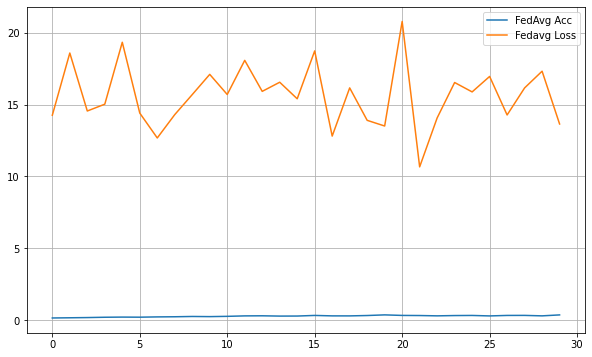

In [8]:
average_acc_list, average_loss_list = [], []

for i in range(1,31):
    tmp_a, tmp_l = 0, 0
    for j in range(num):
        tmp_a = tmp_a + np.mean(globals()['acc{}'.format(j)][i])
        tmp_l = tmp_l + np.mean(globals()['loss{}'.format(j)][i])    
        
    average_acc_list.append(tmp_a/num)
    average_loss_list.append(tmp_l/num)   
    
plt.figure(figsize=(10,6))
plt.plot(average_acc_list, label='FedAvg Acc')
plt.plot(average_loss_list, label='Fedavg Loss')

plt.grid(True)
plt.legend()
plt.show()

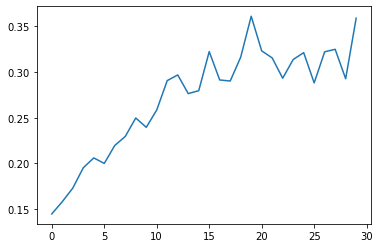

In [9]:
plt.plot(average_acc_list, label='FedAvg Acc')
plt.show()

In [10]:
print(average_acc_list,'\n') 
print(average_loss_list)

[0.14498444514142142, 0.15832889013820226, 0.17312333409984904, 0.19534000058968862, 0.20608555500706038, 0.200066666967339, 0.21968333356910283, 0.22949444651603698, 0.24967000219557023, 0.23946222182777196, 0.2584155575268799, 0.29045222451289493, 0.2966055570377244, 0.27626222264435557, 0.27943666875362394, 0.3220866682628791, 0.29114000126719475, 0.2899788917766677, 0.31603444541494047, 0.3606666680011485, 0.32286777926815885, 0.3151677788959609, 0.29304000130958024, 0.3134233353038629, 0.32096333255370463, 0.2879544465078248, 0.3218855566448635, 0.32459889029463135, 0.2924611139628623, 0.35854111032353514] 

[14.265902794731987, 18.60015634695689, 14.561993622779847, 15.035910307036504, 19.34885209666358, 14.416486605008444, 12.683283713128832, 14.310754210419125, 15.705197470717962, 17.11290962960985, 15.711490213871002, 18.09017527103424, 15.929574520058102, 16.565057590934966, 15.412423992819257, 18.746787780523302, 12.814609791835148, 16.17100990878211, 13.911306739515728, 13.

# Our Algorithm

In [11]:
acc0 = [[], [0.6050999760627747, 0.6498000025749207, 0.5134999752044678, 0.48739999532699585, 0.5698999762535095, 0.5148000121116638, 0.5170999765396118, 0.5512999892234802, 0.5860999822616577, 0.4887999892234802, 0.5866000056266785, 0.5389999747276306, 0.5792999863624573, 0.5428000092506409, 0.51419997215271, 0.52920001745224, 0.5256999731063843, 0.5497999787330627, 0.5508999824523926, 0.5134999752044678, 0.3955000042915344, 0.5835999846458435, 0.5724999904632568, 0.621399998664856, 0.4894999861717224, 0.41929998993873596, 0.4442000091075897, 0.4871000051498413, 0.4805999994277954, 0.38190001249313354], [0.6589999794960022, 0.6025999784469604, 0.6678000092506409, 0.6333000063896179, 0.6496999859809875, 0.6238999962806702, 0.6531999707221985, 0.6453999876976013, 0.5633999705314636, 0.6424000263214111, 0.6204000115394592, 0.5447999835014343, 0.6074000000953674, 0.586899995803833, 0.6726999878883362, 0.6728000044822693, 0.5202999711036682, 0.5989000201225281, 0.6589999794960022, 0.5990999937057495, 0.5932000279426575, 0.5627999901771545, 0.6557999849319458, 0.6238999962806702, 0.49380001425743103, 0.6467000246047974, 0.6486999988555908, 0.6323000192642212, 0.6190000176429749, 0.6035000085830688], [0.6137999892234802, 0.6568999886512756, 0.6062999963760376, 0.6769999861717224, 0.701200008392334, 0.6029999852180481, 0.6504999995231628, 0.6858000159263611, 0.6277999877929688, 0.6158999800682068, 0.5375999808311462, 0.6503000259399414, 0.6518999934196472, 0.6420999765396118, 0.6525999903678894, 0.6952000260353088, 0.7019000053405762, 0.633400022983551, 0.6377999782562256, 0.6757000088691711, 0.6455000042915344, 0.5946999788284302, 0.5013999938964844, 0.638700008392334, 0.6500999927520752, 0.636900007724762, 0.6453999876976013, 0.638700008392334, 0.6762999892234802, 0.6865000128746033], [0.6822999715805054, 0.7179999947547913, 0.6809999942779541, 0.6367999911308289, 0.6571000218391418, 0.6435999870300293, 0.6682000160217285, 0.6888999938964844, 0.6759999990463257, 0.6491000056266785, 0.6973000168800354, 0.7063999772071838, 0.6739000082015991, 0.6934999823570251, 0.6725000143051147, 0.6273000240325928, 0.7003999948501587, 0.6715999841690063, 0.6818000078201294, 0.6761000156402588, 0.6496000289916992, 0.6579999923706055, 0.6280999779701233, 0.7092000246047974, 0.6621000170707703, 0.7092999815940857, 0.7002999782562256, 0.7096999883651733, 0.675599992275238, 0.6536999940872192], [0.6055999994277954, 0.7052000164985657, 0.6974999904632568, 0.652999997138977, 0.6110000014305115, 0.6322000026702881, 0.6603000164031982, 0.6852999925613403, 0.671500027179718, 0.6571999788284302, 0.6880000233650208, 0.6873000264167786, 0.7009000182151794, 0.6990000009536743, 0.6775000095367432, 0.6705999970436096, 0.6873000264167786, 0.7110000252723694, 0.637499988079071, 0.7081999778747559, 0.6829000115394592, 0.6941999793052673, 0.6881999969482422, 0.6952999830245972, 0.6299999952316284, 0.6822999715805054, 0.647599995136261, 0.6305000185966492, 0.6492000222206116, 0.6776999831199646], [0.5902000069618225, 0.7213000059127808, 0.6966999769210815, 0.6973000168800354, 0.6585000157356262, 0.6643999814987183, 0.6308000087738037, 0.6284999847412109, 0.6980000138282776, 0.6879000067710876, 0.6779999732971191, 0.6866000294685364, 0.7092000246047974, 0.6919999718666077, 0.6618000268936157, 0.6772000193595886, 0.7013000249862671, 0.7125999927520752, 0.6254000067710876, 0.6674000024795532, 0.6690000295639038, 0.6434999704360962, 0.7276999950408936, 0.6669999957084656, 0.7134000062942505, 0.6761000156402588, 0.694100022315979, 0.7141000032424927, 0.6960999965667725, 0.7337999939918518], [0.6761999726295471, 0.7203999757766724, 0.6988999843597412, 0.6880999803543091, 0.7249000072479248, 0.7128999829292297, 0.7192999720573425, 0.6309999823570251, 0.7433000206947327, 0.7056000232696533, 0.625, 0.7019000053405762, 0.7289999723434448, 0.7340999841690063, 0.6628000140190125, 0.7023000121116638, 0.6970999836921692, 0.6480000019073486, 0.6815999746322632, 0.7042999863624573, 0.7002000212669373, 0.6959999799728394, 0.7305999994277954, 0.7186999917030334, 0.679099977016449, 0.7107999920845032, 0.7166000008583069, 0.6468999981880188, 0.7143999934196472, 0.7376000285148621], [0.6769999861717224, 0.6740999817848206, 0.7056999802589417, 0.6098999977111816, 0.7110000252723694, 0.7325999736785889, 0.6603000164031982, 0.6739000082015991, 0.7102000117301941, 0.7111999988555908, 0.6793000102043152, 0.7207000255584717, 0.7240999937057495, 0.751800000667572, 0.6723999977111816, 0.7143999934196472, 0.7400000095367432, 0.6761000156402588, 0.6996999979019165, 0.7285000085830688, 0.698199987411499, 0.7135999798774719, 0.7286999821662903, 0.7355999946594238, 0.6948000192642212, 0.6500999927520752, 0.7448999881744385, 0.7193999886512756, 0.7419000267982483, 0.705299973487854], [0.7071999907493591, 0.7046999931335449, 0.7416999936103821, 0.760699987411499, 0.7450000047683716, 0.7150999903678894, 0.7210000157356262, 0.6671000123023987, 0.6597999930381775, 0.7087000012397766, 0.7067000269889832, 0.7505000233650208, 0.7214999794960022, 0.7271000146865845, 0.6970000267028809, 0.7196999788284302, 0.748199999332428, 0.7123000025749207, 0.7387999892234802, 0.7166000008583069, 0.7196000218391418, 0.6565999984741211, 0.708299994468689, 0.722100019454956, 0.7009000182151794, 0.6797999739646912, 0.6728000044822693, 0.6784999966621399, 0.7347999811172485, 0.7379000186920166], [0.7124000191688538, 0.7163000106811523, 0.7372000217437744, 0.7368000149726868, 0.7494000196456909, 0.7075999975204468, 0.7067000269889832, 0.7396000027656555, 0.7311999797821045, 0.6974999904632568, 0.7343999743461609, 0.7401000261306763, 0.7107999920845032, 0.7447999715805054, 0.7073000073432922, 0.7386000156402588, 0.7601000070571899, 0.7595000267028809, 0.7164000272750854, 0.7502999901771545, 0.7511000037193298, 0.725600004196167, 0.7214000225067139, 0.699400007724762, 0.7508999705314636, 0.7172999978065491, 0.7434999942779541, 0.7296000123023987, 0.6948999762535095, 0.6693999767303467], [0.6704000234603882, 0.7218999862670898, 0.7443000078201294, 0.7240999937057495, 0.7398999929428101, 0.7020999789237976, 0.6972000002861023, 0.7480999827384949, 0.7458000183105469, 0.7020999789237976, 0.7113000154495239, 0.7071999907493591, 0.7296000123023987, 0.7439000010490417, 0.7181000113487244, 0.7512999773025513, 0.7167999744415283, 0.6983000040054321, 0.7537999749183655, 0.7422000169754028, 0.72079998254776, 0.7501000165939331, 0.6486999988555908, 0.7386000156402588, 0.7182999849319458, 0.7199000120162964, 0.7506999969482422, 0.6919000148773193, 0.7189000248908997, 0.7181000113487244], [0.7182999849319458, 0.7207000255584717, 0.7124999761581421, 0.6923999786376953, 0.7678999900817871, 0.7002000212669373, 0.7296000123023987, 0.7269999980926514, 0.7243000268936157, 0.7226999998092651, 0.7164999842643738, 0.7063999772071838, 0.7285000085830688, 0.7430999875068665, 0.7601000070571899, 0.6909000277519226, 0.7296000123023987, 0.734499990940094, 0.7039999961853027, 0.7645999789237976, 0.7573999762535095, 0.7253000140190125, 0.7538999915122986, 0.7156999707221985, 0.7731000185012817, 0.7494000196456909, 0.7321000099182129, 0.7459999918937683, 0.7254999876022339, 0.7415000200271606], [0.6861000061035156, 0.7414000034332275, 0.753000020980835, 0.6978999972343445, 0.7289000153541565, 0.6902999877929688, 0.7245000004768372, 0.7573999762535095, 0.7360000014305115, 0.7667999863624573, 0.7573999762535095, 0.7373999953269958, 0.7347999811172485, 0.6470000147819519, 0.713100016117096, 0.7146000266075134, 0.7462999820709229, 0.7055000066757202, 0.7412999868392944, 0.732699990272522, 0.7379000186920166, 0.7160000205039978, 0.7089999914169312, 0.76910001039505, 0.7379999756813049, 0.7590000033378601, 0.7741000056266785, 0.7166000008583069, 0.7605999708175659, 0.7102000117301941], [0.7702000141143799, 0.7208999991416931, 0.7160999774932861, 0.7455000281333923, 0.737500011920929, 0.727400004863739, 0.7031000256538391, 0.7576000094413757, 0.7651000022888184, 0.7480999827384949, 0.7670999765396118, 0.7462000250816345, 0.7002000212669373, 0.7603999972343445, 0.7197999954223633, 0.7264999747276306, 0.7748000025749207, 0.7641000151634216, 0.7143999934196472, 0.7638999819755554, 0.7479000091552734, 0.7508999705314636, 0.7465000152587891, 0.7190999984741211, 0.7311000227928162, 0.776199996471405, 0.7473000288009644, 0.7497000098228455, 0.7523999810218811, 0.7483999729156494], [0.722000002861023, 0.7458999752998352, 0.7425000071525574, 0.7612000107765198, 0.7577999830245972, 0.7876999974250793, 0.7486000061035156, 0.7666000127792358, 0.6888999938964844, 0.7124000191688538, 0.7245000004768372, 0.7143999934196472, 0.7028999924659729, 0.7595999836921692, 0.7554000020027161, 0.7890999913215637, 0.7552000284194946, 0.7878999710083008, 0.7307000160217285, 0.7236999869346619, 0.7167999744415283, 0.7506999969482422, 0.7660999894142151, 0.767300009727478, 0.7580999732017517, 0.7283999919891357, 0.7541000247001648, 0.763700008392334, 0.7483000159263611, 0.7325000166893005], [0.774399995803833, 0.7439000010490417, 0.774399995803833, 0.7336000204086304, 0.7669000029563904, 0.7493000030517578, 0.7594000101089478, 0.7329999804496765, 0.7735999822616577, 0.7578999996185303, 0.7742000222206116, 0.7799000144004822, 0.7343999743461609, 0.7754999995231628, 0.6880000233650208, 0.7610999941825867, 0.7583000063896179, 0.7487000226974487, 0.7652999758720398, 0.7569000124931335, 0.7221999764442444, 0.7730000019073486, 0.6988000273704529, 0.7487999796867371, 0.7687000036239624, 0.7678999900817871, 0.7759000062942505, 0.7646999955177307, 0.7567999958992004, 0.7653999924659729], [0.7516999840736389, 0.767300009727478, 0.7660999894142151, 0.7547000050544739, 0.7099999785423279, 0.7858999967575073, 0.7480000257492065, 0.7032999992370605, 0.711899995803833, 0.7577000260353088, 0.6963000297546387, 0.7763000130653381, 0.722000002861023, 0.7660999894142151, 0.7623000144958496, 0.6930999755859375, 0.7452999949455261, 0.7706999778747559, 0.7875999808311462, 0.7774999737739563, 0.7809000015258789, 0.7652999758720398, 0.7067000269889832, 0.7706000208854675, 0.7278000116348267, 0.7340999841690063, 0.7694000005722046, 0.6987000107765198, 0.758400022983551, 0.7590000033378601], [0.7674999833106995, 0.7562000155448914, 0.7462000250816345, 0.7954000234603882, 0.690500020980835, 0.7639999985694885, 0.733299970626831, 0.7498999834060669, 0.7764999866485596, 0.7598000168800354, 0.7336999773979187, 0.770799994468689, 0.7394000291824341, 0.7663999795913696, 0.7347999811172485, 0.7799000144004822, 0.801800012588501, 0.746999979019165, 0.736299991607666, 0.736299991607666, 0.7038000226020813, 0.7038999795913696, 0.7702999711036682, 0.7317000031471252, 0.7820000052452087, 0.7692000269889832, 0.7555999755859375, 0.7785999774932861, 0.7775999903678894, 0.7602999806404114], [0.7357000112533569, 0.734000027179718, 0.7235999703407288, 0.7846999764442444, 0.7662000060081482, 0.7552000284194946, 0.730400025844574, 0.7355999946594238, 0.7304999828338623, 0.7578999996185303, 0.7387999892234802, 0.7940999865531921, 0.7347000241279602, 0.742900013923645, 0.7573000192642212, 0.7788000106811523, 0.7397000193595886, 0.7103999853134155, 0.7924000024795532, 0.722100019454956, 0.7615000009536743, 0.7804999947547913, 0.781000018119812, 0.794700026512146, 0.7350000143051147, 0.79339998960495, 0.7555999755859375, 0.7398999929428101, 0.7653999924659729, 0.8036999702453613], [0.7864999771118164, 0.7795000076293945, 0.7472000122070312, 0.792900025844574, 0.765500009059906, 0.769599974155426, 0.7440000176429749, 0.7901999950408936, 0.7638999819755554, 0.7777000069618225, 0.7638000249862671, 0.7921000123023987, 0.7124000191688538, 0.7821000218391418, 0.7738000154495239, 0.7815999984741211, 0.7716000080108643, 0.7664999961853027, 0.7634000182151794, 0.7523999810218811, 0.7620000243186951, 0.7350000143051147, 0.746399998664856, 0.7114999890327454, 0.7145000100135803, 0.8021000027656555, 0.7278000116348267, 0.7732999920845032, 0.7656999826431274, 0.77920001745224], [0.8131999969482422, 0.7803999781608582, 0.8044000267982483, 0.7541999816894531, 0.7734000086784363, 0.7799999713897705, 0.7601000070571899, 0.7519000172615051, 0.7462999820709229, 0.7357000112533569, 0.7828999757766724, 0.7749000191688538, 0.7376999855041504, 0.7853000164031982, 0.771399974822998, 0.7949000000953674, 0.7766000032424927, 0.7870000004768372, 0.7750999927520752, 0.7735000252723694, 0.7475000023841858, 0.7771999835968018, 0.7523999810218811, 0.7774999737739563, 0.796500027179718, 0.7860000133514404, 0.7789000272750854, 0.7192000150680542, 0.7914999723434448, 0.7651000022888184], [0.7775999903678894, 0.7768999934196472, 0.8037999868392944, 0.7662000060081482, 0.79339998960495, 0.7642999887466431, 0.73089998960495, 0.7188000082969666, 0.7414000034332275, 0.7864999771118164, 0.7307000160217285, 0.7811999917030334, 0.7513999938964844, 0.7666000127792358, 0.7555000185966492, 0.7627000212669373, 0.7605000138282776, 0.8064000010490417, 0.794700026512146, 0.758899986743927, 0.7576000094413757, 0.7817000150680542, 0.7483999729156494, 0.7796000242233276, 0.7315999865531921, 0.7297999858856201, 0.7652999758720398, 0.6937000155448914, 0.7922999858856201, 0.7702000141143799], [0.7818999886512756, 0.7924000024795532, 0.7768999934196472, 0.7506999969482422, 0.7300999760627747, 0.7560999989509583, 0.807699978351593, 0.7870000004768372, 0.7310000061988831, 0.8019999861717224, 0.8109999895095825, 0.7627000212669373, 0.7875000238418579, 0.7912999987602234, 0.7979999780654907, 0.7748000025749207, 0.7797999978065491, 0.7702000141143799, 0.7784000039100647, 0.7727000117301941, 0.7771000266075134, 0.7613999843597412, 0.7281000018119812, 0.7663999795913696, 0.795799970626831, 0.7979000210762024, 0.7494999766349792, 0.7932999730110168, 0.7577999830245972, 0.7450000047683716], [0.7516999840736389, 0.7958999872207642, 0.754800021648407, 0.7516999840736389, 0.7932999730110168, 0.7978000044822693, 0.7903000116348267, 0.7731000185012817, 0.7921000123023987, 0.7537999749183655, 0.761900007724762, 0.7455000281333923, 0.760699987411499, 0.7860000133514404, 0.7421000003814697, 0.7928000092506409, 0.7893999814987183, 0.7595999836921692, 0.7608000040054321, 0.8116999864578247, 0.8015000224113464, 0.766700029373169, 0.7422000169754028, 0.7613999843597412, 0.7257999777793884, 0.815500020980835, 0.794700026512146, 0.7734000086784363, 0.7804999947547913, 0.7710000276565552], [0.7613999843597412, 0.7626000046730042, 0.7867000102996826, 0.8263999819755554, 0.775600016117096, 0.7735000252723694, 0.7501000165939331, 0.7311999797821045, 0.8105000257492065, 0.7854999899864197, 0.7653999924659729, 0.7720000147819519, 0.7544999718666077, 0.7501000165939331, 0.767799973487854, 0.7932000160217285, 0.7850000262260437, 0.7864000201225281, 0.7572000026702881, 0.7692999839782715, 0.7639999985694885, 0.7735999822616577, 0.7470999956130981, 0.7753000259399414, 0.7930999994277954, 0.8234000205993652, 0.7609000205993652, 0.7563999891281128, 0.7666000127792358, 0.7422999739646912], [0.7376000285148621, 0.7348999977111816, 0.7871000170707703, 0.7738999724388123, 0.7806000113487244, 0.7656999826431274, 0.7731999754905701, 0.7236999869346619, 0.7828999757766724, 0.7684999704360962, 0.6567000150680542, 0.7490000128746033, 0.7228999733924866, 0.7843000292778015, 0.7656000256538391, 0.7578999996185303, 0.7361999750137329, 0.7581999897956848, 0.7828999757766724, 0.7922000288963318, 0.8156999945640564, 0.7570000290870667, 0.7538999915122986, 0.8025000095367432, 0.8057000041007996, 0.7864999771118164, 0.8148999810218811, 0.7671999931335449, 0.795799970626831, 0.7620999813079834], [0.7185999751091003, 0.7559999823570251, 0.7851999998092651, 0.7983999848365784, 0.8015000224113464, 0.7717000246047974, 0.7918999791145325, 0.7523000240325928, 0.7524999976158142, 0.7095999717712402, 0.7767000198364258, 0.8047999739646912, 0.7831000089645386, 0.7472000122070312, 0.7775999903678894, 0.7519000172615051, 0.7861999869346619, 0.7990999817848206, 0.7634999752044678, 0.7759000062942505, 0.7555999755859375, 0.8105000257492065, 0.7576000094413757, 0.7570000290870667, 0.8159000277519226, 0.8105000257492065, 0.7706000208854675, 0.757099986076355, 0.7803000211715698, 0.7928000092506409], [0.7662000060081482, 0.7940000295639038, 0.7714999914169312, 0.7839000225067139, 0.8014000058174133, 0.7835000157356262, 0.7016000151634216, 0.7930999994277954, 0.8012999892234802, 0.7853999733924866, 0.7401999831199646, 0.7822999954223633, 0.7260000109672546, 0.7784000039100647, 0.7387999892234802, 0.7609999775886536, 0.8012999892234802, 0.7885000109672546, 0.8076000213623047, 0.8025000095367432, 0.7432000041007996, 0.7069000005722046, 0.7502999901771545, 0.8144999742507935, 0.7712000012397766, 0.7928000092506409, 0.8069000244140625, 0.7547000050544739, 0.781000018119812, 0.7444999814033508], [0.7200999855995178, 0.7630000114440918, 0.7919999957084656, 0.8008999824523926, 0.8080000281333923, 0.7784000039100647, 0.7897999882698059, 0.7930999994277954, 0.79830002784729, 0.7670000195503235, 0.7462999820709229, 0.7509999871253967, 0.7882000207901001, 0.7444999814033508, 0.776199996471405, 0.7656999826431274, 0.8167999982833862, 0.7975000143051147, 0.8069999814033508, 0.7811999917030334, 0.7694000005722046, 0.7121000289916992, 0.7246000170707703, 0.7757999897003174, 0.7767000198364258, 0.7305999994277954, 0.7422999739646912, 0.6464999914169312, 0.7786999940872192, 0.8007000088691711], [0.8032000064849854, 0.7660999894142151, 0.810699999332428, 0.7759000062942505, 0.7890999913215637, 0.8016999959945679, 0.8251000046730042, 0.7840999960899353, 0.8040000200271606, 0.7421000003814697, 0.8019000291824341, 0.7903000116348267, 0.7976999878883362, 0.7942000031471252, 0.7782999873161316, 0.8048999905586243, 0.7569000124931335, 0.795199990272522, 0.791700005531311, 0.8077999949455261, 0.808899998664856, 0.7695000171661377, 0.7408000230789185, 0.7922000288963318, 0.7803999781608582, 0.7943000197410583, 0.7886000275611877, 0.7554000020027161, 0.7785000205039978, 0.777999997138977]]
loss0 = [[], [1.4077152013778687, 1.4078456163406372, 1.571419596672058, 2.2255661487579346, 1.8817291259765625, 1.3145489692687988, 1.803204894065857, 1.1848477125167847, 1.7173959016799927, 1.358303189277649, 1.9207442998886108, 1.3197358846664429, 1.0885740518569946, 1.7754625082015991, 1.628401517868042, 1.7286654710769653, 1.70675528049469, 1.6432719230651855, 1.7922261953353882, 1.1902368068695068, 2.1104884147644043, 2.735602617263794, 1.1755567789077759, 1.1736305952072144, 1.9095960855484009, 1.5801315307617188, 1.658078670501709, 1.5819813013076782, 1.4280203580856323, 1.7456687688827515], [1.2071106433868408, 1.079351544380188, 1.1974533796310425, 1.046000361442566, 1.3382999897003174, 1.549869418144226, 1.2443571090698242, 1.0712090730667114, 2.0713634490966797, 1.0201340913772583, 1.6369621753692627, 1.4410501718521118, 1.6379190683364868, 1.148024559020996, 0.9738407135009766, 1.2816569805145264, 1.4403752088546753, 1.465701699256897, 1.0496013164520264, 1.11619234085083, 1.533523678779602, 1.3379528522491455, 1.2512301206588745, 1.1886183023452759, 1.3142683506011963, 1.1798858642578125, 1.0133426189422607, 1.1183096170425415, 1.3764170408248901, 1.2667219638824463], [1.2709262371063232, 1.6782675981521606, 1.5443789958953857, 1.169390320777893, 1.0099691152572632, 0.9694659113883972, 1.3484156131744385, 1.3538130521774292, 1.7404650449752808, 1.3987445831298828, 1.3901727199554443, 1.2007015943527222, 1.1950535774230957, 1.1937700510025024, 1.1119412183761597, 0.9217472672462463, 1.1679636240005493, 1.3938051462173462, 1.3587974309921265, 1.0288282632827759, 1.3683708906173706, 1.2839469909667969, 2.555370330810547, 1.4650938510894775, 1.0395441055297852, 1.1144646406173706, 1.9565041065216064, 1.2202433347702026, 1.059893250465393, 1.0322418212890625], [0.9905151128768921, 1.0909442901611328, 1.0549579858779907, 1.2299449443817139, 1.428214430809021, 1.4871653318405151, 1.1355934143066406, 1.3107587099075317, 1.8878257274627686, 1.3667980432510376, 1.322247862815857, 1.2029350996017456, 1.5820908546447754, 1.2974845170974731, 1.0783421993255615, 1.1945141553878784, 1.2376668453216553, 1.2366877794265747, 1.10679030418396, 1.3053160905838013, 1.358532190322876, 1.2809350490570068, 1.1976600885391235, 1.321873664855957, 1.7502025365829468, 0.9413090944290161, 1.4467432498931885, 1.0214862823486328, 1.1259530782699585, 1.5739398002624512], [1.314543604850769, 1.4549713134765625, 1.1102641820907593, 1.4379991292953491, 1.2414629459381104, 2.6145520210266113, 1.6640197038650513, 1.0685466527938843, 1.2404884099960327, 1.479943037033081, 1.02838933467865, 1.0815939903259277, 1.0825872421264648, 1.0653960704803467, 1.1932045221328735, 1.4616793394088745, 1.22938072681427, 0.9397980570793152, 1.4416966438293457, 1.1523337364196777, 1.5915433168411255, 1.2619400024414062, 1.4783095121383667, 1.167556881904602, 1.9331605434417725, 1.2829996347427368, 2.5152828693389893, 1.437636137008667, 2.201172113418579, 1.3563501834869385], [1.639678716659546, 1.1184186935424805, 1.5101723670959473, 1.2073675394058228, 1.68441641330719, 1.2890912294387817, 1.444909691810608, 1.6424236297607422, 1.3393232822418213, 1.4193347692489624, 1.1456695795059204, 2.0140836238861084, 1.3292821645736694, 1.4800660610198975, 1.8241437673568726, 1.3559038639068604, 1.2032510042190552, 1.1235814094543457, 2.649965286254883, 1.3029441833496094, 1.2192878723144531, 1.2681630849838257, 1.1541213989257812, 1.5171631574630737, 1.0910145044326782, 1.0664945840835571, 1.4653518199920654, 1.0066521167755127, 1.1388978958129883, 1.328279972076416], [1.2480093240737915, 1.7855337858200073, 1.16716468334198, 1.4349099397659302, 1.3563398122787476, 1.3857539892196655, 1.3349871635437012, 1.1960349082946777, 0.8426885008811951, 1.0427873134613037, 1.9403603076934814, 1.5502046346664429, 1.1170518398284912, 1.1204841136932373, 1.291595458984375, 1.0878239870071411, 1.5035091638565063, 1.621651530265808, 1.230823278427124, 1.2698285579681396, 1.1870145797729492, 1.578067660331726, 1.0545454025268555, 0.975013792514801, 1.370710015296936, 0.9751331806182861, 1.209638237953186, 1.570515751838684, 1.1489967107772827, 1.5504546165466309], [1.6338287591934204, 1.2821301221847534, 1.037358045578003, 2.5664782524108887, 1.3161293268203735, 1.0023157596588135, 1.219786286354065, 1.5317537784576416, 1.3419382572174072, 1.4310518503189087, 2.0036680698394775, 1.0832258462905884, 1.2408279180526733, 1.351426601409912, 1.3601216077804565, 1.2444578409194946, 1.067702293395996, 1.6119990348815918, 1.5110876560211182, 0.9254512786865234, 1.3587664365768433, 1.1617194414138794, 1.8095899820327759, 1.1036767959594727, 1.3721823692321777, 2.0400867462158203, 1.014307975769043, 0.8531304001808167, 1.0329713821411133, 1.2441009283065796], [2.075667381286621, 1.1750283241271973, 1.214870810508728, 0.8904581069946289, 1.15193510055542, 0.9412564635276794, 1.008121371269226, 1.237546443939209, 1.3768662214279175, 1.939247488975525, 1.0192683935165405, 1.0954748392105103, 1.020477533340454, 1.2077624797821045, 1.8224824666976929, 1.2773813009262085, 1.2220979928970337, 1.3072776794433594, 1.5070348978042603, 1.110924482345581, 1.2504053115844727, 1.9332326650619507, 1.3155690431594849, 1.4047526121139526, 1.4373509883880615, 1.075735330581665, 1.5014448165893555, 1.7351429462432861, 1.1883429288864136, 0.9860073924064636], [1.1260162591934204, 1.1072373390197754, 0.9696682691574097, 1.1571577787399292, 1.2182350158691406, 1.0828312635421753, 1.342278003692627, 0.8419373035430908, 1.1537424325942993, 1.5287196636199951, 0.8084995746612549, 0.9894565343856812, 0.9902678728103638, 1.2547423839569092, 1.0690739154815674, 1.0263221263885498, 0.8554156422615051, 0.9280543923377991, 0.9606125950813293, 0.8912459015846252, 1.2082332372665405, 1.1110459566116333, 1.121743083000183, 1.237513542175293, 1.415954828262329, 2.110391139984131, 1.0236234664916992, 1.046801209449768, 1.4451961517333984, 2.608135223388672], [1.5871633291244507, 1.0725170373916626, 1.6859556436538696, 1.5798709392547607, 1.2561744451522827, 1.3843331336975098, 1.8537300825119019, 1.0430642366409302, 1.296855092048645, 1.1041821241378784, 1.6463207006454468, 1.6138808727264404, 1.4132379293441772, 1.294049620628357, 1.5093222856521606, 0.9215768575668335, 1.1388760805130005, 2.2447125911712646, 1.2672497034072876, 1.1259373426437378, 1.0817397832870483, 0.9378333687782288, 1.5828070640563965, 1.5465166568756104, 1.4296534061431885, 1.2771495580673218, 0.9272745251655579, 1.2933579683303833, 1.2543854713439941, 1.209786295890808], [1.546297311782837, 1.7207775115966797, 1.2935649156570435, 2.050581932067871, 0.9700103402137756, 1.355406641960144, 1.0253137350082397, 1.6060034036636353, 1.1183674335479736, 1.1078990697860718, 1.0194849967956543, 1.468574047088623, 1.0816603899002075, 1.260955810546875, 1.3228870630264282, 1.221102237701416, 1.3036689758300781, 1.0761650800704956, 1.174271583557129, 1.1642988920211792, 1.0710656642913818, 0.9296625256538391, 0.8811700344085693, 1.343263030052185, 1.1102161407470703, 0.8830286860466003, 1.410855770111084, 1.178953766822815, 1.5509294271469116, 0.836371660232544], [1.8131333589553833, 0.8312748074531555, 1.0413715839385986, 1.7387292385101318, 1.0734513998031616, 1.643502116203308, 1.2540833950042725, 0.9048275351524353, 1.1090576648712158, 1.1300424337387085, 1.633817434310913, 1.0680519342422485, 1.1369075775146484, 1.4806945323944092, 1.1516902446746826, 1.495927095413208, 0.8537028431892395, 1.459470510482788, 1.3727405071258545, 2.4426307678222656, 0.9451558589935303, 1.8657132387161255, 1.2554094791412354, 1.314141869544983, 0.8490279316902161, 0.9918987154960632, 0.8659533262252808, 1.2083165645599365, 0.8230822086334229, 1.4269894361495972], [1.0854942798614502, 1.2479603290557861, 1.217852234840393, 1.1449949741363525, 1.6584783792495728, 1.4513529539108276, 1.3649921417236328, 1.098116159439087, 0.8598455190658569, 1.302578091621399, 1.1847819089889526, 1.191552758216858, 1.6152489185333252, 1.673998475074768, 1.6724066734313965, 1.4540408849716187, 0.8557265400886536, 0.8608275651931763, 1.354173183441162, 0.9736570119857788, 1.1052623987197876, 1.2296669483184814, 1.169382095336914, 1.2865129709243774, 1.1663539409637451, 0.7253673672676086, 1.1422232389450073, 1.3155385255813599, 0.9751235246658325, 0.9091804623603821], [1.1304787397384644, 1.0624721050262451, 0.9501267671585083, 1.0787464380264282, 0.9582026600837708, 1.0351094007492065, 1.3758786916732788, 0.9675750732421875, 1.7169764041900635, 1.223872184753418, 1.2768466472625732, 1.4670861959457397, 1.0551426410675049, 1.1674095392227173, 1.0882947444915771, 0.9459627866744995, 1.184085726737976, 1.237955927848816, 1.0556784868240356, 1.3875151872634888, 1.4205487966537476, 1.144879698753357, 0.9333721399307251, 1.067854642868042, 0.9044952392578125, 1.1014758348464966, 1.4195618629455566, 0.9019281268119812, 1.3164180517196655, 1.0813407897949219], [1.2422477006912231, 1.0937292575836182, 1.06509530544281, 1.3818855285644531, 1.0944311618804932, 0.9457958936691284, 0.9816010594367981, 1.3383336067199707, 0.9406245946884155, 0.8843349814414978, 1.0991127490997314, 0.8379670977592468, 0.9834789037704468, 1.1111981868743896, 1.062737226486206, 1.2244497537612915, 1.302374005317688, 0.9797210097312927, 0.9832926988601685, 0.999034583568573, 1.7794336080551147, 1.0021315813064575, 1.2703601121902466, 1.2647026777267456, 1.119582176208496, 1.1288033723831177, 0.8587603569030762, 0.8519303798675537, 0.7956042289733887, 1.0990365743637085], [1.0551854372024536, 0.9895443320274353, 0.9669104218482971, 1.31125009059906, 1.7329530715942383, 0.8237236142158508, 1.2394109964370728, 1.8396192789077759, 1.0807901620864868, 0.9117752909660339, 1.6003295183181763, 0.9537709951400757, 1.3166582584381104, 1.0685522556304932, 1.056486964225769, 1.1865971088409424, 1.264593243598938, 0.9288135766983032, 0.9720064401626587, 0.8204944133758545, 1.322083592414856, 1.0536402463912964, 1.2215207815170288, 0.824661910533905, 1.0806043148040771, 1.507256269454956, 0.8769941329956055, 1.120759129524231, 1.0205100774765015, 1.1879863739013672], [2.185039520263672, 1.3082499504089355, 1.35305655002594, 0.8194021582603455, 1.5498814582824707, 0.7731898427009583, 1.1057993173599243, 1.5181550979614258, 1.1858904361724854, 1.2318578958511353, 1.7297112941741943, 0.9645797610282898, 1.1255520582199097, 0.9172171950340271, 1.4306739568710327, 0.8481197953224182, 1.047932505607605, 1.4645640850067139, 0.9900055527687073, 1.03545081615448, 1.5178948640823364, 1.4833433628082275, 0.8046878576278687, 1.0823345184326172, 1.134596824645996, 0.8608078956604004, 0.974294126033783, 1.0304608345031738, 0.9024783968925476, 0.8389332294464111], [1.422394871711731, 1.5827136039733887, 1.0850754976272583, 1.0626052618026733, 0.9374207854270935, 1.2059990167617798, 1.8204305171966553, 1.1365532875061035, 1.0095022916793823, 1.2745637893676758, 1.1670150756835938, 1.1136221885681152, 1.3565595149993896, 0.9319724440574646, 1.3352128267288208, 1.0985472202301025, 0.9800307750701904, 1.2929835319519043, 1.0260695219039917, 1.1967555284500122, 1.0482211112976074, 1.219036340713501, 1.06263267993927, 0.9031285047531128, 1.4971024990081787, 0.7957035899162292, 0.9628286957740784, 2.337123394012451, 1.09920334815979, 0.7236815094947815], [1.2085552215576172, 0.9215726852416992, 0.9347289204597473, 0.9750604629516602, 0.9986246824264526, 0.8908914923667908, 1.0889384746551514, 0.959399402141571, 0.9733609557151794, 0.851238489151001, 0.9920181632041931, 1.0090820789337158, 1.4477641582489014, 0.963943362236023, 0.9211673736572266, 1.1006053686141968, 0.9054720997810364, 1.310960292816162, 0.9247081279754639, 0.8120904564857483, 0.9751238226890564, 1.2062221765518188, 1.2642632722854614, 1.7322689294815063, 1.481542706489563, 0.7663838267326355, 1.2440705299377441, 1.2239406108856201, 0.7620932459831238, 0.7430675029754639], [0.8962200284004211, 1.07389235496521, 0.8246043920516968, 1.0218112468719482, 0.9306439161300659, 1.1402702331542969, 1.153937816619873, 1.4693859815597534, 1.156054973602295, 1.185951828956604, 0.9477340579032898, 0.9515663981437683, 1.970542550086975, 0.8043237328529358, 1.1546212434768677, 0.9444942474365234, 0.9583668112754822, 1.0939559936523438, 0.9789069294929504, 1.4142347574234009, 0.9786915183067322, 0.971111536026001, 1.2130898237228394, 1.0664266347885132, 0.9388401508331299, 0.9485495090484619, 1.4390016794204712, 1.2466108798980713, 0.8667492270469666, 1.1428273916244507], [0.9361642599105835, 1.0118616819381714, 1.015370488166809, 1.4044561386108398, 1.1699082851409912, 1.4741681814193726, 1.3716330528259277, 2.4694600105285645, 0.9480737447738647, 1.0047763586044312, 1.2449760437011719, 1.128481388092041, 1.44221830368042, 1.2195658683776855, 0.9956052899360657, 1.2702752351760864, 1.544840693473816, 1.1566392183303833, 0.8069465756416321, 1.2062857151031494, 0.7062619924545288, 0.8981651663780212, 1.1895489692687988, 0.8766568303108215, 1.003536581993103, 1.2869595289230347, 0.8614968061447144, 1.8482215404510498, 1.1695016622543335, 1.4061694145202637], [1.4344425201416016, 1.1596778631210327, 1.0482553243637085, 1.0171105861663818, 1.0735365152359009, 1.5882203578948975, 0.8688921928405762, 0.9669840931892395, 1.1993887424468994, 1.1143747568130493, 0.6237362027168274, 0.9067171812057495, 0.8249634504318237, 0.7813540101051331, 0.7441387176513672, 1.133782148361206, 1.4241626262664795, 1.2882039546966553, 1.295140266418457, 1.0337868928909302, 1.3005540370941162, 1.1262977123260498, 1.2306815385818481, 0.8755099773406982, 1.0233350992202759, 0.8816691637039185, 0.9624210000038147, 0.7787425518035889, 1.523733139038086, 1.044647455215454], [1.2014466524124146, 1.086335301399231, 1.2493369579315186, 1.1222440004348755, 0.9146387577056885, 1.1560338735580444, 0.8595911860466003, 1.3324971199035645, 1.1395748853683472, 1.380743384361267, 1.4463202953338623, 1.2886216640472412, 1.8339449167251587, 0.8465138673782349, 1.163329839706421, 1.0117725133895874, 1.3137927055358887, 1.0179283618927002, 1.073981523513794, 0.8544508814811707, 0.6908614039421082, 1.4362671375274658, 0.8916635513305664, 1.5433286428451538, 1.15938138961792, 0.7874561548233032, 0.7961402535438538, 0.7733941674232483, 0.8476723432540894, 1.710594892501831], [1.3833562135696411, 0.9329521656036377, 0.911750853061676, 0.6691004633903503, 0.9153347611427307, 1.1183825731277466, 1.6995271444320679, 1.8169267177581787, 0.7100065350532532, 0.9344732165336609, 1.1330082416534424, 1.1396023035049438, 0.9291354417800903, 1.1452598571777344, 1.262801170349121, 1.0345321893692017, 0.8794538974761963, 0.9854996800422668, 1.2030490636825562, 1.1621347665786743, 1.324205994606018, 1.4669920206069946, 0.9031032919883728, 0.9123008847236633, 1.2310817241668701, 0.6763176918029785, 1.6762644052505493, 1.0271341800689697, 1.3043348789215088, 0.9891014695167542], [1.4973565340042114, 1.5793501138687134, 0.8030064702033997, 1.0745940208435059, 1.3631207942962646, 0.9991695284843445, 1.0287346839904785, 1.3300997018814087, 0.8737459182739258, 0.8961783051490784, 2.1743040084838867, 1.2683316469192505, 1.5175491571426392, 1.2767417430877686, 1.289811134338379, 0.851140022277832, 1.3594213724136353, 1.189474105834961, 0.9781362414360046, 0.7630573511123657, 0.8835867047309875, 1.1516507863998413, 1.0330815315246582, 0.800299882888794, 0.9565736055374146, 0.7423579692840576, 0.7417691349983215, 1.5232751369476318, 0.7756118178367615, 1.3598990440368652], [1.447798490524292, 1.2950228452682495, 1.4429662227630615, 1.151253342628479, 0.7420220971107483, 1.1372424364089966, 0.7576778531074524, 1.0263469219207764, 1.30266535282135, 1.1608635187149048, 0.8002870082855225, 1.0456409454345703, 1.6643215417861938, 1.5275760889053345, 0.7981674075126648, 1.0539770126342773, 1.0119106769561768, 0.918327808380127, 0.8774027228355408, 1.0160640478134155, 2.1071295738220215, 0.7773208022117615, 1.1140189170837402, 0.9586251974105835, 0.6821783185005188, 0.9088338017463684, 0.9827929735183716, 1.4368559122085571, 1.1514533758163452, 1.1741949319839478], [1.304962396621704, 1.0954951047897339, 1.1778264045715332, 1.016479253768921, 1.0303184986114502, 0.8601908087730408, 2.6938419342041016, 1.0108795166015625, 1.1973788738250732, 0.7801517248153687, 1.1519442796707153, 0.9439946413040161, 1.554510235786438, 0.8535446524620056, 1.0510796308517456, 1.3536808490753174, 0.7439662218093872, 0.8239641785621643, 0.8301584720611572, 0.8744198083877563, 1.1559172868728638, 2.0924198627471924, 1.2477257251739502, 1.0884500741958618, 1.0805304050445557, 1.061478614807129, 0.7728182077407837, 1.1207022666931152, 1.291818380355835, 1.2508046627044678], [1.425621509552002, 1.1578093767166138, 0.7522910833358765, 0.9772098660469055, 0.7561810612678528, 0.9907824397087097, 1.6391295194625854, 0.8378912806510925, 1.0481098890304565, 1.3429075479507446, 1.6940072774887085, 1.614229679107666, 0.9005653262138367, 1.2188048362731934, 0.9606621265411377, 0.9644597768783569, 0.6513591408729553, 0.8641545176506042, 1.2579667568206787, 1.0817571878433228, 0.938138484954834, 1.5048046112060547, 1.3886017799377441, 1.165315866470337, 0.9360036849975586, 1.8267039060592651, 1.6415936946868896, 1.9030091762542725, 0.698615550994873, 0.876625657081604], [0.6471145749092102, 1.686201572418213, 0.7463275790214539, 1.276477336883545, 1.286898136138916, 0.864707887172699, 0.822145402431488, 0.7625851035118103, 0.7599297761917114, 1.1355643272399902, 0.8315336108207703, 1.1629290580749512, 0.9631314277648926, 0.8790019750595093, 1.0147576332092285, 0.715685248374939, 1.191036581993103, 0.8799322247505188, 0.8753911256790161, 0.7348995208740234, 0.9345769286155701, 1.0440114736557007, 1.4370956420898438, 0.8275547623634338, 1.3360090255737305, 0.9710108637809753, 1.24806547164917, 1.2921593189239502, 0.7372940182685852, 1.2020792961120605]] 

acc1 = [[], [0.3677000105381012, 0.3758000135421753, 0.5321000218391418, 0.5385000109672546, 0.4586000144481659, 0.6083999872207642, 0.4959000051021576, 0.4023999869823456, 0.4120999872684479, 0.504800021648407, 0.5782999992370605, 0.6466000080108643, 0.6564000248908997, 0.49059998989105225, 0.557699978351593, 0.6345999836921692, 0.4564000070095062, 0.5454999804496765, 0.5263000130653381, 0.5145000219345093, 0.6589999794960022, 0.6535000205039978, 0.6101999878883362, 0.7021999955177307, 0.6015999913215637, 0.3774000108242035, 0.44519999623298645, 0.5637000203132629, 0.4050000011920929, 0.4327000081539154], [0.5702999830245972, 0.4715999960899353, 0.6044999957084656, 0.5899999737739563, 0.6093000173568726, 0.6492000222206116, 0.5454000234603882, 0.638700008392334, 0.5546000003814697, 0.5041999816894531, 0.6381000280380249, 0.6294000148773193, 0.649399995803833, 0.6420999765396118, 0.5548999905586243, 0.5171999931335449, 0.5878000259399414, 0.6313999891281128, 0.5971999764442444, 0.6739000082015991, 0.6726999878883362, 0.5914000272750854, 0.6236000061035156, 0.5860000252723694, 0.579200029373169, 0.3312000036239624, 0.3109999895095825, 0.4869000017642975, 0.6287000179290771, 0.5895000100135803], [0.5936999917030334, 0.6761999726295471, 0.6507999897003174, 0.6209999918937683, 0.6861000061035156, 0.669700026512146, 0.6485999822616577, 0.5849999785423279, 0.6265000104904175, 0.6182000041007996, 0.6442000269889832, 0.6833000183105469, 0.6462000012397766, 0.6858000159263611, 0.6057999730110168, 0.6152999997138977, 0.6248999834060669, 0.5559999942779541, 0.6123999953269958, 0.609499990940094, 0.5879999995231628, 0.711899995803833, 0.6830000281333923, 0.6470999717712402, 0.6420999765396118, 0.5817000269889832, 0.6319000124931335, 0.66839998960495, 0.6442000269889832, 0.6582000255584717], [0.6819999814033508, 0.6276999711990356, 0.656000018119812, 0.6671000123023987, 0.6029999852180481, 0.6585999727249146, 0.7060999870300293, 0.7074000239372253, 0.7121000289916992, 0.6672000288963318, 0.6948999762535095, 0.6927000284194946, 0.6013000011444092, 0.7092999815940857, 0.6747000217437744, 0.6528000235557556, 0.6539000272750854, 0.7105000019073486, 0.49309998750686646, 0.6276999711990356, 0.6747000217437744, 0.6761000156402588, 0.631600022315979, 0.6697999835014343, 0.6714000105857849, 0.6586999893188477, 0.6123999953269958, 0.5623999834060669, 0.5932999849319458, 0.6844000220298767], [0.6305999755859375, 0.7138000130653381, 0.6958000063896179, 0.65420001745224, 0.6952000260353088, 0.6568999886512756, 0.6897000074386597, 0.7057999968528748, 0.7017999887466431, 0.7148000001907349, 0.7178000211715698, 0.7166000008583069, 0.6485000252723694, 0.7171000242233276, 0.6298999786376953, 0.6775000095367432, 0.6797000169754028, 0.7045000195503235, 0.6732000112533569, 0.6965000033378601, 0.7128000259399414, 0.7050999999046326, 0.6229000091552734, 0.6353999972343445, 0.6985999941825867, 0.7046999931335449, 0.6431999802589417, 0.5378000140190125, 0.6711999773979187, 0.6180999875068665], [0.708299994468689, 0.6876000165939331, 0.7010999917984009, 0.718999981880188, 0.6869000196456909, 0.6967999935150146, 0.6891999840736389, 0.6832000017166138, 0.7138000130653381, 0.6759999990463257, 0.7172999978065491, 0.7063999772071838, 0.6126999855041504, 0.6453999876976013, 0.6398000121116638, 0.6571999788284302, 0.6858999729156494, 0.6904000043869019, 0.7329999804496765, 0.7325000166893005, 0.6753000020980835, 0.6715999841690063, 0.659500002861023, 0.7303000092506409, 0.7085999846458435, 0.6330999732017517, 0.6017000079154968, 0.7123000025749207, 0.6776999831199646, 0.642799973487854], [0.7109000086784363, 0.6110000014305115, 0.6218000054359436, 0.692300021648407, 0.6829000115394592, 0.7031999826431274, 0.683899998664856, 0.7339000105857849, 0.6399000287055969, 0.6748999953269958, 0.6988000273704529, 0.6491000056266785, 0.7294999957084656, 0.641700029373169, 0.6811000108718872, 0.6380000114440918, 0.6913999915122986, 0.6692000031471252, 0.6686999797821045, 0.7264000177383423, 0.7278000116348267, 0.6801999807357788, 0.6626999974250793, 0.5866000056266785, 0.7121999859809875, 0.6628000140190125, 0.7179999947547913, 0.659600019454956, 0.7143999934196472, 0.6541000008583069], [0.6552000045776367, 0.6620000004768372, 0.7232000231742859, 0.7027000188827515, 0.7032999992370605, 0.6966999769210815, 0.7281000018119812, 0.6876999735832214, 0.7135000228881836, 0.6480000019073486, 0.7188000082969666, 0.6906999945640564, 0.6279000043869019, 0.6744999885559082, 0.7228999733924866, 0.744700014591217, 0.7116000056266785, 0.6764000058174133, 0.6898999810218811, 0.6503000259399414, 0.7106999754905701, 0.7042999863624573, 0.6956999897956848, 0.6474999785423279, 0.734000027179718, 0.6352999806404114, 0.6927000284194946, 0.7193999886512756, 0.6909000277519226, 0.6863999962806702], [0.7329999804496765, 0.7451000213623047, 0.7116000056266785, 0.7228000164031982, 0.7228999733924866, 0.6884999871253967, 0.6359000205993652, 0.722100019454956, 0.689300000667572, 0.736299991607666, 0.7347999811172485, 0.7139999866485596, 0.7462000250816345, 0.6772000193595886, 0.6855000257492065, 0.6929000020027161, 0.7174999713897705, 0.6834999918937683, 0.7221999764442444, 0.7027999758720398, 0.7046999931335449, 0.7450000047683716, 0.6700000166893005, 0.7178999781608582, 0.5972999930381775, 0.7150999903678894, 0.728600025177002, 0.7289999723434448, 0.7300999760627747, 0.6888999938964844], [0.7127000093460083, 0.743399977684021, 0.5997999906539917, 0.7059999704360962, 0.7239999771118164, 0.732200026512146, 0.7583000063896179, 0.6603000164031982, 0.6244999766349792, 0.6620000004768372, 0.7250000238418579, 0.732200026512146, 0.7250999808311462, 0.7409999966621399, 0.7293999791145325, 0.7235999703407288, 0.7594000101089478, 0.7348999977111816, 0.7322999835014343, 0.6854000091552734, 0.6937000155448914, 0.7300999760627747, 0.6891999840736389, 0.736299991607666, 0.7486000061035156, 0.6261000037193298, 0.739799976348877, 0.703499972820282, 0.7218999862670898, 0.6524999737739563], [0.7365000247955322, 0.734000027179718, 0.7372999787330627, 0.746999979019165, 0.692300021648407, 0.6578999757766724, 0.6794999837875366, 0.737500011920929, 0.6956999897956848, 0.7572000026702881, 0.6366000175476074, 0.7088000178337097, 0.7581999897956848, 0.7080000042915344, 0.6434000134468079, 0.7342000007629395, 0.6967999935150146, 0.7172999978065491, 0.6801000237464905, 0.7551000118255615, 0.7336000204086304, 0.7551000118255615, 0.6868000030517578, 0.7232000231742859, 0.7508999705314636, 0.728600025177002, 0.7322999835014343, 0.7229999899864197, 0.7214999794960022, 0.7286999821662903], [0.7437000274658203, 0.6978999972343445, 0.7192000150680542, 0.7581999897956848, 0.7502999901771545, 0.7419999837875366, 0.7275000214576721, 0.758899986743927, 0.7458999752998352, 0.7365000247955322, 0.7436000108718872, 0.7408000230789185, 0.7441999912261963, 0.7114999890327454, 0.6938999891281128, 0.7512999773025513, 0.6711999773979187, 0.6836000084877014, 0.75, 0.7522000074386597, 0.7548999786376953, 0.7461000084877014, 0.7300999760627747, 0.7554000020027161, 0.6980999708175659, 0.7669000029563904, 0.7160999774932861, 0.7354000210762024, 0.7289999723434448, 0.7290999889373779], [0.7174999713897705, 0.7469000220298767, 0.7678999900817871, 0.6827999949455261, 0.6642000079154968, 0.7547000050544739, 0.7523999810218811, 0.6514999866485596, 0.6546000242233276, 0.7526999711990356, 0.7541999816894531, 0.7143999934196472, 0.7391999959945679, 0.7031000256538391, 0.7329000234603882, 0.7497000098228455, 0.7502999901771545, 0.6802999973297119, 0.7250000238418579, 0.6987000107765198, 0.7217000126838684, 0.7595999836921692, 0.5954999923706055, 0.7541999816894531, 0.6820999979972839, 0.7494999766349792, 0.7454000115394592, 0.6636000275611877, 0.7384999990463257, 0.7784000039100647], [0.7177000045776367, 0.7232000231742859, 0.7477999925613403, 0.6894000172615051, 0.7524999976158142, 0.6381999850273132, 0.6913999915122986, 0.7664999961853027, 0.7645000219345093, 0.7296000123023987, 0.7407000064849854, 0.7702000141143799, 0.6585000157356262, 0.6722999811172485, 0.7700999975204468, 0.7271000146865845, 0.7551000118255615, 0.6965000033378601, 0.7692000269889832, 0.7498999834060669, 0.7361000180244446, 0.6499999761581421, 0.7245000004768372, 0.7559999823570251, 0.7832000255584717, 0.6305999755859375, 0.6870999932289124, 0.7164999842643738, 0.7505999803543091, 0.7479000091552734], [0.7174999713897705, 0.718500018119812, 0.7407000064849854, 0.7432000041007996, 0.7545999884605408, 0.7335000038146973, 0.7063000202178955, 0.7124000191688538, 0.7494999766349792, 0.7674999833106995, 0.745199978351593, 0.7664999961853027, 0.7415000200271606, 0.7493000030517578, 0.7803000211715698, 0.7590000033378601, 0.7626000046730042, 0.7556999921798706, 0.7179999947547913, 0.7538999915122986, 0.6432999968528748, 0.7616000175476074, 0.7188000082969666, 0.7200000286102295, 0.7497000098228455, 0.7631999850273132, 0.7077000141143799, 0.7512999773025513, 0.7400000095367432, 0.7182000279426575], [0.7763000130653381, 0.7502999901771545, 0.7601000070571899, 0.7504000067710876, 0.7189000248908997, 0.660099983215332, 0.7578999996185303, 0.7440000176429749, 0.7264000177383423, 0.71670001745224, 0.7680000066757202, 0.7696999907493591, 0.7354999780654907, 0.7763000130653381, 0.7287999987602234, 0.7735000252723694, 0.760699987411499, 0.7099999785423279, 0.7276999950408936, 0.6902999877929688, 0.7659000158309937, 0.7595999836921692, 0.711899995803833, 0.7443000078201294, 0.717199981212616, 0.6991000175476074, 0.7330999970436096, 0.6901999711990356, 0.76910001039505, 0.70169997215271], [0.7745000123977661, 0.7465999722480774, 0.7656000256538391, 0.7258999943733215, 0.7671999931335449, 0.6288999915122986, 0.7804999947547913, 0.7925999760627747, 0.7609000205993652, 0.7649999856948853, 0.7537000179290771, 0.7745000123977661, 0.7569000124931335, 0.7161999940872192, 0.7601000070571899, 0.7767999768257141, 0.751800000667572, 0.7289000153541565, 0.7591000199317932, 0.725600004196167, 0.7301999926567078, 0.7465000152587891, 0.7487999796867371, 0.6726999878883362, 0.771399974822998, 0.7089999914169312, 0.7041000127792358, 0.7699000239372253, 0.7060999870300293, 0.77920001745224], [0.7483999729156494, 0.7888000011444092, 0.7077999711036682, 0.7825999855995178, 0.715399980545044, 0.7953000068664551, 0.7502999901771545, 0.7268999814987183, 0.73580002784729, 0.7667999863624573, 0.6832000017166138, 0.7705000042915344, 0.7351999878883362, 0.7835000157356262, 0.7839000225067139, 0.6718000173568726, 0.7803000211715698, 0.761900007724762, 0.7055000066757202, 0.7587000131607056, 0.7768999934196472, 0.6858999729156494, 0.7821000218391418, 0.7123000025749207, 0.7067999839782715, 0.722100019454956, 0.6574000120162964, 0.7738000154495239, 0.7196000218391418, 0.7268000245094299], [0.769599974155426, 0.7387999892234802, 0.7429999709129333, 0.7645999789237976, 0.7526999711990356, 0.7511000037193298, 0.7885000109672546, 0.7305999994277954, 0.6825000047683716, 0.7150999903678894, 0.7480000257492065, 0.7621999979019165, 0.7796000242233276, 0.710099995136261, 0.741599977016449, 0.7174999713897705, 0.75, 0.7315000295639038, 0.758400022983551, 0.7512000203132629, 0.7121999859809875, 0.7699999809265137, 0.7217000126838684, 0.7257000207901001, 0.6603000164031982, 0.7457000017166138, 0.7556999921798706, 0.6686000227928162, 0.7736999988555908, 0.7321000099182129], [0.7577999830245972, 0.7106999754905701, 0.7612000107765198, 0.7214000225067139, 0.7461000084877014, 0.7475000023841858, 0.7454000115394592, 0.7038999795913696, 0.7592999935150146, 0.7842000126838684, 0.7322999835014343, 0.7050999999046326, 0.7164000272750854, 0.7630000114440918, 0.7469000220298767, 0.6948999762535095, 0.7882999777793884, 0.7770000100135803, 0.7466999888420105, 0.7257000207901001, 0.7894999980926514, 0.7674000263214111, 0.7491000294685364, 0.7681000232696533, 0.7078999876976013, 0.7818999886512756, 0.7419000267982483, 0.7702000141143799, 0.7853999733924866, 0.7283999919891357], [0.7426000237464905, 0.7493000030517578, 0.7045999765396118, 0.770799994468689, 0.757099986076355, 0.7598000168800354, 0.7533000111579895, 0.7429999709129333, 0.736299991607666, 0.7849000096321106, 0.6686000227928162, 0.7930999994277954, 0.7659000158309937, 0.7427999973297119, 0.7748000025749207, 0.6980999708175659, 0.7343999743461609, 0.7401999831199646, 0.7439000010490417, 0.7545999884605408, 0.7803000211715698, 0.7204999923706055, 0.7828999757766724, 0.7662000060081482, 0.7698000073432922, 0.7146999835968018, 0.6395999789237976, 0.7621999979019165, 0.7663999795913696, 0.7300000190734863], [0.7644000053405762, 0.7416999936103821, 0.7663999795913696, 0.6699000000953674, 0.7694000005722046, 0.7558000087738037, 0.7407000064849854, 0.7605999708175659, 0.7578999996185303, 0.7795000076293945, 0.7861999869346619, 0.7426000237464905, 0.7401999831199646, 0.7371000051498413, 0.713100016117096, 0.6316999793052673, 0.7813000082969666, 0.7714999914169312, 0.7519000172615051, 0.7554000020027161, 0.6945000290870667, 0.7627999782562256, 0.7447999715805054, 0.7803999781608582, 0.7455999851226807, 0.7293999791145325, 0.6933000087738037, 0.734499990940094, 0.7530999779701233, 0.7174000144004822], [0.7487000226974487, 0.7710999846458435, 0.7692999839782715, 0.7785999774932861, 0.7723000049591064, 0.7764999866485596, 0.7594000101089478, 0.7731000185012817, 0.7628999948501587, 0.7560999989509583, 0.741599977016449, 0.7930999994277954, 0.760200023651123, 0.7663999795913696, 0.7240999937057495, 0.7714999914169312, 0.7620999813079834, 0.7807000279426575, 0.7717000246047974, 0.7226999998092651, 0.7601000070571899, 0.7789000272750854, 0.7128000259399414, 0.7907000184059143, 0.7002000212669373, 0.7379000186920166, 0.7774999737739563, 0.7710000276565552, 0.7477999925613403, 0.7396000027656555], [0.7652999758720398, 0.7699000239372253, 0.7896999716758728, 0.7950000166893005, 0.7247999906539917, 0.7415000200271606, 0.7631999850273132, 0.7889999747276306, 0.7689999938011169, 0.7936999797821045, 0.7853000164031982, 0.7742999792098999, 0.7598999738693237, 0.7498000264167786, 0.73089998960495, 0.7921000123023987, 0.7563999891281128, 0.7993000149726868, 0.7997000217437744, 0.8054999709129333, 0.7384999990463257, 0.7608000040054321, 0.7210000157356262, 0.7505999803543091, 0.7669000029563904, 0.6793000102043152, 0.6991999745368958, 0.7720999717712402, 0.6876000165939331, 0.765999972820282], [0.7857999801635742, 0.7734000086784363, 0.7702000141143799, 0.7415000200271606, 0.7714999914169312, 0.777999997138977, 0.7878999710083008, 0.7942000031471252, 0.7407000064849854, 0.758899986743927, 0.7265999913215637, 0.7893000245094299, 0.7874000072479248, 0.7419000267982483, 0.7379000186920166, 0.7785000205039978, 0.7437000274658203, 0.7555000185966492, 0.7633000016212463, 0.7943999767303467, 0.7585999965667725, 0.7756999731063843, 0.7904999852180481, 0.7731000185012817, 0.766700029373169, 0.7896000146865845, 0.7724999785423279, 0.6474000215530396, 0.7833999991416931, 0.7199000120162964], [0.7968000173568726, 0.7860999703407288, 0.7239000201225281, 0.6689000129699707, 0.7549999952316284, 0.6617000102996826, 0.7189000248908997, 0.791100025177002, 0.7480999827384949, 0.7588000297546387, 0.7184000015258789, 0.7741000056266785, 0.6816999912261963, 0.7281000018119812, 0.7910000085830688, 0.7451000213623047, 0.7520999908447266, 0.7746999859809875, 0.7422000169754028, 0.7350999712944031, 0.7634000182151794, 0.8075000047683716, 0.7628999948501587, 0.7597000002861023, 0.7716000080108643, 0.7630000114440918, 0.7222999930381775, 0.7724000215530396, 0.7889000177383423, 0.7573999762535095], [0.7347999811172485, 0.7646999955177307, 0.7717999815940857, 0.7768999934196472, 0.7709000110626221, 0.7350999712944031, 0.7814000248908997, 0.7989000082015991, 0.7822999954223633, 0.767300009727478, 0.7861999869346619, 0.7609999775886536, 0.7462000250816345, 0.7860999703407288, 0.7360000014305115, 0.7659000158309937, 0.8048999905586243, 0.7623999714851379, 0.7613000273704529, 0.7710999846458435, 0.7605000138282776, 0.7695000171661377, 0.7702999711036682, 0.7971000075340271, 0.7199000120162964, 0.7075999975204468, 0.6721000075340271, 0.7364000082015991, 0.7886000275611877, 0.7882000207901001], [0.7422000169754028, 0.7713000178337097, 0.7853999733924866, 0.7487000226974487, 0.739799976348877, 0.7318999767303467, 0.767799973487854, 0.7523999810218811, 0.7134000062942505, 0.7688000202178955, 0.7763000130653381, 0.7509999871253967, 0.7646999955177307, 0.7807000279426575, 0.7821000218391418, 0.7944999933242798, 0.6388000249862671, 0.774399995803833, 0.7556999921798706, 0.6547999978065491, 0.8050000071525574, 0.7903000116348267, 0.7592999935150146, 0.7515000104904175, 0.7462999820709229, 0.7700999975204468, 0.7692999839782715, 0.7735999822616577, 0.8087999820709229, 0.7723000049591064], [0.7530999779701233, 0.7552000284194946, 0.7469000220298767, 0.7484999895095825, 0.7526999711990356, 0.7954999804496765, 0.7720999717712402, 0.6902999877929688, 0.7850000262260437, 0.7979999780654907, 0.7958999872207642, 0.760699987411499, 0.7621999979019165, 0.7901999950408936, 0.7559000253677368, 0.7594000101089478, 0.7512000203132629, 0.781000018119812, 0.7379000186920166, 0.7204999923706055, 0.7634000182151794, 0.7828999757766724, 0.7231000065803528, 0.7871999740600586, 0.791700005531311, 0.785099983215332, 0.6773999929428101, 0.7789999842643738, 0.7196999788284302, 0.7355999946594238], [0.7545999884605408, 0.8076000213623047, 0.6779999732971191, 0.805400013923645, 0.7578999996185303, 0.7799000144004822, 0.8041999936103821, 0.7983999848365784, 0.7621999979019165, 0.7397000193595886, 0.6984999775886536, 0.7936999797821045, 0.798799991607666, 0.7588000297546387, 0.7605999708175659, 0.7484999895095825, 0.7257000207901001, 0.7759000062942505, 0.758400022983551, 0.7893000245094299, 0.7631999850273132, 0.7468000054359436, 0.7714999914169312, 0.7760000228881836, 0.7771000266075134, 0.7712000012397766, 0.805899977684021, 0.7644000053405762, 0.7856000065803528, 0.8047999739646912]]
loss1 = [[], [3.9571733474731445, 2.0391101837158203, 1.9243292808532715, 2.253373861312866, 2.415163040161133, 1.1725133657455444, 1.3451685905456543, 1.770504117012024, 2.4716429710388184, 1.6230347156524658, 1.7548010349273682, 0.9703292846679688, 1.0100537538528442, 1.3896675109863281, 1.37721848487854, 1.106406807899475, 2.5220999717712402, 1.2960880994796753, 1.4328696727752686, 2.234794855117798, 1.0725456476211548, 0.9516681432723999, 1.3906556367874146, 0.918529212474823, 1.2733192443847656, 2.3393943309783936, 1.5529242753982544, 1.4190903902053833, 4.219178199768066, 1.8899668455123901], [2.0850284099578857, 1.457828164100647, 1.1870813369750977, 1.093132495880127, 0.9927940368652344, 1.0277140140533447, 1.2258832454681396, 1.3071767091751099, 1.1331193447113037, 1.8159980773925781, 1.4591236114501953, 1.1478520631790161, 1.1214439868927002, 1.1868001222610474, 1.2506933212280273, 1.9551944732666016, 1.202698826789856, 1.3809727430343628, 1.5909316539764404, 1.0320730209350586, 0.9266181588172913, 1.442691445350647, 1.0620784759521484, 1.2348562479019165, 1.8933643102645874, 2.1193037033081055, 2.048752546310425, 1.5697715282440186, 1.6961067914962769, 1.3200583457946777], [1.8654181957244873, 1.470960259437561, 1.2456387281417847, 0.9853510856628418, 1.0273646116256714, 1.2480049133300781, 1.0031439065933228, 1.3824081420898438, 1.5107635259628296, 1.587356686592102, 2.0686140060424805, 1.1274797916412354, 1.129991054534912, 1.3900387287139893, 1.0250738859176636, 1.2255573272705078, 1.1385447978973389, 1.7610992193222046, 1.5643761157989502, 1.2450941801071167, 1.2149240970611572, 1.2562397718429565, 1.091039776802063, 1.0397982597351074, 0.9932202100753784, 1.364688754081726, 1.5116671323776245, 1.036933422088623, 1.567320466041565, 0.9984161853790283], [1.0180213451385498, 1.2410128116607666, 1.2756277322769165, 1.5674786567687988, 1.4581074714660645, 0.9203844666481018, 1.065374732017517, 0.9822852611541748, 0.9635816216468811, 1.6289212703704834, 1.3462568521499634, 1.585273265838623, 2.1811649799346924, 1.0319726467132568, 1.2057912349700928, 1.402665615081787, 1.8354624509811401, 1.3871092796325684, 2.9670491218566895, 1.8313101530075073, 1.4485750198364258, 1.1559553146362305, 1.4091371297836304, 1.1140483617782593, 1.2012149095535278, 1.1130636930465698, 1.3396223783493042, 3.078519105911255, 1.4583240747451782, 1.3342201709747314], [1.3269104957580566, 1.285659909248352, 1.1878641843795776, 1.551241397857666, 0.9802175760269165, 1.5422507524490356, 1.1332316398620605, 1.30489182472229, 1.2065608501434326, 1.366381287574768, 1.213967204093933, 1.1835118532180786, 1.870322823524475, 1.4206587076187134, 1.9684700965881348, 1.1228485107421875, 2.215683937072754, 1.8905972242355347, 1.4373019933700562, 1.5214793682098389, 0.9875168204307556, 0.9442282319068909, 1.4131807088851929, 2.253809690475464, 1.318886637687683, 1.4573414325714111, 1.7974097728729248, 1.701112151145935, 1.0612492561340332, 1.2528742551803589], [1.4976474046707153, 1.3902919292449951, 1.1480661630630493, 1.285051941871643, 1.0730985403060913, 1.538253664970398, 1.5556890964508057, 1.099764108657837, 1.6251028776168823, 1.1383734941482544, 1.0948110818862915, 1.4816157817840576, 1.537469744682312, 2.039766311645508, 1.0882314443588257, 1.840158224105835, 1.3272169828414917, 1.0370805263519287, 1.0677155256271362, 1.2791403532028198, 1.0237956047058105, 1.9599649906158447, 1.1991528272628784, 1.3744691610336304, 1.120266318321228, 2.1587092876434326, 1.4094747304916382, 1.2614425420761108, 1.4050637483596802, 2.1999452114105225], [1.1121821403503418, 2.181972026824951, 1.7066363096237183, 1.0423851013183594, 1.1459629535675049, 1.9072957038879395, 1.0866291522979736, 0.9862051606178284, 1.3918122053146362, 1.2111735343933105, 1.344500184059143, 1.1847327947616577, 1.1545542478561401, 1.1156624555587769, 1.2306303977966309, 1.075438141822815, 3.0780978202819824, 1.3031350374221802, 2.1311724185943604, 1.4840360879898071, 0.8741070032119751, 1.4445858001708984, 1.5212799310684204, 1.4697245359420776, 1.0791804790496826, 1.2062023878097534, 1.1486446857452393, 1.36555016040802, 0.8472611308097839, 2.5779268741607666], [1.1981481313705444, 1.2662625312805176, 1.3910913467407227, 1.4128360748291016, 1.301145076751709, 1.1920228004455566, 1.2956403493881226, 1.1025774478912354, 1.4420299530029297, 1.5409033298492432, 1.2966388463974, 1.0622366666793823, 1.6453183889389038, 1.167029619216919, 1.2549318075180054, 0.9704888463020325, 1.678685188293457, 1.2483474016189575, 1.7597771883010864, 1.8234220743179321, 1.0642372369766235, 0.9607513546943665, 1.2127320766448975, 2.0363731384277344, 1.3448330163955688, 1.7078152894973755, 1.2577506303787231, 1.1007264852523804, 1.669581413269043, 1.8441224098205566], [1.6740578413009644, 0.9471942186355591, 0.9361260533332825, 1.3241567611694336, 1.4842901229858398, 1.0107262134552002, 3.253058910369873, 1.3910725116729736, 1.7321380376815796, 1.001652479171753, 1.326242208480835, 1.2030984163284302, 1.1069527864456177, 0.9750623106956482, 1.2265313863754272, 1.3790123462677002, 1.0645657777786255, 1.2347184419631958, 1.0352343320846558, 1.4045740365982056, 1.8286855220794678, 1.567016839981079, 1.4790104627609253, 1.3752281665802002, 2.706667423248291, 1.0756282806396484, 1.652708649635315, 1.4842382669448853, 1.1263948678970337, 2.0931942462921143], [1.9207466840744019, 1.2726831436157227, 1.6493761539459229, 1.2944037914276123, 1.1488771438598633, 1.2301924228668213, 1.101097822189331, 1.4033228158950806, 2.2966010570526123, 1.472583293914795, 1.0612030029296875, 1.1842480897903442, 0.8604544997215271, 0.9824571013450623, 1.1114834547042847, 1.0781126022338867, 1.1105360984802246, 1.2521370649337769, 1.1672474145889282, 1.1778695583343506, 1.3539273738861084, 0.896462082862854, 0.9259944558143616, 1.5255168676376343, 0.9667615294456482, 2.186708450317383, 1.0742204189300537, 0.9533628821372986, 1.190560221672058, 2.5675361156463623], [1.0563009977340698, 1.0103849172592163, 1.1807312965393066, 1.3525757789611816, 1.3082770109176636, 1.5709404945373535, 1.8630505800247192, 1.3158389329910278, 3.1091129779815674, 0.9854734539985657, 1.5677732229232788, 1.0655137300491333, 1.1838606595993042, 1.2613177299499512, 1.800477147102356, 1.2384581565856934, 1.41617751121521, 1.3901104927062988, 1.4134975671768188, 1.2076764106750488, 1.677988886833191, 1.8984580039978027, 1.6937605142593384, 1.6301369667053223, 1.299859881401062, 1.2151201963424683, 1.1910972595214844, 1.6226454973220825, 1.1249687671661377, 1.3892412185668945], [0.7308151721954346, 1.2924468517303467, 1.5516538619995117, 0.9041209816932678, 0.7805963158607483, 1.1989623308181763, 1.2267123460769653, 1.2813528776168823, 1.2815133333206177, 0.9261468648910522, 0.99686598777771, 0.94406658411026, 1.1358782052993774, 1.36411714553833, 1.4631510972976685, 0.8440254926681519, 1.4090838432312012, 1.3178987503051758, 1.53639817237854, 1.1487106084823608, 1.1250611543655396, 0.7966769933700562, 1.5852489471435547, 1.0481806993484497, 1.066035270690918, 0.9542005658149719, 1.779300332069397, 1.1930491924285889, 0.9183881878852844, 1.2741090059280396], [1.585185170173645, 1.5619465112686157, 1.3572578430175781, 2.5019469261169434, 1.1668304204940796, 1.0167111158370972, 0.9370306730270386, 1.4886350631713867, 1.847870111465454, 1.0222724676132202, 1.0990543365478516, 3.311721086502075, 1.8177716732025146, 1.0416688919067383, 1.2186163663864136, 1.049420952796936, 1.1291824579238892, 1.2548282146453857, 1.0824841260910034, 1.8163104057312012, 1.3025327920913696, 1.3964561223983765, 6.841189861297607, 0.8568972945213318, 1.8339755535125732, 1.1508839130401611, 1.1725349426269531, 2.5319008827209473, 1.6159093379974365, 0.9683469533920288], [1.4820082187652588, 1.0136094093322754, 1.2506961822509766, 1.2745320796966553, 1.2145450115203857, 2.1365785598754883, 1.184241533279419, 0.8271103501319885, 0.7608194351196289, 1.2311909198760986, 1.2282896041870117, 1.205659031867981, 1.648240089416504, 1.7067359685897827, 1.1786788702011108, 1.0513850450515747, 0.8245775103569031, 1.4759830236434937, 0.8948668241500854, 1.3215363025665283, 1.2730216979980469, 1.9864070415496826, 1.3052446842193604, 1.8042216300964355, 1.2556463479995728, 1.2483001947402954, 1.1390552520751953, 1.4748791456222534, 0.9370149374008179, 1.2733075618743896], [1.468746304512024, 1.394582748413086, 0.9439970850944519, 1.0941169261932373, 1.319002389907837, 1.4587054252624512, 1.1438335180282593, 1.222153663635254, 0.9049729704856873, 1.052789568901062, 1.3720797300338745, 1.3474271297454834, 0.854052722454071, 1.0441564321517944, 0.8757157325744629, 1.1035822629928589, 1.0758899450302124, 1.2876994609832764, 1.9189318418502808, 0.8067901134490967, 1.7947783470153809, 0.874796986579895, 1.3956935405731201, 0.9626844525337219, 0.956773042678833, 1.3968870639801025, 1.3069968223571777, 1.4199161529541016, 1.6393051147460938, 1.6632180213928223], [1.0595479011535645, 0.8647578358650208, 0.9359891414642334, 1.4920439720153809, 1.2865922451019287, 3.297961711883545, 1.306928277015686, 0.9671983122825623, 1.9005539417266846, 1.651391625404358, 1.4168643951416016, 1.3895021677017212, 1.1093147993087769, 0.8939202427864075, 1.1276971101760864, 0.9357261657714844, 0.9164855480194092, 1.2061504125595093, 1.3543163537979126, 2.3235578536987305, 1.309836745262146, 1.4519563913345337, 1.179731011390686, 1.1210988759994507, 1.575356125831604, 1.989433765411377, 2.4044244289398193, 1.2843393087387085, 1.223668098449707, 1.0014564990997314], [0.9132553935050964, 0.8604029417037964, 0.8411164283752441, 1.7630687952041626, 1.3263070583343506, 1.9241023063659668, 0.9695554971694946, 0.7098601460456848, 1.0111043453216553, 1.2439379692077637, 1.4708646535873413, 1.731140375137329, 1.0124258995056152, 2.0106732845306396, 1.2193396091461182, 1.0099645853042603, 1.2246114015579224, 1.5747121572494507, 1.6165941953659058, 1.6103761196136475, 1.0535054206848145, 1.0486356019973755, 1.282897710800171, 1.2768274545669556, 0.9657534956932068, 1.5709835290908813, 1.2853615283966064, 1.0320261716842651, 1.535995364189148, 0.7187715768814087], [1.4440253973007202, 1.0423343181610107, 2.3086678981781006, 0.9094568490982056, 1.4474608898162842, 0.9428722858428955, 1.2206445932388306, 0.7276315689086914, 1.1634551286697388, 0.7037523984909058, 1.0380065441131592, 0.9378790855407715, 1.1847466230392456, 1.070133924484253, 0.8516489267349243, 1.5522154569625854, 0.7617285847663879, 1.2403171062469482, 1.8996713161468506, 0.9744299054145813, 0.7873775959014893, 0.8203548789024353, 0.9209563732147217, 1.4316930770874023, 1.287935495376587, 1.4663292169570923, 1.141697883605957, 1.006164789199829, 1.0586869716644287, 0.9677714109420776], [1.016066551208496, 1.163529634475708, 1.3579200506210327, 1.1984894275665283, 1.2057232856750488, 2.851550817489624, 0.9314166307449341, 1.8199793100357056, 2.52786922454834, 1.472680687904358, 1.2084267139434814, 1.0355745553970337, 0.8015198111534119, 1.6048617362976074, 1.3188955783843994, 2.114358901977539, 1.2006741762161255, 1.4835816621780396, 0.9279219508171082, 0.7248455286026001, 2.317948818206787, 1.3450331687927246, 1.3241369724273682, 2.016632318496704, 2.16562819480896, 1.133501648902893, 1.28187894821167, 1.3214843273162842, 1.1801685094833374, 1.9713826179504395], [1.1170700788497925, 1.3121706247329712, 1.0546294450759888, 1.117840051651001, 1.5989890098571777, 1.505536437034607, 0.9875654578208923, 1.764526128768921, 1.1133707761764526, 0.6960456967353821, 1.1046909093856812, 1.4396216869354248, 1.0626235008239746, 1.0603488683700562, 0.9617426991462708, 1.3453625440597534, 0.7261868715286255, 1.6147735118865967, 1.2133538722991943, 1.253050446510315, 1.071544885635376, 1.304568886756897, 1.2505676746368408, 1.040794849395752, 1.1682703495025635, 1.0851194858551025, 1.6737060546875, 0.8878958225250244, 1.2601752281188965, 1.043062686920166], [1.1466513872146606, 1.0897231101989746, 1.2591009140014648, 1.0954394340515137, 1.2378877401351929, 1.103170394897461, 1.7201181650161743, 1.1072379350662231, 1.2565233707427979, 1.110071063041687, 1.3037595748901367, 0.9679493308067322, 1.1126433610916138, 1.0445910692214966, 1.5662117004394531, 1.7988590002059937, 1.4659152030944824, 1.114881992340088, 1.4677345752716064, 1.3675569295883179, 1.0851565599441528, 1.3634675741195679, 1.1348479986190796, 1.075529932975769, 0.9993171095848083, 0.9985619187355042, 2.153184413909912, 1.504513144493103, 1.0550199747085571, 1.0638896226882935], [1.2718415260314941, 0.9667038321495056, 0.9736754894256592, 1.727777123451233, 1.1683508157730103, 1.1374839544296265, 1.2862098217010498, 1.0698527097702026, 0.9346250891685486, 0.8661612272262573, 0.7916064858436584, 1.1546331644058228, 1.6939846277236938, 1.3059592247009277, 1.3770856857299805, 2.83831524848938, 1.127313256263733, 1.2302793264389038, 1.1735796928405762, 1.2853060960769653, 2.155078172683716, 1.3329453468322754, 1.5824580192565918, 1.2358956336975098, 1.6796406507492065, 1.3930094242095947, 1.8193318843841553, 1.8655259609222412, 0.9827169179916382, 1.1383870840072632], [1.270293116569519, 0.8486366271972656, 0.9909326434135437, 1.5077766180038452, 0.9480882883071899, 0.8257735371589661, 1.4924205541610718, 1.2771247625350952, 1.3181034326553345, 1.5142230987548828, 1.130122184753418, 0.6705458164215088, 0.9990794658660889, 1.196169376373291, 1.0993258953094482, 0.8349618315696716, 1.2073642015457153, 0.9975195527076721, 0.8705851435661316, 1.262651801109314, 0.9201274514198303, 0.996453046798706, 1.3886618614196777, 1.0719034671783447, 2.9432783126831055, 0.7627842426300049, 1.0921711921691895, 1.2031530141830444, 1.4351290464401245, 1.2549186944961548], [1.0497075319290161, 1.0385520458221436, 0.8694754838943481, 0.803158700466156, 1.0319066047668457, 0.9449323415756226, 1.1802096366882324, 1.1663644313812256, 1.287629246711731, 1.0147135257720947, 1.059816837310791, 0.9997150301933289, 1.3919546604156494, 1.7203255891799927, 1.3257648944854736, 1.0220394134521484, 1.049056053161621, 0.6678157448768616, 0.8774489164352417, 0.7835792303085327, 0.8227892518043518, 1.2022216320037842, 1.8390904664993286, 1.5114392042160034, 0.8079570531845093, 2.2111001014709473, 1.454370141029358, 1.0813056230545044, 1.6213796138763428, 0.8012061715126038], [0.9939722418785095, 0.88393634557724, 1.1343597173690796, 1.2513095140457153, 0.8790254592895508, 1.4704804420471191, 1.0429555177688599, 1.076392650604248, 1.7418524026870728, 0.8423530459403992, 1.231331706047058, 1.0406838655471802, 0.9079099893569946, 1.1678024530410767, 1.8522517681121826, 0.8749833106994629, 0.9413918852806091, 1.3513010740280151, 1.9703726768493652, 1.0268527269363403, 0.93703693151474, 0.9727914333343506, 0.8933210968971252, 1.198883295059204, 0.9640523195266724, 1.2720133066177368, 1.1688066720962524, 1.7540723085403442, 1.3071156740188599, 1.131435513496399], [0.9529651403427124, 1.0650335550308228, 1.2571088075637817, 2.0259172916412354, 1.2878247499465942, 2.6700663566589355, 1.3888225555419922, 1.3601332902908325, 1.3704527616500854, 1.6151338815689087, 1.5385607481002808, 1.1122262477874756, 1.3200054168701172, 1.074921727180481, 0.881665825843811, 2.0718581676483154, 0.8024882674217224, 0.7667077779769897, 1.9551351070404053, 1.2774393558502197, 1.3472912311553955, 0.8212397694587708, 0.9436718821525574, 1.2875674962997437, 1.136753797531128, 1.5035126209259033, 1.3460160493850708, 1.2984333038330078, 0.8458210825920105, 1.1540096998214722], [1.4999138116836548, 1.0890214443206787, 1.2906286716461182, 0.9235859513282776, 1.009456992149353, 1.4115203619003296, 1.0401076078414917, 1.2977110147476196, 0.8230607509613037, 0.9927669763565063, 1.383228063583374, 1.2017310857772827, 1.2504643201828003, 0.699789822101593, 2.2037758827209473, 1.498490810394287, 0.6977487206459045, 1.107160210609436, 0.9797397255897522, 1.1863287687301636, 1.0965065956115723, 1.207330346107483, 1.3420472145080566, 1.105708122253418, 1.0169240236282349, 1.4608633518218994, 2.0534138679504395, 0.8661341667175293, 1.0053523778915405, 1.0817807912826538], [0.7959877252578735, 1.0972585678100586, 0.9914714694023132, 1.3070820569992065, 1.5861234664916992, 1.055376648902893, 1.264112949371338, 1.160935878753662, 1.6979539394378662, 0.9920415878295898, 1.2384462356567383, 0.9719792008399963, 1.2942907810211182, 0.9464617967605591, 1.0897091627120972, 0.944083034992218, 1.4125419855117798, 0.943659782409668, 1.364026427268982, 2.353818655014038, 1.1642640829086304, 1.07963228225708, 1.6078885793685913, 1.749287724494934, 0.9354543685913086, 1.3042479753494263, 1.0105259418487549, 1.024343490600586, 0.8543035984039307, 1.289771556854248], [1.052411675453186, 1.3201634883880615, 1.2558170557022095, 1.3857293128967285, 1.832647681236267, 1.1243444681167603, 0.9755501747131348, 2.0147767066955566, 1.1033333539962769, 0.8922814726829529, 0.9066214561462402, 2.0446128845214844, 0.8651213049888611, 1.1003530025482178, 1.235791802406311, 1.7109479904174805, 0.9775866270065308, 1.3558673858642578, 1.4758358001708984, 1.1830158233642578, 1.6434078216552734, 1.1198729276657104, 1.9375230073928833, 1.0511610507965088, 0.7911692261695862, 0.9119345545768738, 3.044156551361084, 0.8845956921577454, 1.9047765731811523, 1.4291272163391113], [1.2873847484588623, 0.849840521812439, 2.729753255844116, 1.0764826536178589, 1.4980816841125488, 1.1621918678283691, 1.1028920412063599, 0.8586918115615845, 0.9802446365356445, 1.1025183200836182, 1.6538349390029907, 0.943854808807373, 0.982704222202301, 0.9789080023765564, 1.111374855041504, 1.2538495063781738, 1.600000262260437, 1.3432986736297607, 1.0351365804672241, 0.8701081275939941, 1.0660103559494019, 1.3043118715286255, 1.3314889669418335, 1.3306962251663208, 1.1058281660079956, 0.7999213337898254, 0.9238110184669495, 1.3082053661346436, 0.9951818585395813, 0.9748839735984802]]

acc2 = [[], [0.5174999833106995, 0.4659000039100647, 0.2485000044107437, 0.37209999561309814, 0.476500004529953, 0.5633000135421753, 0.3418999910354614, 0.5950999855995178, 0.4348999857902527, 0.3382999897003174, 0.6342999935150146, 0.29679998755455017, 0.39100000262260437, 0.4674000144004822, 0.557699978351593, 0.5264999866485596, 0.26499998569488525, 0.37369999289512634, 0.4011000096797943, 0.5554999709129333, 0.5030999779701233, 0.4643000066280365, 0.36469998955726624, 0.3197000026702881, 0.4885999858379364, 0.4350999891757965, 0.5602999925613403, 0.5805000066757202, 0.5260999798774719, 0.49140000343322754], [0.6330000162124634, 0.42750000953674316, 0.6189000010490417, 0.6097999811172485, 0.5285000205039978, 0.5472000241279602, 0.5866000056266785, 0.5834000110626221, 0.4309000074863434, 0.37700000405311584, 0.6700000166893005, 0.6642000079154968, 0.5250999927520752, 0.5892000198364258, 0.6093999743461609, 0.4390999972820282, 0.4959999918937683, 0.48010000586509705, 0.5622000098228455, 0.59579998254776, 0.5834000110626221, 0.6351000070571899, 0.5248000025749207, 0.4970000088214874, 0.550000011920929, 0.4259999990463257, 0.5983999967575073, 0.5843999981880188, 0.5135999917984009, 0.44749999046325684], [0.578000009059906, 0.680400013923645, 0.6180999875068665, 0.6513000130653381, 0.6660000085830688, 0.7052000164985657, 0.6740000247955322, 0.6292999982833862, 0.5972999930381775, 0.7034000158309937, 0.6261000037193298, 0.6123999953269958, 0.6589000225067139, 0.6089000105857849, 0.6244999766349792, 0.6625999808311462, 0.6789000034332275, 0.6187999844551086, 0.5091999769210815, 0.5526000261306763, 0.6008999943733215, 0.695900022983551, 0.5493000149726868, 0.6653000116348267, 0.6518999934196472, 0.47189998626708984, 0.630299985408783, 0.6876000165939331, 0.5971999764442444, 0.5794000029563904], [0.546999990940094, 0.6723999977111816, 0.48969998955726624, 0.725600004196167, 0.6323000192642212, 0.5861999988555908, 0.7297000288963318, 0.6202999949455261, 0.6010000109672546, 0.6786999702453613, 0.6327000260353088, 0.6983000040054321, 0.6104000210762024, 0.6777999997138977, 0.6895999908447266, 0.6873999834060669, 0.7113000154495239, 0.6894000172615051, 0.6796000003814697, 0.6251000165939331, 0.6496999859809875, 0.5917999744415283, 0.6967999935150146, 0.6373000144958496, 0.5271000266075134, 0.7006000280380249, 0.6581000089645386, 0.6841999888420105, 0.6705999970436096, 0.628000020980835], [0.72079998254776, 0.6491000056266785, 0.5825999975204468, 0.7153000235557556, 0.6680999994277954, 0.6894000172615051, 0.6363000273704529, 0.607200026512146, 0.7105000019073486, 0.6819999814033508, 0.5785999894142151, 0.7149999737739563, 0.6912999749183655, 0.6845999956130981, 0.6941999793052673, 0.6535999774932861, 0.6412000060081482, 0.7099999785423279, 0.6377000212669373, 0.5493999719619751, 0.7109000086784363, 0.7092000246047974, 0.6218000054359436, 0.6212000250816345, 0.5922999978065491, 0.6632000207901001, 0.6654999852180481, 0.6735000014305115, 0.5983999967575073, 0.7357000112533569], [0.6718999743461609, 0.7243000268936157, 0.7285000085830688, 0.7131999731063843, 0.6216999888420105, 0.5917999744415283, 0.6906999945640564, 0.6769000291824341, 0.6657999753952026, 0.7105000019073486, 0.6891000270843506, 0.6851999759674072, 0.6743999719619751, 0.6976000070571899, 0.6626999974250793, 0.6650000214576721, 0.7099999785423279, 0.646399974822998, 0.6991999745368958, 0.6779999732971191, 0.6376000046730042, 0.6197999715805054, 0.718500018119812, 0.6894000172615051, 0.6735000014305115, 0.6294999718666077, 0.7095000147819519, 0.7215999960899353, 0.6348000168800354, 0.7056999802589417], [0.6814000010490417, 0.6395000219345093, 0.7143999934196472, 0.6385999917984009, 0.7095999717712402, 0.635699987411499, 0.7199000120162964, 0.7330999970436096, 0.7214000225067139, 0.7117000222206116, 0.6952000260353088, 0.707099974155426, 0.7297999858856201, 0.7098000049591064, 0.5924999713897705, 0.6722000241279602, 0.6790000200271606, 0.7093999981880188, 0.5940999984741211, 0.6898999810218811, 0.7099999785423279, 0.6938999891281128, 0.5529000163078308, 0.7366999983787537, 0.6478000283241272, 0.6956999897956848, 0.6503999829292297, 0.6919999718666077, 0.6924999952316284, 0.6703000068664551], [0.6951000094413757, 0.727400004863739, 0.7570000290870667, 0.6642000079154968, 0.6456999778747559, 0.7020000219345093, 0.6212000250816345, 0.7310000061988831, 0.7391999959945679, 0.656499981880188, 0.7501999735832214, 0.6736000180244446, 0.6341999769210815, 0.714900016784668, 0.7129999995231628, 0.5419999957084656, 0.7332000136375427, 0.7222999930381775, 0.7258999943733215, 0.6764000058174133, 0.6776000261306763, 0.6891999840736389, 0.7372999787330627, 0.7114999890327454, 0.7494999766349792, 0.7391999959945679, 0.7364000082015991, 0.7168999910354614, 0.7078999876976013, 0.7360000014305115], [0.6980999708175659, 0.7035999894142151, 0.7044000029563904, 0.7477999925613403, 0.7509999871253967, 0.6197999715805054, 0.6685000061988831, 0.7490000128746033, 0.6960999965667725, 0.7494999766349792, 0.6450999975204468, 0.753000020980835, 0.6482999920845032, 0.7322999835014343, 0.6811000108718872, 0.7457000017166138, 0.7286999821662903, 0.7329000234603882, 0.7434999942779541, 0.7361999750137329, 0.6714000105857849, 0.7443000078201294, 0.7182999849319458, 0.7591000199317932, 0.7290999889373779, 0.7271000146865845, 0.7315000295639038, 0.7193999886512756, 0.7348999977111816, 0.7509999871253967], [0.7404000163078308, 0.7228999733924866, 0.7044000029563904, 0.7125999927520752, 0.7279999852180481, 0.7325999736785889, 0.7301999926567078, 0.7379999756813049, 0.7623000144958496, 0.6506999731063843, 0.7563999891281128, 0.6868000030517578, 0.6966999769210815, 0.6596999764442444, 0.7303000092506409, 0.7307999730110168, 0.6851999759674072, 0.7124999761581421, 0.7246999740600586, 0.6625000238418579, 0.6697999835014343, 0.7354999780654907, 0.7440000176429749, 0.7290999889373779, 0.7265999913215637, 0.7314000129699707, 0.6909000277519226, 0.7287999987602234, 0.7616000175476074, 0.628600001335144], [0.7236999869346619, 0.7705000042915344, 0.723800003528595, 0.6908000111579895, 0.7491999864578247, 0.7294999957084656, 0.7264999747276306, 0.7390999794006348, 0.7620000243186951, 0.7366999983787537, 0.7231000065803528, 0.7457000017166138, 0.6894999742507935, 0.7046999931335449, 0.6913999915122986, 0.6840999722480774, 0.7366999983787537, 0.7057999968528748, 0.7365999817848206, 0.7289999723434448, 0.7318000197410583, 0.6704999804496765, 0.7200000286102295, 0.7206000089645386, 0.7373999953269958, 0.7339000105857849, 0.6783999800682068, 0.6341000199317932, 0.7171000242233276, 0.7287999987602234], [0.633400022983551, 0.6973999738693237, 0.7498999834060669, 0.7111999988555908, 0.7595999836921692, 0.6887000203132629, 0.6355000138282776, 0.7433000206947327, 0.734000027179718, 0.7479000091552734, 0.7148000001907349, 0.7278000116348267, 0.7311999797821045, 0.7257000207901001, 0.6970000267028809, 0.7215999960899353, 0.7045000195503235, 0.7057999968528748, 0.7498000264167786, 0.7318999767303467, 0.7361000180244446, 0.7426999807357788, 0.7434999942779541, 0.7146000266075134, 0.6359000205993652, 0.7682999968528748, 0.7576000094413757, 0.7466999888420105, 0.7206000089645386, 0.6604999899864197], [0.7269999980926514, 0.7498000264167786, 0.7549999952316284, 0.7710000276565552, 0.6488999724388123, 0.7444000244140625, 0.7616000175476074, 0.7239000201225281, 0.7391999959945679, 0.7003999948501587, 0.7542999982833862, 0.671500027179718, 0.7279999852180481, 0.7601000070571899, 0.6664000153541565, 0.7281000018119812, 0.6294999718666077, 0.6908000111579895, 0.6764000058174133, 0.6687999963760376, 0.7678999900817871, 0.6830000281333923, 0.7315000295639038, 0.7369999885559082, 0.7504000067710876, 0.6650999784469604, 0.6886000037193298, 0.7324000000953674, 0.7128999829292297, 0.7002999782562256], [0.7404999732971191, 0.7311999797821045, 0.7461000084877014, 0.7003999948501587, 0.6909000277519226, 0.5157999992370605, 0.6963000297546387, 0.6998000144958496, 0.761900007724762, 0.6963000297546387, 0.6848999857902527, 0.6236000061035156, 0.6087999939918518, 0.6640999913215637, 0.7581999897956848, 0.761900007724762, 0.6948999762535095, 0.6662999987602234, 0.7348999977111816, 0.6395000219345093, 0.7469000220298767, 0.7128000259399414, 0.6923999786376953, 0.7505000233650208, 0.774399995803833, 0.7343999743461609, 0.760200023651123, 0.7608000040054321, 0.6574000120162964, 0.7641000151634216], [0.7282999753952026, 0.7628999948501587, 0.7498999834060669, 0.7354000210762024, 0.7465999722480774, 0.7429999709129333, 0.7150999903678894, 0.7439000010490417, 0.7502999901771545, 0.7132999897003174, 0.7265999913215637, 0.6351000070571899, 0.7398999929428101, 0.7253000140190125, 0.6909999847412109, 0.76419997215271, 0.6866999864578247, 0.7077999711036682, 0.7337999939918518, 0.7055000066757202, 0.7448999881744385, 0.7746000289916992, 0.7364000082015991, 0.737500011920929, 0.7415000200271606, 0.7871999740600586, 0.7246000170707703, 0.722100019454956, 0.7365999817848206, 0.7472000122070312], [0.7416999936103821, 0.7480999827384949, 0.7572000026702881, 0.7768999934196472, 0.7853999733924866, 0.7756999731063843, 0.7590000033378601, 0.6182000041007996, 0.7434999942779541, 0.7522000074386597, 0.7297000288963318, 0.7402999997138977, 0.7645999789237976, 0.7483999729156494, 0.7163000106811523, 0.7494999766349792, 0.7778000235557556, 0.7402999997138977, 0.7759000062942505, 0.7206000089645386, 0.6502000093460083, 0.7656999826431274, 0.7174000144004822, 0.6899999976158142, 0.7705000042915344, 0.7315999865531921, 0.6247000098228455, 0.7394000291824341, 0.7791000008583069, 0.7534999847412109], [0.761900007724762, 0.7551000118255615, 0.7465000152587891, 0.7372000217437744, 0.7397000193595886, 0.754800021648407, 0.7526000142097473, 0.7282000184059143, 0.7016000151634216, 0.7304999828338623, 0.717199981212616, 0.7379000186920166, 0.7605999708175659, 0.7493000030517578, 0.6962000131607056, 0.7152000069618225, 0.6901000142097473, 0.7372000217437744, 0.7455999851226807, 0.7627000212669373, 0.760200023651123, 0.7480000257492065, 0.7642999887466431, 0.7164999842643738, 0.7910000085830688, 0.7276999950408936, 0.7335000038146973, 0.7192000150680542, 0.664900004863739, 0.6843000054359436], [0.7756999731063843, 0.7168999910354614, 0.7314000129699707, 0.7734000086784363, 0.7616000175476074, 0.7486000061035156, 0.7870000004768372, 0.5939000248908997, 0.734499990940094, 0.7585999965667725, 0.7634000182151794, 0.7627000212669373, 0.7817999720573425, 0.631600022315979, 0.7440999746322632, 0.7547000050544739, 0.746399998664856, 0.7609000205993652, 0.746999979019165, 0.7289000153541565, 0.7921000123023987, 0.7206000089645386, 0.7495999932289124, 0.7764000296592712, 0.7307999730110168, 0.753000020980835, 0.742900013923645, 0.7462999820709229, 0.7623000144958496, 0.7681999802589417], [0.7315000295639038, 0.7621999979019165, 0.7445999979972839, 0.6906999945640564, 0.6642000079154968, 0.8068000078201294, 0.729200005531311, 0.7239999771118164, 0.715399980545044, 0.758400022983551, 0.743399977684021, 0.7821999788284302, 0.7466999888420105, 0.7479000091552734, 0.7407000064849854, 0.7527999877929688, 0.7741000056266785, 0.7828999757766724, 0.7091000080108643, 0.7674999833106995, 0.7728000283241272, 0.751800000667572, 0.7455999851226807, 0.7128999829292297, 0.7214000225067139, 0.7402999997138977, 0.75, 0.7092000246047974, 0.7533000111579895, 0.7422000169754028], [0.7078999876976013, 0.7854999899864197, 0.7172999978065491, 0.7534999847412109, 0.7411999702453613, 0.7943999767303467, 0.8008999824523926, 0.7789999842643738, 0.7811999917030334, 0.7813000082969666, 0.7383000254631042, 0.7073000073432922, 0.7346000075340271, 0.7534999847412109, 0.7235999703407288, 0.7508000135421753, 0.7488999962806702, 0.7800999879837036, 0.7864000201225281, 0.6668999791145325, 0.7781999707221985, 0.7055000066757202, 0.7487999796867371, 0.7317000031471252, 0.7612000107765198, 0.7817999720573425, 0.7613000273704529, 0.7257999777793884, 0.7660999894142151, 0.7146000266075134], [0.7325999736785889, 0.7418000102043152, 0.7710000276565552, 0.7685999870300293, 0.7821999788284302, 0.7578999996185303, 0.7501000165939331, 0.7461000084877014, 0.7663999795913696, 0.7364000082015991, 0.77920001745224, 0.7918999791145325, 0.8054999709129333, 0.7537000179290771, 0.7871000170707703, 0.7572000026702881, 0.7853999733924866, 0.6474999785423279, 0.7372000217437744, 0.7814000248908997, 0.7728999853134155, 0.763700008392334, 0.7491999864578247, 0.7307000160217285, 0.6996999979019165, 0.7749000191688538, 0.7724000215530396, 0.7663000226020813, 0.7609999775886536, 0.7784000039100647], [0.7551000118255615, 0.765500009059906, 0.7957000136375427, 0.7882999777793884, 0.7853000164031982, 0.7465000152587891, 0.7185999751091003, 0.7574999928474426, 0.7795000076293945, 0.7854999899864197, 0.7285000085830688, 0.7508000135421753, 0.6759999990463257, 0.7330999970436096, 0.7741000056266785, 0.7925999760627747, 0.7760999798774719, 0.7939000129699707, 0.730400025844574, 0.6815000176429749, 0.7735000252723694, 0.757099986076355, 0.7613000273704529, 0.7763000130653381, 0.7563999891281128, 0.7296000123023987, 0.7674000263214111, 0.7890999913215637, 0.7976999878883362, 0.7555999755859375], [0.6915000081062317, 0.7235999703407288, 0.7445999979972839, 0.7276999950408936, 0.7263000011444092, 0.7590000033378601, 0.781000018119812, 0.7815999984741211, 0.7512999773025513, 0.7547000050544739, 0.7954999804496765, 0.7609999775886536, 0.7792999744415283, 0.7609000205993652, 0.7186999917030334, 0.8044000267982483, 0.7285000085830688, 0.7121999859809875, 0.7368999719619751, 0.8087999820709229, 0.7649999856948853, 0.7842000126838684, 0.7746000289916992, 0.7437999844551086, 0.6834999918937683, 0.7570000290870667, 0.7818999886512756, 0.7461000084877014, 0.7089999914169312, 0.7440999746322632], [0.7493000030517578, 0.7648000121116638, 0.7742999792098999, 0.7861999869346619, 0.7635999917984009, 0.7703999876976013, 0.7648000121116638, 0.7567999958992004, 0.8044000267982483, 0.7630000114440918, 0.6905999779701233, 0.7365000247955322, 0.7480000257492065, 0.7727000117301941, 0.7421000003814697, 0.7847999930381775, 0.7699999809265137, 0.7300999760627747, 0.76419997215271, 0.7840999960899353, 0.7522000074386597, 0.7802000045776367, 0.7749999761581421, 0.77920001745224, 0.792900025844574, 0.771399974822998, 0.7745000123977661, 0.7800999879837036, 0.7494000196456909, 0.7678999900817871], [0.7692999839782715, 0.7742999792098999, 0.7440000176429749, 0.7724000215530396, 0.7653999924659729, 0.7768999934196472, 0.7678999900817871, 0.8052999973297119, 0.7360000014305115, 0.781499981880188, 0.7554000020027161, 0.7250999808311462, 0.7626000046730042, 0.7890999913215637, 0.7224000096321106, 0.7713000178337097, 0.77920001745224, 0.7886999845504761, 0.7926999926567078, 0.7961000204086304, 0.6748999953269958, 0.7562999725341797, 0.7652000188827515, 0.739799976348877, 0.7168999910354614, 0.7882000207901001, 0.7473000288009644, 0.8025000095367432, 0.8090000152587891, 0.7569000124931335], [0.71670001745224, 0.7242000102996826, 0.7157999873161316, 0.7742999792098999, 0.7896000146865845, 0.782800018787384, 0.7602999806404114, 0.821399986743927, 0.7378000020980835, 0.7254999876022339, 0.7767000198364258, 0.760200023651123, 0.7854999899864197, 0.8140000104904175, 0.7565000057220459, 0.7838000059127808, 0.757099986076355, 0.808899998664856, 0.7419000267982483, 0.807200014591217, 0.7914000153541565, 0.7396000027656555, 0.7013999819755554, 0.7710000276565552, 0.7296000123023987, 0.7696999907493591, 0.7085999846458435, 0.8098000288009644, 0.8113999962806702, 0.7768999934196472], [0.732200026512146, 0.7807000279426575, 0.7674000263214111, 0.7422000169754028, 0.7713000178337097, 0.7602999806404114, 0.796999990940094, 0.8131999969482422, 0.7954999804496765, 0.7756999731063843, 0.7883999943733215, 0.8044999837875366, 0.7731000185012817, 0.7809000015258789, 0.7469000220298767, 0.737500011920929, 0.7820000052452087, 0.6309999823570251, 0.7566999793052673, 0.8016999959945679, 0.7864000201225281, 0.7502999901771545, 0.7538999915122986, 0.7901999950408936, 0.7253000140190125, 0.7190999984741211, 0.7623000144958496, 0.732200026512146, 0.8040000200271606, 0.7892000079154968], [0.7996000051498413, 0.8147000074386597, 0.7928000092506409, 0.79339998960495, 0.8065000176429749, 0.7803000211715698, 0.7421000003814697, 0.7980999946594238, 0.7908999919891357, 0.8016999959945679, 0.7962999939918518, 0.777899980545044, 0.7253999710083008, 0.7806000113487244, 0.8112000226974487, 0.6815999746322632, 0.7724999785423279, 0.8044000267982483, 0.8181999921798706, 0.7968999743461609, 0.708299994468689, 0.8080000281333923, 0.7878999710083008, 0.7674999833106995, 0.800000011920929, 0.7656000256538391, 0.7276999950408936, 0.7851999998092651, 0.7240999937057495, 0.7698000073432922], [0.7634000182151794, 0.7908999919891357, 0.8086000084877014, 0.7157999873161316, 0.7541999816894531, 0.7857999801635742, 0.8170999884605408, 0.7580999732017517, 0.7843999862670898, 0.8023999929428101, 0.8087000250816345, 0.7771000266075134, 0.8108000159263611, 0.7807000279426575, 0.7892000079154968, 0.6345000267028809, 0.7397000193595886, 0.7893000245094299, 0.8093000054359436, 0.792900025844574, 0.7488999962806702, 0.7689999938011169, 0.765500009059906, 0.772599995136261, 0.7056999802589417, 0.7861999869346619, 0.808899998664856, 0.7979000210762024, 0.781499981880188, 0.817799985408783], [0.771399974822998, 0.746399998664856, 0.7897999882698059, 0.791700005531311, 0.7584999799728394, 0.7712000012397766, 0.7269999980926514, 0.8073999881744385, 0.7421000003814697, 0.8131999969482422, 0.7770000100135803, 0.7918999791145325, 0.7958999872207642, 0.7720000147819519, 0.7717999815940857, 0.7842000126838684, 0.7458000183105469, 0.803600013256073, 0.7615000009536743, 0.7504000067710876, 0.7924000024795532, 0.8166999816894531, 0.7922000288963318, 0.8126999735832214, 0.7342000007629395, 0.791100025177002, 0.7613000273704529, 0.7578999996185303, 0.8026999831199646, 0.819100022315979]]
loss2 = [[], [1.4162557125091553, 1.5223135948181152, 3.8594367504119873, 1.8679569959640503, 1.8702671527862549, 1.1870754957199097, 1.6157461404800415, 1.0953490734100342, 1.705135703086853, 3.102372884750366, 1.1279159784317017, 2.6778171062469482, 2.5272772312164307, 1.4955590963363647, 1.1538158655166626, 2.6001944541931152, 2.0198917388916016, 2.732356548309326, 1.9150800704956055, 1.3025214672088623, 1.7503879070281982, 2.1714248657226562, 3.329688310623169, 2.7217392921447754, 2.4188761711120605, 1.3639270067214966, 1.3883675336837769, 1.3833364248275757, 1.223719596862793, 1.478203535079956], [0.973158597946167, 1.5429507493972778, 1.2584574222564697, 1.0828851461410522, 1.1175026893615723, 1.3202221393585205, 1.6849380731582642, 1.1238625049591064, 1.3848521709442139, 1.7790710926055908, 1.0612092018127441, 0.9213653206825256, 1.4394500255584717, 1.2272189855575562, 1.0833158493041992, 1.546025276184082, 1.8307890892028809, 1.5480741262435913, 1.1030223369598389, 1.655367374420166, 1.251500129699707, 1.038617730140686, 1.556718349456787, 1.510621190071106, 1.8501447439193726, 1.923793911933899, 1.6727632284164429, 1.2438913583755493, 1.2495795488357544, 1.587606430053711], [1.7748277187347412, 0.989971399307251, 1.0349539518356323, 0.9729011654853821, 0.9799994230270386, 1.0055886507034302, 1.092555284500122, 1.2150812149047852, 1.4567111730575562, 0.9850267767906189, 1.4197107553482056, 1.053581953048706, 1.3241350650787354, 1.5623844861984253, 1.043731689453125, 1.2246872186660767, 0.9125381112098694, 1.1962534189224243, 1.8928372859954834, 1.9623041152954102, 1.0606105327606201, 1.1618703603744507, 2.6008968353271484, 1.4064611196517944, 1.1044254302978516, 2.6170742511749268, 1.2388347387313843, 1.0894488096237183, 1.0952726602554321, 1.695356845855713], [1.5416432619094849, 1.2600181102752686, 1.4430209398269653, 0.9891015887260437, 2.1324784755706787, 1.6335463523864746, 0.9287827014923096, 1.4942078590393066, 1.3335930109024048, 1.3475406169891357, 1.4356565475463867, 1.035294771194458, 1.112369179725647, 1.5794131755828857, 1.2030047178268433, 1.1700690984725952, 0.9857038855552673, 1.0095363855361938, 0.8687970638275146, 1.2539730072021484, 1.8416117429733276, 1.6402288675308228, 1.1474169492721558, 1.0906652212142944, 1.9207170009613037, 1.0439953804016113, 1.5263644456863403, 1.0774598121643066, 1.5332571268081665, 1.0873034000396729], [1.0216127634048462, 1.2856110334396362, 1.6812617778778076, 1.3235862255096436, 1.4050792455673218, 1.167978048324585, 1.3295694589614868, 3.912846565246582, 0.945137619972229, 1.3915808200836182, 1.671400547027588, 1.1228066682815552, 1.0059301853179932, 1.1682595014572144, 0.9644492268562317, 1.154098391532898, 2.021068572998047, 0.871755838394165, 1.9981107711791992, 1.916943907737732, 0.9225459694862366, 1.3177274465560913, 1.2623887062072754, 1.3898688554763794, 2.591766595840454, 1.2650699615478516, 1.1066077947616577, 1.3104503154754639, 1.8552707433700562, 1.1231865882873535], [1.7069822549819946, 1.224753499031067, 1.1048893928527832, 1.1077874898910522, 0.973158597946167, 1.639874815940857, 1.2121797800064087, 1.449819564819336, 1.3000622987747192, 1.1260440349578857, 1.351273775100708, 1.2860218286514282, 0.8625820279121399, 0.8696333765983582, 1.2903223037719727, 0.882371187210083, 1.3455151319503784, 1.1706842184066772, 1.146508812904358, 0.9436674118041992, 1.6328057050704956, 1.3355944156646729, 1.023163914680481, 1.428131103515625, 1.419986605644226, 1.3294703960418701, 1.1545747518539429, 1.1489062309265137, 1.7471290826797485, 1.0787622928619385], [1.64979887008667, 1.1942825317382812, 1.2081331014633179, 2.855449914932251, 1.2557772397994995, 1.8702912330627441, 1.3338512182235718, 2.002586841583252, 0.8913499116897583, 2.639788866043091, 1.204293966293335, 1.1101858615875244, 1.0924612283706665, 1.0900466442108154, 3.1526834964752197, 1.7902195453643799, 1.2333921194076538, 1.0385534763336182, 2.340899705886841, 1.5429203510284424, 1.0761778354644775, 1.1660399436950684, 4.539344310760498, 0.8454300761222839, 1.706403136253357, 1.250411868095398, 2.329464912414551, 1.2739615440368652, 1.153214693069458, 1.1500489711761475], [1.513083815574646, 0.977500855922699, 0.8549227714538574, 0.9650353789329529, 1.643923282623291, 1.2673674821853638, 1.5333492755889893, 1.1260141134262085, 1.05534827709198, 1.4701119661331177, 0.7453415989875793, 1.9031726121902466, 0.9024131894111633, 0.9627694487571716, 1.2554594278335571, 3.696218729019165, 1.0401194095611572, 1.2591609954833984, 0.997672438621521, 1.065659523010254, 1.3055115938186646, 1.289753794670105, 1.2411701679229736, 1.005642294883728, 1.2850780487060547, 1.0722777843475342, 1.1195242404937744, 1.1518818140029907, 1.1844435930252075, 0.9142041802406311], [1.3380762338638306, 1.0844509601593018, 1.183719515800476, 1.1857964992523193, 0.8164884448051453, 2.0784544944763184, 0.9488967061042786, 1.2582539319992065, 1.0662453174591064, 1.1932413578033447, 1.3009424209594727, 0.8953445553779602, 2.0046310424804688, 1.1050597429275513, 1.3122494220733643, 1.1045818328857422, 1.1180973052978516, 1.2223707437515259, 2.072622537612915, 1.2029709815979004, 1.4498858451843262, 1.0484585762023926, 1.1246165037155151, 1.0599204301834106, 1.2597094774246216, 1.2326068878173828, 1.0873525142669678, 1.1197258234024048, 1.3134938478469849, 1.09190833568573], [0.9250994324684143, 1.2494903802871704, 1.3963963985443115, 1.4701224565505981, 0.9364987015724182, 0.9539741277694702, 1.2517132759094238, 0.9580313563346863, 1.0452793836593628, 1.4416686296463013, 0.9198504090309143, 2.8832924365997314, 1.1133466958999634, 1.4227670431137085, 1.0499260425567627, 0.9163103699684143, 0.9009975790977478, 1.2638676166534424, 0.9510664343833923, 1.6609911918640137, 2.1114087104797363, 1.0429881811141968, 0.829806923866272, 0.8952497243881226, 1.4374619722366333, 1.1208444833755493, 1.2959851026535034, 1.2169777154922485, 1.4046334028244019, 1.5641788244247437], [1.0853627920150757, 0.9531404376029968, 1.0037602186203003, 1.8278398513793945, 0.8554855585098267, 1.1221401691436768, 1.091750979423523, 0.8213415741920471, 1.0753939151763916, 1.0103780031204224, 1.0044327974319458, 0.9684350490570068, 1.1463227272033691, 1.4974308013916016, 1.669944167137146, 1.2377440929412842, 0.8973806500434875, 1.4493942260742188, 1.0180821418762207, 1.4043854475021362, 1.300305724143982, 2.4280452728271484, 1.386846899986267, 1.0599172115325928, 1.0599019527435303, 1.0437616109848022, 1.122720718383789, 2.1250345706939697, 1.0287532806396484, 1.1467496156692505], [1.5938141345977783, 1.5370150804519653, 1.064501404762268, 1.4269191026687622, 0.7983869314193726, 1.11697256565094, 1.6221919059753418, 1.0265411138534546, 1.077944278717041, 0.8060458302497864, 1.3136132955551147, 1.2178417444229126, 1.030081868171692, 0.8969399333000183, 1.4638161659240723, 1.6077994108200073, 1.826460361480713, 1.304542064666748, 1.1612166166305542, 1.0069555044174194, 1.1611933708190918, 1.2377898693084717, 0.8471301794052124, 1.072899341583252, 1.4156664609909058, 1.0258042812347412, 1.1365644931793213, 1.1519705057144165, 1.1512566804885864, 1.0981359481811523], [1.190176010131836, 1.0937020778656006, 0.9252837896347046, 0.8988516330718994, 1.883975625038147, 1.0938688516616821, 1.0080053806304932, 1.112615704536438, 0.905407726764679, 1.2836277484893799, 1.3370349407196045, 1.4429377317428589, 1.1297961473464966, 0.9414426684379578, 1.5762790441513062, 1.1397449970245361, 3.237361192703247, 1.2850905656814575, 2.191767692565918, 2.128558874130249, 1.1438648700714111, 1.2820900678634644, 1.4965500831604004, 1.289216160774231, 1.0530487298965454, 1.8090900182724, 1.6007858514785767, 1.2286916971206665, 1.055908441543579, 1.7820115089416504], [1.5749461650848389, 1.244432806968689, 1.2742578983306885, 1.3795369863510132, 1.3811702728271484, 3.9072093963623047, 1.213034987449646, 1.1283150911331177, 0.985368549823761, 2.6132607460021973, 1.746849775314331, 2.3416969776153564, 2.886294364929199, 1.515785813331604, 0.8996305465698242, 1.2109754085540771, 1.2864254713058472, 1.9031562805175781, 1.037034273147583, 1.272025227546692, 1.1229914426803589, 1.224748969078064, 1.3326647281646729, 1.152422308921814, 1.0403143167495728, 0.8760221600532532, 1.2059671878814697, 1.6131436824798584, 2.120741605758667, 0.9085710048675537], [0.9529876112937927, 1.1891881227493286, 0.9690408110618591, 1.2172619104385376, 1.327054500579834, 1.160116195678711, 1.1533162593841553, 1.2616093158721924, 1.180586576461792, 1.3561099767684937, 0.9310265779495239, 2.0962486267089844, 1.2794597148895264, 1.2792052030563354, 1.2739146947860718, 0.8105478286743164, 1.2760660648345947, 1.0898802280426025, 0.9243847727775574, 1.58650541305542, 1.083942174911499, 1.318747639656067, 1.1421624422073364, 1.041676640510559, 1.453407645225525, 0.9908490180969238, 1.0252461433410645, 1.465256690979004, 1.1881262063980103, 1.2026054859161377], [0.9007384777069092, 1.0840191841125488, 0.8550581336021423, 1.5047210454940796, 0.9100834131240845, 0.7538254261016846, 0.9674676656723022, 2.4545412063598633, 1.1279271841049194, 0.8480659127235413, 1.5069183111190796, 1.2183644771575928, 0.852009654045105, 1.156471610069275, 1.087981104850769, 0.9647366404533386, 0.7347844839096069, 1.1434274911880493, 1.2084760665893555, 1.0488405227661133, 2.383180618286133, 0.8859121203422546, 1.1280467510223389, 2.332594871520996, 1.3265321254730225, 1.1856815814971924, 1.499947190284729, 0.9782629013061523, 0.8283641338348389, 1.1996504068374634], [1.1646720170974731, 1.0687668323516846, 1.2574739456176758, 1.4040017127990723, 1.0062757730484009, 0.9065136909484863, 1.774612307548523, 1.1883574724197388, 1.2024387121200562, 1.325649380683899, 1.1598942279815674, 0.9812780022621155, 1.0465936660766602, 0.8213950991630554, 1.7605870962142944, 1.3284801244735718, 2.176118850708008, 1.2926666736602783, 0.966615617275238, 1.1044279336929321, 0.827542781829834, 1.1829822063446045, 1.2314388751983643, 1.0354918241500854, 0.8241814374923706, 1.121745228767395, 1.837172031402588, 1.0637288093566895, 1.3033287525177002, 1.2064106464385986], [0.8766745328903198, 1.391554832458496, 1.4179729223251343, 1.006905436515808, 0.98502516746521, 0.9534456133842468, 0.6380211710929871, 3.777452230453491, 1.6716376543045044, 1.0441778898239136, 1.1515812873840332, 1.145544409751892, 0.8892115950584412, 2.765641689300537, 1.2016658782958984, 1.0547837018966675, 1.3275703191757202, 0.9920215606689453, 0.9395813345909119, 1.3724677562713623, 0.8040465116500854, 1.953539252281189, 1.228095293045044, 0.8917719721794128, 1.254318118095398, 1.7679826021194458, 0.9713428616523743, 0.8616511821746826, 0.9553948044776917, 0.8095758557319641], [0.9671995043754578, 1.1588518619537354, 1.177443027496338, 1.1175296306610107, 2.3808937072753906, 0.8127259016036987, 1.5283935070037842, 1.4164987802505493, 1.209000825881958, 1.348726511001587, 1.0581055879592896, 0.8172663450241089, 1.288846731185913, 1.0231046676635742, 0.9747650623321533, 1.5736478567123413, 0.8636873960494995, 0.7404448390007019, 1.2479044198989868, 1.6524943113327026, 0.984696090221405, 1.1279915571212769, 1.003326654434204, 1.6077619791030884, 0.8886062502861023, 0.8239116072654724, 1.0503790378570557, 1.1213549375534058, 0.9067899584770203, 1.4614697694778442], [0.8961515426635742, 0.8003743886947632, 1.387803077697754, 1.4829097986221313, 1.3743504285812378, 0.7355421185493469, 0.8599358201026917, 0.9237191677093506, 0.9763485193252563, 1.1768262386322021, 1.131528377532959, 1.2920541763305664, 1.458832025527954, 0.9848002791404724, 1.704103708267212, 1.4419854879379272, 1.0208467245101929, 1.001907467842102, 0.8649131655693054, 2.8324928283691406, 0.8820443153381348, 1.6711795330047607, 1.6636662483215332, 1.503158688545227, 1.135992407798767, 1.1713026762008667, 0.9011911153793335, 1.2022137641906738, 1.2093075513839722, 2.09850811958313], [1.635420322418213, 1.1336596012115479, 0.9564110636711121, 1.6332730054855347, 1.0255261659622192, 1.1771345138549805, 0.9012145400047302, 1.1732228994369507, 0.8698161244392395, 1.3576009273529053, 0.9687485098838806, 0.8315500020980835, 0.8947082161903381, 0.8311185836791992, 1.0648717880249023, 0.9672530293464661, 0.6914838552474976, 2.7127091884613037, 1.558085322380066, 0.959945023059845, 0.8879455327987671, 0.9824249744415283, 0.8727847933769226, 1.275912880897522, 1.3759886026382446, 1.4238383769989014, 1.0362086296081543, 0.8295199275016785, 1.1309584379196167, 1.0480294227600098], [1.0236634016036987, 0.9611582159996033, 0.8843196034431458, 0.7823333740234375, 0.97055584192276, 1.1435728073120117, 2.0490784645080566, 1.0253856182098389, 0.881916880607605, 0.9500142335891724, 2.0548481941223145, 0.9676671028137207, 2.618710517883301, 1.1255065202713013, 0.9524708986282349, 0.8187819123268127, 1.0893803834915161, 0.7523221969604492, 1.5534679889678955, 1.9322717189788818, 1.0609458684921265, 0.848255455493927, 1.672839879989624, 0.9923531413078308, 1.1866917610168457, 1.599939227104187, 0.9683302044868469, 1.110034465789795, 0.7538307905197144, 0.906227171421051], [1.5420805215835571, 1.7988290786743164, 0.8858066201210022, 1.1858210563659668, 1.721582055091858, 1.009907841682434, 0.9028087854385376, 0.8827323317527771, 1.1987121105194092, 0.8162626624107361, 0.7089123725891113, 0.9358524680137634, 1.6127560138702393, 1.1353141069412231, 1.2117606401443481, 0.795282781124115, 0.8018311262130737, 1.4448301792144775, 0.8691660165786743, 1.0331683158874512, 1.0760319232940674, 0.8156670331954956, 0.8228332996368408, 1.0062839984893799, 1.5773407220840454, 1.1318615674972534, 1.086337685585022, 1.0597683191299438, 1.447007179260254, 1.2103540897369385], [1.1786834001541138, 0.9476180672645569, 0.9090487360954285, 0.9271675944328308, 0.9006193280220032, 0.8112385869026184, 0.9632283449172974, 1.1787513494491577, 1.119608759880066, 1.0655832290649414, 2.022629499435425, 1.2197887897491455, 0.9682800769805908, 0.9924392700195312, 1.6116899251937866, 1.5126901865005493, 1.5810834169387817, 1.36443030834198, 1.2776920795440674, 0.9461377859115601, 1.2696583271026611, 1.001494288444519, 1.1543281078338623, 1.113946795463562, 1.1605377197265625, 1.2114825248718262, 0.7914279699325562, 1.19687020778656, 1.3854334354400635, 1.176072359085083], [0.8970641493797302, 1.1318856477737427, 1.4080559015274048, 0.7265649437904358, 1.1981500387191772, 0.9555051922798157, 1.012986660003662, 0.7453309297561646, 1.097550630569458, 0.8018074035644531, 0.837966799736023, 1.6215343475341797, 1.17015540599823, 0.7805954813957214, 1.1184396743774414, 0.8063647747039795, 0.6563093662261963, 0.7993918061256409, 0.8430790901184082, 0.7681856155395508, 1.3694541454315186, 1.3086236715316772, 0.8832579851150513, 1.0543771982192993, 1.298503041267395, 0.8641629815101624, 1.257620096206665, 0.6474928855895996, 0.6234633922576904, 0.9231559634208679], [2.047128438949585, 1.3000104427337646, 1.0938259363174438, 0.8798213005065918, 1.0628684759140015, 1.0760165452957153, 1.1514356136322021, 0.8935961723327637, 1.3121525049209595, 1.462247371673584, 1.3087735176086426, 1.1782629489898682, 0.714970052242279, 0.6480344533920288, 1.0157355070114136, 1.0353546142578125, 0.9768356680870056, 0.9797473549842834, 0.9371193647384644, 0.7809702754020691, 0.821118175983429, 1.3473924398422241, 2.017957925796509, 1.2216756343841553, 1.3983047008514404, 1.5270907878875732, 1.5662670135498047, 0.7452291250228882, 0.9572526216506958, 0.9502907991409302], [1.4484244585037231, 0.8042290210723877, 0.7690566182136536, 1.4430025815963745, 0.7984869480133057, 1.6561481952667236, 1.0896096229553223, 0.8141191601753235, 0.8165449500083923, 1.0329020023345947, 0.782611072063446, 0.9525719881057739, 0.9066807627677917, 0.9735262989997864, 0.9794056415557861, 1.066051959991455, 1.0322316884994507, 1.6627132892608643, 0.9787791967391968, 1.0146054029464722, 0.8685851693153381, 1.1248700618743896, 1.0739558935165405, 0.851345419883728, 1.1270030736923218, 1.0768694877624512, 0.9238766431808472, 1.7912566661834717, 0.6976050138473511, 1.2065693140029907], [0.8982616066932678, 0.697772204875946, 1.07047438621521, 0.9206131100654602, 0.8291687369346619, 1.0644805431365967, 1.1383318901062012, 0.9486112594604492, 0.9931844472885132, 0.8470919728279114, 0.8586608171463013, 1.3355125188827515, 2.2407093048095703, 1.360479712486267, 1.042433738708496, 2.8024280071258545, 0.9182612299919128, 0.7935075163841248, 0.7407850027084351, 1.0103548765182495, 1.1227140426635742, 0.9795978665351868, 0.9211742281913757, 1.001431941986084, 0.9665493965148926, 0.9843102693557739, 1.6212496757507324, 1.048582673072815, 0.9674661159515381, 0.9088565707206726], [1.0109822750091553, 0.9276127815246582, 0.8143940567970276, 0.8780832290649414, 1.398194670677185, 1.2230932712554932, 1.324415683746338, 1.1569880247116089, 1.038528323173523, 1.0994999408721924, 0.8917510509490967, 1.0600159168243408, 0.7148101329803467, 1.0865758657455444, 0.82879239320755, 1.8674671649932861, 1.6451070308685303, 1.104069471359253, 0.6593070030212402, 1.2252511978149414, 1.3430116176605225, 1.6307772397994995, 1.8815585374832153, 0.9829967021942139, 1.9673351049423218, 0.8459962606430054, 0.8532349467277527, 0.8689773678779602, 0.6779530048370361, 0.6397148966789246], [1.1473243236541748, 1.2129509449005127, 0.824810266494751, 1.0738134384155273, 1.2525255680084229, 1.676071047782898, 1.8604437112808228, 0.672727644443512, 1.8628791570663452, 0.9575885534286499, 1.040480136871338, 1.041787028312683, 0.9659783244132996, 1.2939503192901611, 1.0023343563079834, 1.0021127462387085, 0.9802201390266418, 0.747749388217926, 0.9537062644958496, 0.8893710970878601, 1.004822850227356, 0.8550921678543091, 0.7921075224876404, 0.8351102471351624, 1.180325984954834, 0.8859372138977051, 0.9915719628334045, 1.0110750198364258, 0.7126980423927307, 0.6581090092658997]]

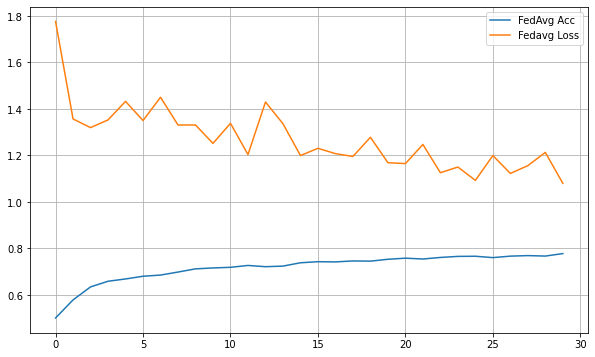

In [12]:
average_acc_list, average_loss_list = [], []

for i in range(1,31):
    tmp_a, tmp_l = 0, 0
    for j in range(num):
        tmp_a = tmp_a + np.mean(globals()['acc{}'.format(j)][i])
        tmp_l = tmp_l + np.mean(globals()['loss{}'.format(j)][i])    
        
    average_acc_list.append(tmp_a/num)
    average_loss_list.append(tmp_l/num)   
    
plt.figure(figsize=(10,6))
plt.plot(average_acc_list, label='FedAvg Acc')
plt.plot(average_loss_list, label='Fedavg Loss')

plt.grid(True)
plt.legend()
plt.show()

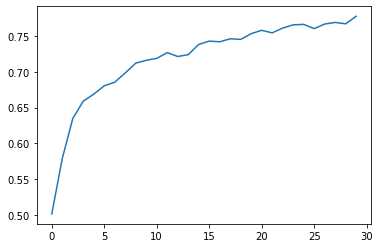

In [13]:
plt.plot(average_acc_list, label='FedAvg Acc')
plt.show()

In [14]:
print(average_acc_list,'\n') 
print(average_loss_list)

[0.5011211069093809, 0.5788466682036718, 0.6348022222518921, 0.6591000017192629, 0.66891444656584, 0.6806455532709758, 0.6856788880295225, 0.6986322217517428, 0.7123566653993395, 0.7163033299975924, 0.7190277775128683, 0.7270522223578558, 0.7216511117087471, 0.7242388910717436, 0.7385522213247087, 0.7431999994648827, 0.7422622250186072, 0.7464477784103818, 0.7455755564901564, 0.7536155561606089, 0.7583311100800832, 0.7547799997859531, 0.7614422208733028, 0.7659722215599484, 0.7666411134931778, 0.760731112294727, 0.7670900020334456, 0.7693877776463828, 0.7674066662788391, 0.77803555727005] 

[1.7764781110816532, 1.357031774520874, 1.3198761151896583, 1.3531081173155044, 1.4327825844287874, 1.3503215511639912, 1.4504863613181644, 1.331176214085685, 1.3312063780095844, 1.251967341370053, 1.3384724762704636, 1.203950952159034, 1.4300550434324475, 1.3366674151685505, 1.1998233060042063, 1.2308469149801466, 1.2080055005020567, 1.195831812090344, 1.2782465477784475, 1.1690039243963029, 1.1651